### E. coli UTI/UR PTR analysis 


#### Sections:

- [Sample Preparation](#Sample-Preparation)

### Sample Preparation

- Rename fastq filenames with samplenames from Demultiplex metadata sheet.
- Clean up unsupported characters from the sample names.
- Plot # of reads sequenced data from Demultiplex metadata sheet.

Exploring Sequencing Demultiplex file... 
Summary of % reads from the sequencing run...
count    9.600000e+01
mean     8.799024e+06
std      2.711577e+06
min      1.457406e+06
25%      7.284285e+06
50%      8.808374e+06
75%      1.074499e+07
max      1.581730e+07
Name: # Reads, dtype: float64


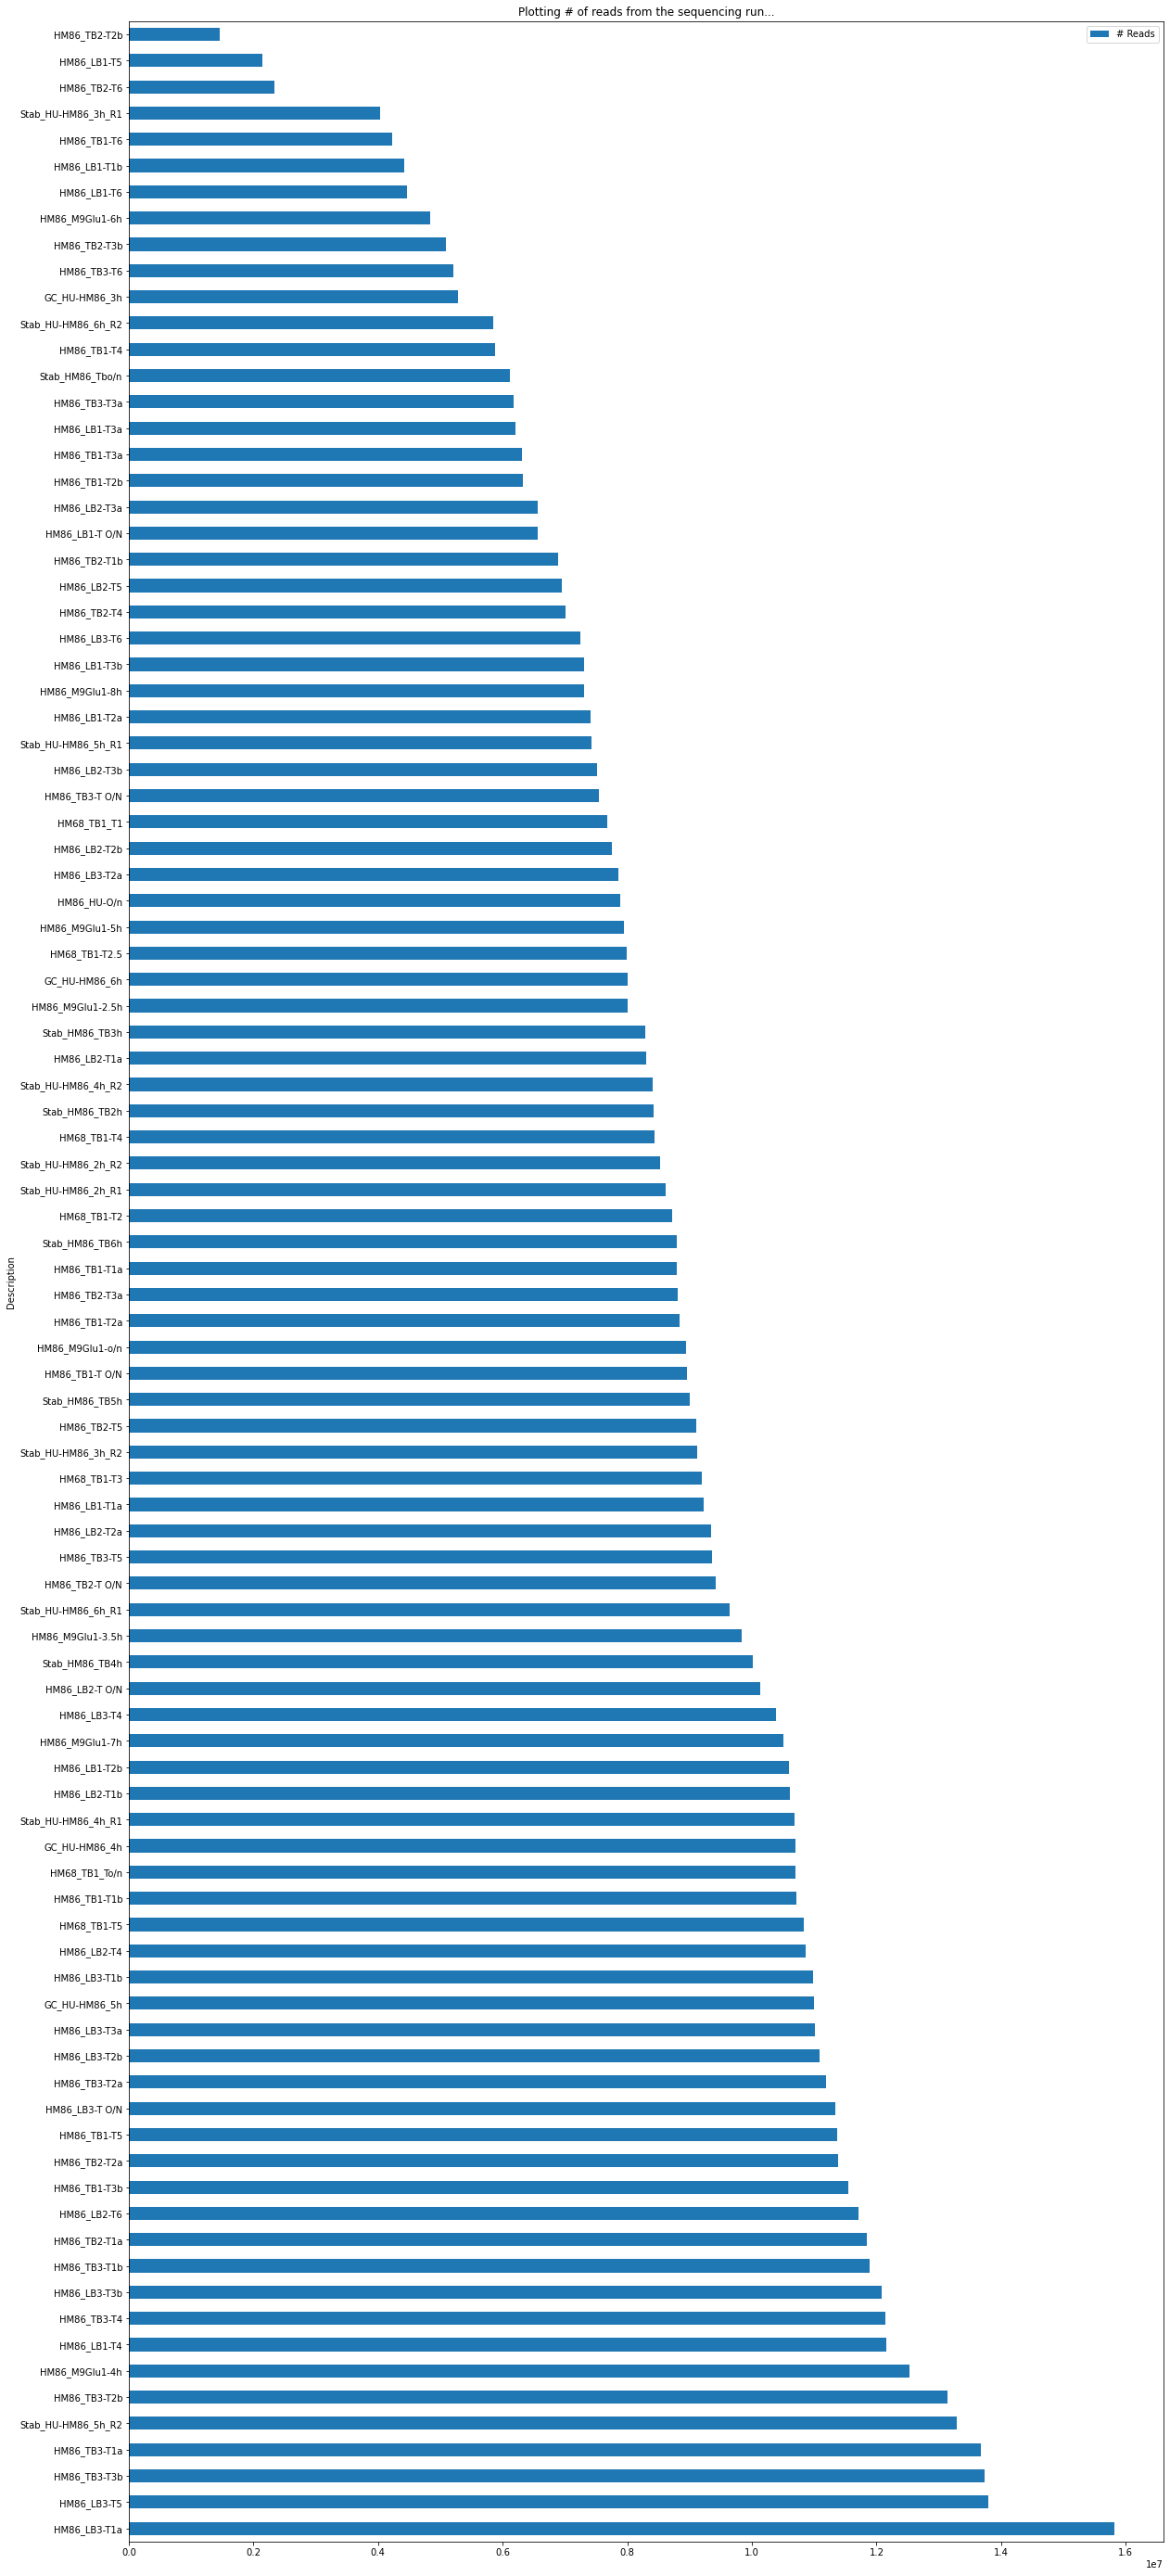

In [1]:
# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)
os.chdir("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Sequence_data/fastq/8399-SP/fastqs_8399-SP")

print ("\033[1m" + "Exploring Sequencing Demultiplex file... "+ "\033[0m")
pd.set_option("display.max_rows", None, "display.max_columns", None)
Ecoli_Demultiplex = pd.read_csv("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Sequence_data/fastq/8399-SP/DemuxStats_8399-SP.csv", sep=',', header=0)

print ("\033[1m" + "Summary of % reads from the sequencing run..."+ "\033[0m")
print(Ecoli_Demultiplex['# Reads'].describe())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 50]
Ecoli_Demultiplex.sort_values(by='# Reads',ascending=False).plot(x='Description', y='# Reads', kind="barh", title="Plotting # of reads from the sequencing run...")

Ecoli_Demultiplex = Ecoli_Demultiplex.replace([' O/N'], '_O-N', regex=True)
Ecoli_Demultiplex = Ecoli_Demultiplex.replace(['o-n'], '_O-N', regex=True)
Ecoli_Demultiplex = Ecoli_Demultiplex.replace(['o/n'], '_O-N', regex=True)
Ecoli_Demultiplex = Ecoli_Demultiplex.replace(['-O/n'], '_O-N', regex=True)

# Rename the samples.
# os.chdir("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Sequence_data/fastq/8399-SP")
# for index, row in Ecoli_Demultiplex.iterrows():
#     print("mv", "%s_S*_R1_001.fastq.gz" % row['Sample_ID'], "%s_R1.fastq.gz" % row['Description'])
#     #os.system("mv %s_S*_R1_001.fastq.gz %s_R1.fastq.gz" % (row['Sample_ID'], row['Description']))
# for index, row in Ecoli_Demultiplex.iterrows():
#     print("mv", "%s_S*R2_001.fastq.gz" % row['Sample_ID'], "%s_R2.fastq.gz" % row['Description'])
#     #os.system("mv %s_S*_R2_001.fastq.gz %s_R2.fastq.gz" % (row['Sample_ID'], row['Description']))

In [2]:
os.chdir("/scratch/esnitkin_root/esnitkin/apirani/Project_UTI_PTR/Analysis/2023-06-21_QC_analysis/")

### Evaluate Raw Sequencing Coverage 

In [3]:
Coverage = pd.read_csv("2023-06-21_QC_analysis_Final_Coverage.txt", sep=',', header=0)
Coverage = Coverage.replace(['_R1.fastq.gz'], '', regex=True)
Coverage['Coverage'].describe()

count     96.000000
mean     532.979441
std      161.430097
min       88.027300
25%      439.971000
50%      532.026000
75%      648.997500
max      955.365000
Name: Coverage, dtype: float64

Exploring Coverage for all samples: 


<AxesSubplot:ylabel='Sample_name'>

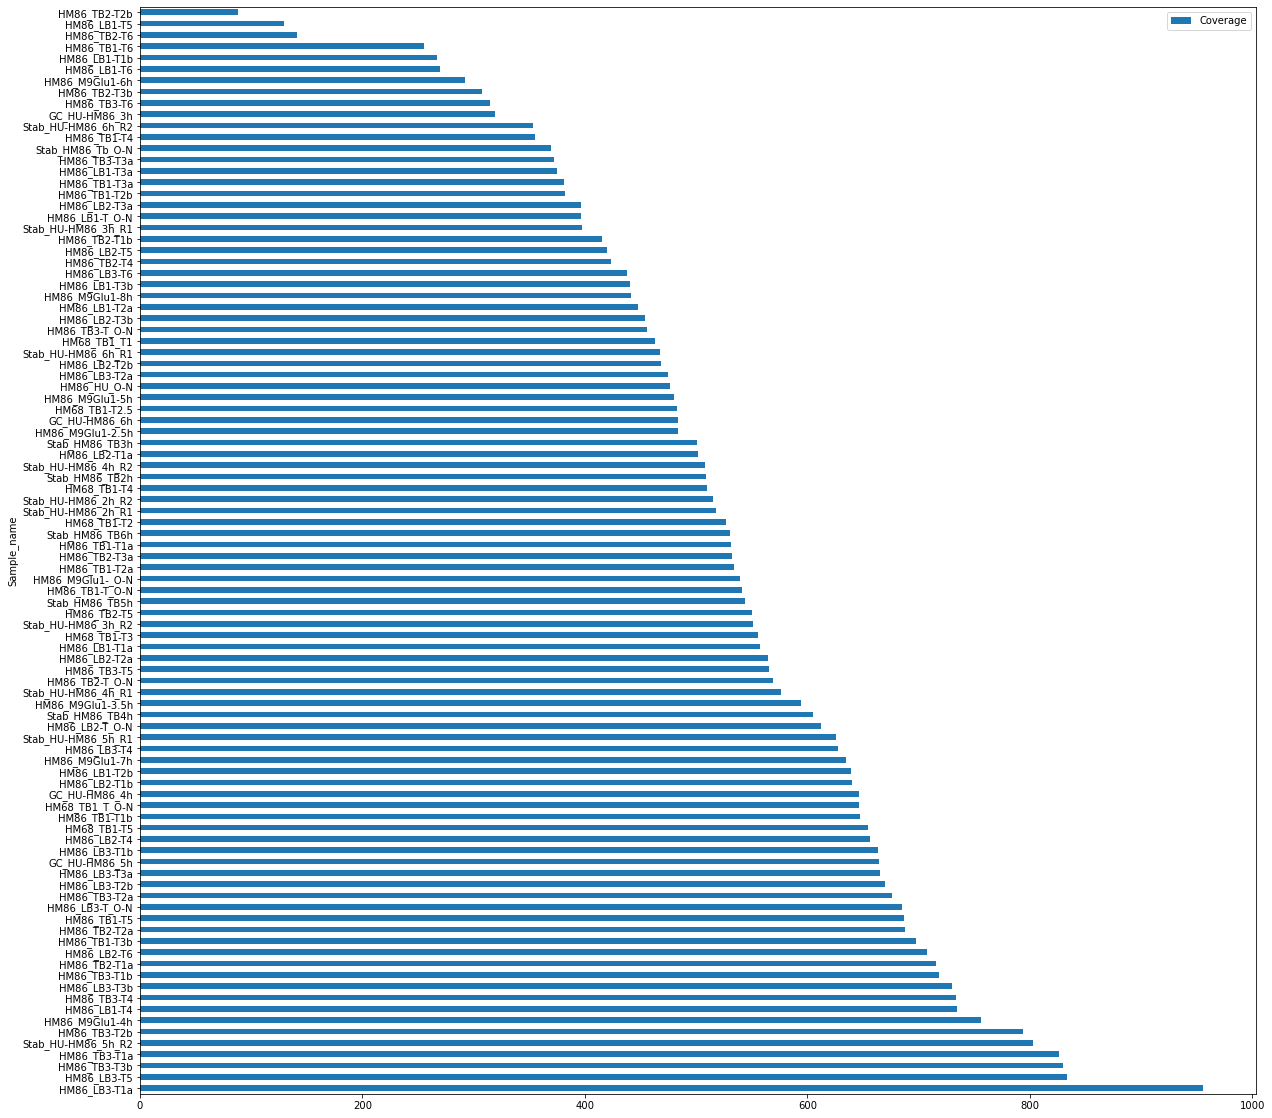

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
print ("\033[1m" + "Exploring Coverage for all samples: "+ "\033[0m")
Coverage.sort_values(by='Coverage',ascending=False).plot(x='Sample_name', y='Coverage', kind="barh")

### Kraken Report

In [5]:
os.chdir("2023-06-21_QC_analysis_Kraken_results/")

In [6]:
kraken = pd.read_csv("Kraken_report_final.csv", sep=',', header=0)
kraken = kraken.replace(['_R1.fastq.gz'], '', regex=True)
kraken.rename(columns = {'Sample':'Sample_name'}, inplace = True)

In [7]:
print ("\033[1m" + "Checking if Kraken returns Escherichiacoli as the major species in all 96 samples.  "+ "\033[0m")
print ("\033[1m" + "Species\tCount" + "\033[0m")
kraken['Species'].value_counts()

Checking if Kraken returns Escherichiacoli as the major species in all 96 samples.  
Species	Count


Escherichiacoli    96
Name: Species, dtype: int64

### FastQC and MultiQC Analysis

PLotting Total sequence vs Percentage of duplicated sequence


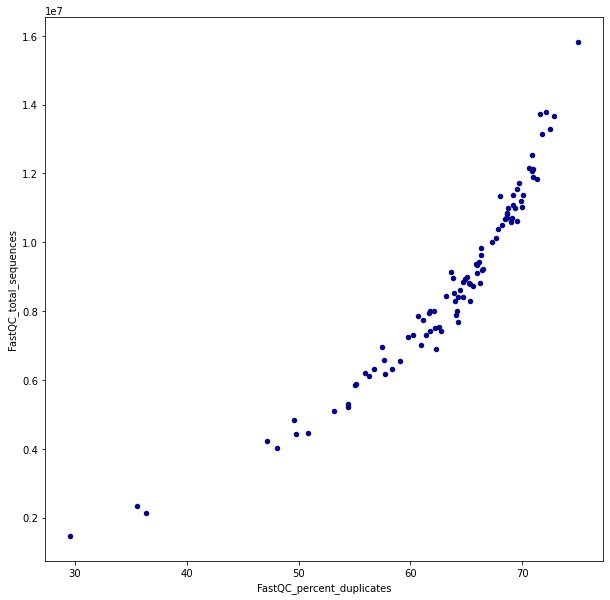

In [8]:
os.chdir("/scratch/esnitkin_root/esnitkin/apirani/Project_UTI_PTR/Analysis/2023-06-21_QC_analysis/")
multiqc_summary = pd.read_csv("2023-06-21_QC_analysis_Multiqc_reports/2023-06-21_QC_analysis_Forward_fastqc_data/multiqc_general_stats.txt", sep='\t', header=0)
multiqc_summary.columns = ['Sample_name', 'FastQC_percent_duplicates', 'FastQC_percent_gc', 'FastQC_avg_sequence_length', 'FastQC_total_sequences', 'FastQC_percent_fails']
#multiqc_summary
multiqc_summary = multiqc_summary[~multiqc_summary['Sample_name'].str.contains("NEG")]
multiqc_summary = multiqc_summary[~multiqc_summary['Sample_name'].str.contains("LVU")]
multiqc_summary = multiqc_summary[~multiqc_summary['Sample_name'].str.contains("NK_SK")]
multiqc_summary = multiqc_summary.replace(['_R1'], '', regex=True)
plt.rcParams['figure.figsize'] = [10, 10]
print ("\033[1m" + "PLotting Total sequence vs Percentage of duplicated sequence" + "\033[0m")
ax1 = multiqc_summary.plot.scatter(x = 'FastQC_percent_duplicates', y = 'FastQC_total_sequences', c = 'DarkBlue')

### PTR Analysis

    Note:

        - Rewrote PTR code and transformed into a snakemake workflow.

        - The snakemake workflow can be found at https://github.com/alipirani88/Growth-rate-estimate_SMAKE

        - PTR results can be found at: /nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/results/2023-06-23_Growth_Rate_Analysis/
        
        - PTR report for the 96 samples - Growth-rate-estimate_SMAKE_PTR_data.csv
        
        - Completed working on code changes to calculate PTR from just the Ori/Ter sites. qPCR PTR was calculated using the mean coverage over these loci. These PTR values seem a bit off compared to the genomic PTR.

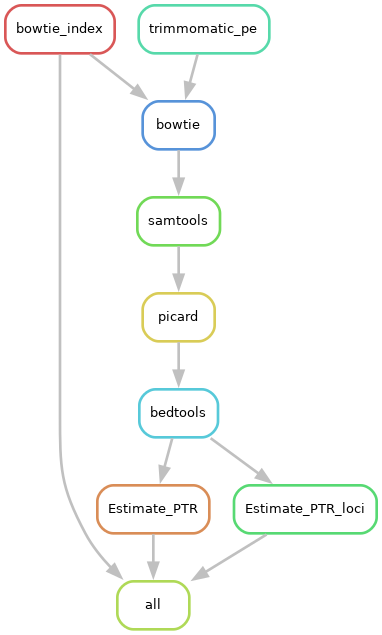

In [9]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/dag.png')
img

In [10]:

# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)
os.chdir("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/results/2023-06-23_Growth_Rate_Analysis/ptr/")

In [11]:
PTR_results = pd.read_csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/Growth-rate-estimate_SMAKE_PTR_data.csv')

##### Human Urine Growth Curve

Growth Curve for HM86 Human Urine samples (GC_HU_HM86*) at different time points.


Text(0.5, 1.0, 'HM86 Human Urine samples')

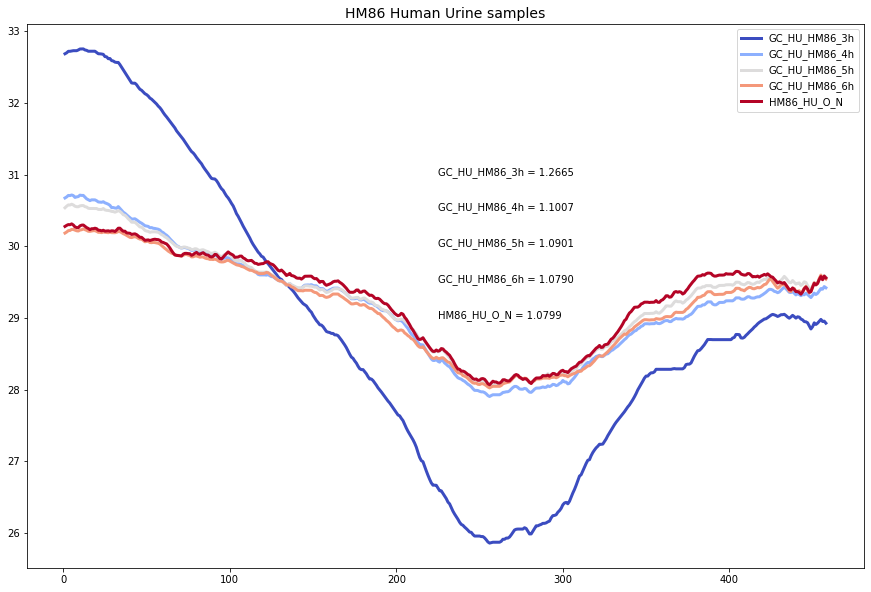

In [12]:
GC_HU_HM86_3h = pd.read_csv('GC_HU/GC_HU-HM86_3h/GC_HU-HM86_3h.bed_perc_bins.csv', names=['bin', 'GC_HU_HM86_3h'], header=None)
GC_HU_HM86_4h = pd.read_csv('GC_HU/GC_HU-HM86_4h/GC_HU-HM86_4h.bed_perc_bins.csv', names=['bin', 'GC_HU_HM86_4h'], header=None)
GC_HU_HM86_5h = pd.read_csv('GC_HU/GC_HU-HM86_5h/GC_HU-HM86_5h.bed_perc_bins.csv', names=['bin', 'GC_HU_HM86_5h'], header=None)
GC_HU_HM86_6h = pd.read_csv('GC_HU/GC_HU-HM86_6h/GC_HU-HM86_6h.bed_perc_bins.csv', names=['bin', 'GC_HU_HM86_6h'], header=None)
HM86_HU_O_N = pd.read_csv('HU/HM86_HU_O-N/HM86_HU_O-N.bed_perc_bins.csv', names=['bin', 'HM86_HU_O_N'], header=None)

#!grep 'median_sliding_window_array' GC_HU/GC_HU-HM86_*/*_PTR.txt HU/HM86_HU_O-N/HM86_HU_O-N_bins_PTR.txt

GC_HU_HM86_temp1 = pd.merge(GC_HU_HM86_3h, GC_HU_HM86_4h, on=["bin", "bin"])
GC_HU_HM86_temp2 = pd.merge(GC_HU_HM86_temp1, GC_HU_HM86_5h, on=["bin", "bin"])
GC_HU_HM86_temp3 = pd.merge(GC_HU_HM86_temp2, GC_HU_HM86_6h, on=["bin", "bin"])
GC_HU_HM86 = pd.merge(GC_HU_HM86_temp3, HM86_HU_O_N, on=["bin", "bin"])

GC_HU_HM86 = GC_HU_HM86.iloc[1:]

GC_HU_HM86['GC_HU_HM86_3h']=GC_HU_HM86['GC_HU_HM86_3h'].astype(float)
GC_HU_HM86['GC_HU_HM86_4h']=GC_HU_HM86['GC_HU_HM86_4h'].astype(float)
GC_HU_HM86['GC_HU_HM86_5h']=GC_HU_HM86['GC_HU_HM86_5h'].astype(float)
GC_HU_HM86['GC_HU_HM86_6h']=GC_HU_HM86['GC_HU_HM86_6h'].astype(float)
GC_HU_HM86['HM86_HU_O_N']=GC_HU_HM86['HM86_HU_O_N'].astype(float)


fig, ax = plt.subplots(1, 1)
GC_HU_HM86.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(225, 31, 'GC_HU_HM86_3h = 1.2665', fontsize = 10)
ax.text(225, 30.5, 'GC_HU_HM86_4h = 1.1007', fontsize = 10)
ax.text(225, 30, 'GC_HU_HM86_5h = 1.0901', fontsize = 10)
ax.text(225, 29.5, 'GC_HU_HM86_6h = 1.0790', fontsize = 10)
ax.text(225, 29, 'HM86_HU_O_N = 1.0799', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM86 Human Urine samples (GC_HU_HM86*) at different time points." + "\033[0m")
ax.set_title('HM86 Human Urine samples', 
             fontsize = 14)

##### Terrific Broth

Growth Curve for HM68 Terrific Broth - Replicate 1 samples at different time points.


Text(0.5, 1.0, 'HM68 Terrific Broth Replicate 1 samples')

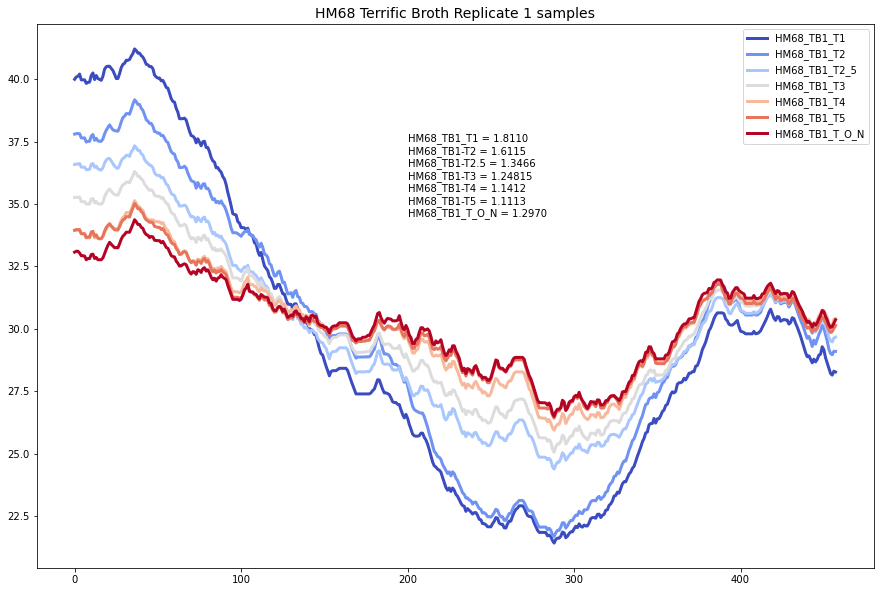

In [13]:
HM68_TB1_T1 = pd.read_csv('TB1/HM68_TB1_T1/HM68_TB1_T1.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T1'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T2 = pd.read_csv('TB1/HM68_TB1-T2/HM68_TB1-T2.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T2'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T2_5 = pd.read_csv('TB1/HM68_TB1-T2.5/HM68_TB1-T2.5.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T2_5'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T3 = pd.read_csv('TB1/HM68_TB1-T3/HM68_TB1-T3.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T3'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T4 = pd.read_csv('TB1/HM68_TB1-T4/HM68_TB1-T4.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T4'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T5 = pd.read_csv('TB1/HM68_TB1-T5/HM68_TB1-T5.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T5'], header=None, dtype=float, skiprows=[0])
HM68_TB1_T_O_N = pd.read_csv('TB1/HM68_TB1_T_O-N/HM68_TB1_T_O-N.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T_O_N'], header=None, dtype=float, skiprows=[0])

#!grep 'median_sliding_window_array' TB1/*/*bins_PTR.txt

HM68_TB1_temp1 = pd.merge(HM68_TB1_T1, HM68_TB1_T2, on=["bin", "bin"])
HM68_TB1_temp2 = pd.merge(HM68_TB1_temp1, HM68_TB1_T2_5, on=["bin", "bin"])
HM68_TB1_temp3 = pd.merge(HM68_TB1_temp2, HM68_TB1_T3, on=["bin", "bin"])
HM68_TB1_temp4 = pd.merge(HM68_TB1_temp3, HM68_TB1_T4, on=["bin", "bin"])
HM68_TB1_temp5 = pd.merge(HM68_TB1_temp4, HM68_TB1_T5, on=["bin", "bin"])
HM68_TB1 = pd.merge(HM68_TB1_temp5, HM68_TB1_T_O_N, on=["bin", "bin"])


HM68_TB1['HM68_TB1_T1']=HM68_TB1['HM68_TB1_T1'].astype(float)
HM68_TB1['HM68_TB1_T2']=HM68_TB1['HM68_TB1_T2'].astype(float)
HM68_TB1['HM68_TB1_T2_5']=HM68_TB1['HM68_TB1_T2_5'].astype(float)
HM68_TB1['HM68_TB1_T3']=HM68_TB1['HM68_TB1_T3'].astype(float)
HM68_TB1['HM68_TB1_T4']=HM68_TB1['HM68_TB1_T4'].astype(float)
HM68_TB1['HM68_TB1_T5']=HM68_TB1['HM68_TB1_T5'].astype(float)
HM68_TB1['HM68_TB1_T_O_N']=HM68_TB1['HM68_TB1_T_O_N'].astype(float)


HM68_TB1 = HM68_TB1.drop(['bin'], axis=1)

fig, ax = plt.subplots(1, 1)
HM68_TB1.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 37.5, 'HM68_TB1_T1 = 1.8110', fontsize = 10)
ax.text(200, 36.5, 'HM68_TB1-T2.5 = 1.3466', fontsize = 10)
ax.text(200, 37, 'HM68_TB1-T2 = 1.6115', fontsize = 10)
ax.text(200, 36, 'HM68_TB1-T3 = 1.24815', fontsize = 10)
ax.text(200, 35.5, 'HM68_TB1-T4 = 1.1412', fontsize = 10)
ax.text(200, 35, 'HM68_TB1-T5 = 1.1113', fontsize = 10)
ax.text(200, 34.5, 'HM68_TB1_T_O_N = 1.2970', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM68 Terrific Broth - Replicate 1 samples at different time points." + "\033[0m")
ax.set_title('HM68 Terrific Broth Replicate 1 samples', 
             fontsize = 14)

Growth Curve for HM86 Terrific Broth - Replicate 1 samples at different time points.


Text(0.5, 1.0, 'HM86 Terrific Broth Replicate 1 samples')

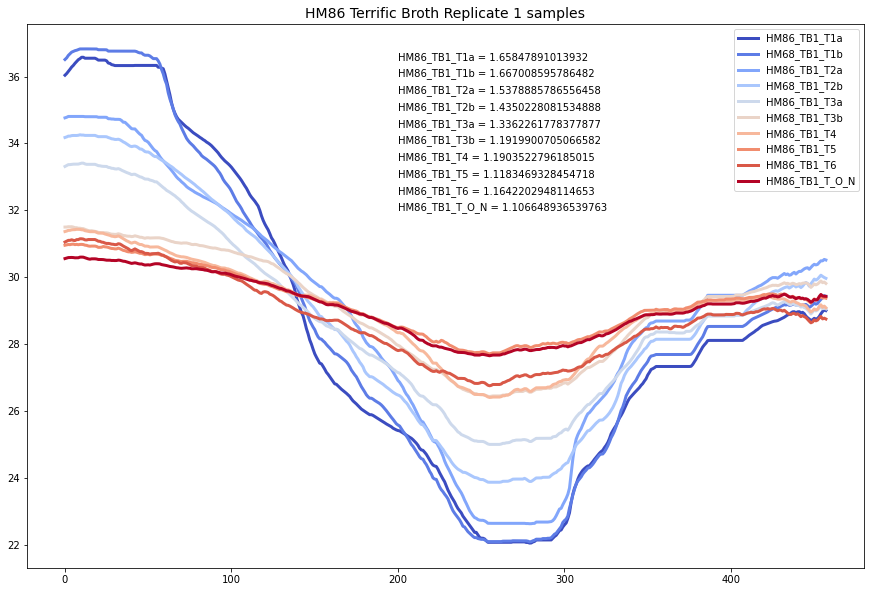

In [14]:
HM86_TB1_T1a = pd.read_csv('TB1/HM86_TB1-T1a/HM86_TB1-T1a.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T1a'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T1b = pd.read_csv('TB1/HM86_TB1-T1b/HM86_TB1-T1b.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T1b'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T1 = pd.merge(HM86_TB1_T1a, HM86_TB1_T1b, on=["bin", "bin"])
HM86_TB1_T1_mean = HM86_TB1_T1[['HM86_TB1_T1a', 'HM68_TB1_T1b']].mean(axis=1)

HM86_TB1_T2a = pd.read_csv('TB1/HM86_TB1-T2a/HM86_TB1-T2a.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T2a'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T2b = pd.read_csv('TB1/HM86_TB1-T2b/HM86_TB1-T2b.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T2b'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T2 = pd.merge(HM86_TB1_T2a, HM86_TB1_T2b, on=["bin", "bin"])
HM86_TB1_T2_mean = HM86_TB1_T2[['HM86_TB1_T2a', 'HM68_TB1_T2b']].mean(axis=1)

HM86_TB1_T3a = pd.read_csv('TB1/HM86_TB1-T3a/HM86_TB1-T3a.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T3a'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T3b = pd.read_csv('TB1/HM86_TB1-T3b/HM86_TB1-T3b.bed_perc_bins.csv', names=['bin', 'HM68_TB1_T3b'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T3 = pd.merge(HM86_TB1_T3a, HM86_TB1_T3b, on=["bin", "bin"])
HM86_TB1_T3_mean = HM86_TB1_T3[['HM86_TB1_T3a', 'HM68_TB1_T3b']].mean(axis=1)

HM86_TB1_T4 = pd.read_csv('TB1/HM86_TB1-T4/HM86_TB1-T4.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T4'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T5 = pd.read_csv('TB1/HM86_TB1-T5/HM86_TB1-T5.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T5'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T6 = pd.read_csv('TB1/HM86_TB1-T6/HM86_TB1-T6.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T6'], header=None, dtype=float, skiprows=[0])
HM86_TB1_T_O_N = pd.read_csv('TB1/HM86_TB1-T_O-N/HM86_TB1-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_TB1_T_O_N'], header=None, dtype=float, skiprows=[0])

HM86_TB1_temp1 = pd.merge(HM86_TB1_T1a, HM86_TB1_T1b, on=["bin", "bin"])
HM86_TB1_temp2 = pd.merge(HM86_TB1_temp1, HM86_TB1_T2a, on=["bin", "bin"])
HM86_TB1_temp3 = pd.merge(HM86_TB1_temp2, HM86_TB1_T2b, on=["bin", "bin"])
HM86_TB1_temp4 = pd.merge(HM86_TB1_temp3, HM86_TB1_T3a, on=["bin", "bin"])
HM86_TB1_temp5 = pd.merge(HM86_TB1_temp4, HM86_TB1_T3b, on=["bin", "bin"])
HM86_TB1_temp6 = pd.merge(HM86_TB1_temp5, HM86_TB1_T4, on=["bin", "bin"])
HM86_TB1_temp7 = pd.merge(HM86_TB1_temp6, HM86_TB1_T5, on=["bin", "bin"])
HM86_TB1_temp8 = pd.merge(HM86_TB1_temp7, HM86_TB1_T6, on=["bin", "bin"])
HM86_TB1 = pd.merge(HM86_TB1_temp8, HM86_TB1_T_O_N, on=["bin", "bin"])
HM86_TB1 = HM86_TB1.drop(['bin'], axis=1)

#!grep 'median_sliding_window_array' TB1/HM86*/*bins_PTR.txt

fig, ax = plt.subplots(1, 1)
HM86_TB1.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 36.5, 'HM86_TB1_T1a = 1.65847891013932', fontsize = 10)
ax.text(200, 36, 'HM86_TB1_T1b = 1.667008595786482', fontsize = 10)
ax.text(200, 35.5, 'HM86_TB1_T2a = 1.5378885786556458', fontsize = 10)
ax.text(200, 35, 'HM86_TB1_T2b = 1.4350228081534888', fontsize = 10)
ax.text(200, 34.5, 'HM86_TB1_T3a = 1.3362261778377877', fontsize = 10)
ax.text(200, 34, 'HM86_TB1_T3b = 1.1919900705066582', fontsize = 10)
ax.text(200, 33.5, 'HM86_TB1_T4 = 1.1903522796185015', fontsize = 10)
ax.text(200, 33, 'HM86_TB1_T5 = 1.1183469328454718', fontsize = 10)
ax.text(200, 32.5, 'HM86_TB1_T6 = 1.1642202948114653', fontsize = 10)
ax.text(200, 32, 'HM86_TB1_T_O_N = 1.106648936539763', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM86 Terrific Broth - Replicate 1 samples at different time points." + "\033[0m")
ax.set_title('HM86 Terrific Broth Replicate 1 samples', 
             fontsize = 14)

Growth Curve for HM86 Terrific Broth - Replicate 2 samples at different time points.


Text(0.5, 1.0, 'HM86 Terrific Broth Replicate 2 samples')

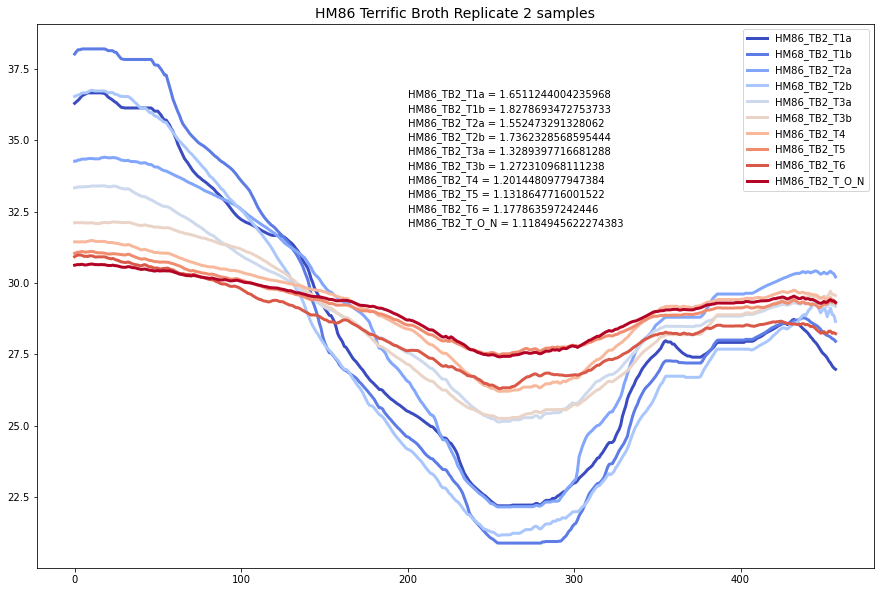

In [15]:
HM86_TB2_T1a = pd.read_csv('TB2/HM86_TB2-T1a/HM86_TB2-T1a.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T1a'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T1b = pd.read_csv('TB2/HM86_TB2-T1b/HM86_TB2-T1b.bed_perc_bins.csv', names=['bin', 'HM68_TB2_T1b'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T1 = pd.merge(HM86_TB2_T1a, HM86_TB2_T1b, on=["bin", "bin"])
HM86_TB2_T1_mean = HM86_TB2_T1[['HM86_TB2_T1a', 'HM68_TB2_T1b']].mean(axis=1)

HM86_TB2_T2a = pd.read_csv('TB2/HM86_TB2-T2a/HM86_TB2-T2a.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T2a'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T2b = pd.read_csv('TB2/HM86_TB2-T2b/HM86_TB2-T2b.bed_perc_bins.csv', names=['bin', 'HM68_TB2_T2b'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T2 = pd.merge(HM86_TB2_T2a, HM86_TB2_T2b, on=["bin", "bin"])
HM86_TB2_T2_mean = HM86_TB2_T2[['HM86_TB2_T2a', 'HM68_TB2_T2b']].mean(axis=1)

HM86_TB2_T3a = pd.read_csv('TB2/HM86_TB2-T3a/HM86_TB2-T3a.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T3a'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T3b = pd.read_csv('TB2/HM86_TB2-T3b/HM86_TB2-T3b.bed_perc_bins.csv', names=['bin', 'HM68_TB2_T3b'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T3 = pd.merge(HM86_TB2_T3a, HM86_TB2_T3b, on=["bin", "bin"])
HM86_TB2_T3_mean = HM86_TB2_T3[['HM86_TB2_T3a', 'HM68_TB2_T3b']].mean(axis=1)

HM86_TB2_T4 = pd.read_csv('TB2/HM86_TB2-T4/HM86_TB2-T4.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T4'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T5 = pd.read_csv('TB2/HM86_TB2-T5/HM86_TB2-T5.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T5'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T6 = pd.read_csv('TB2/HM86_TB2-T6/HM86_TB2-T6.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T6'], header=None, dtype=float, skiprows=[0])
HM86_TB2_T_O_N = pd.read_csv('TB2/HM86_TB2-T_O-N/HM86_TB2-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_TB2_T_O_N'], header=None, dtype=float, skiprows=[0])

HM86_TB2_temp1 = pd.merge(HM86_TB2_T1a, HM86_TB2_T1b, on=["bin", "bin"])
HM86_TB2_temp2 = pd.merge(HM86_TB2_temp1, HM86_TB2_T2a, on=["bin", "bin"])
HM86_TB2_temp3 = pd.merge(HM86_TB2_temp2, HM86_TB2_T2b, on=["bin", "bin"])
HM86_TB2_temp4 = pd.merge(HM86_TB2_temp3, HM86_TB2_T3a, on=["bin", "bin"])
HM86_TB2_temp5 = pd.merge(HM86_TB2_temp4, HM86_TB2_T3b, on=["bin", "bin"])
HM86_TB2_temp6 = pd.merge(HM86_TB2_temp5, HM86_TB2_T4, on=["bin", "bin"])
HM86_TB2_temp7 = pd.merge(HM86_TB2_temp6, HM86_TB2_T5, on=["bin", "bin"])
HM86_TB2_temp8 = pd.merge(HM86_TB2_temp7, HM86_TB2_T6, on=["bin", "bin"])
HM86_TB2 = pd.merge(HM86_TB2_temp8, HM86_TB2_T_O_N, on=["bin", "bin"])
HM86_TB2 = HM86_TB2.drop(['bin'], axis=1)

#!grep 'median_sliding_window_array' TB2/HM86*/*bins_PTR.txt

fig, ax = plt.subplots(1, 1)
HM86_TB2.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 36.5, 'HM86_TB2_T1a = 1.6511244004235968', fontsize = 10)
ax.text(200, 36, 'HM86_TB2_T1b = 1.8278693472753733', fontsize = 10)
ax.text(200, 35.5, 'HM86_TB2_T2a = 1.552473291328062', fontsize = 10)
ax.text(200, 35, 'HM86_TB2_T2b = 1.7362328568595444', fontsize = 10)
ax.text(200, 34.5, 'HM86_TB2_T3a = 1.3289397716681288', fontsize = 10)
ax.text(200, 34, 'HM86_TB2_T3b = 1.272310968111238', fontsize = 10)
ax.text(200, 33.5, 'HM86_TB2_T4 = 1.2014480977947384', fontsize = 10)
ax.text(200, 33, 'HM86_TB2_T5 = 1.1318647716001522', fontsize = 10)
ax.text(200, 32.5, 'HM86_TB2_T6 = 1.177863597242446', fontsize = 10)
ax.text(200, 32, 'HM86_TB2_T_O_N = 1.1184945622274383', fontsize = 10)

print ("\033[1m" + "Growth Curve for HM86 Terrific Broth - Replicate 2 samples at different time points." + "\033[0m")
ax.set_title('HM86 Terrific Broth Replicate 2 samples', 
             fontsize = 14)

Growth Curve for HM86 Terrific Broth - Replicate 3 samples at different time points.


Text(0.5, 1.0, 'HM86 Terrific Broth Replicate 3 samples')

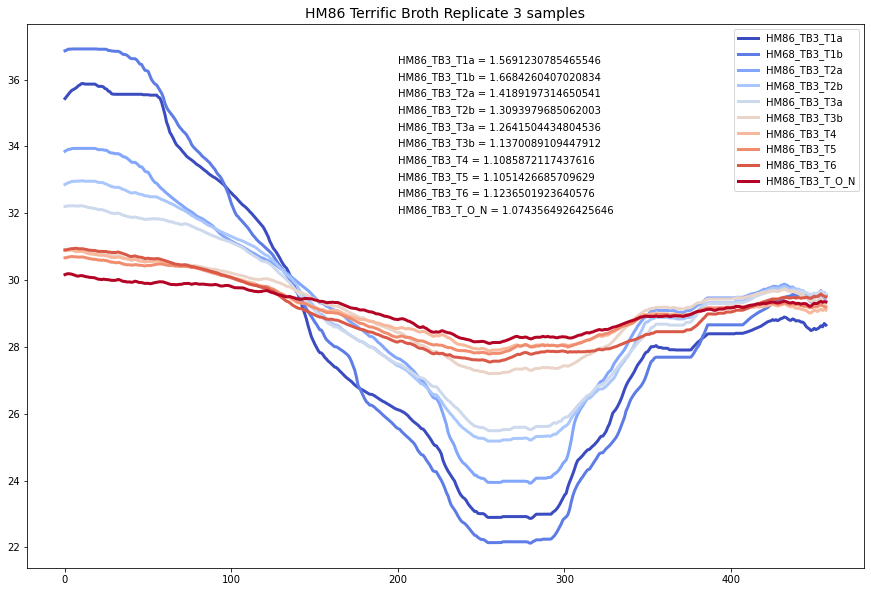

In [16]:
HM86_TB3_T1a = pd.read_csv('TB3/HM86_TB3-T1a/HM86_TB3-T1a.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T1a'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T1b = pd.read_csv('TB3/HM86_TB3-T1b/HM86_TB3-T1b.bed_perc_bins.csv', names=['bin', 'HM68_TB3_T1b'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T1 = pd.merge(HM86_TB3_T1a, HM86_TB3_T1b, on=["bin", "bin"])
HM86_TB3_T1_mean = HM86_TB3_T1[['HM86_TB3_T1a', 'HM68_TB3_T1b']].mean(axis=1)

HM86_TB3_T2a = pd.read_csv('TB3/HM86_TB3-T2a/HM86_TB3-T2a.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T2a'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T2b = pd.read_csv('TB3/HM86_TB3-T2b/HM86_TB3-T2b.bed_perc_bins.csv', names=['bin', 'HM68_TB3_T2b'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T2 = pd.merge(HM86_TB3_T2a, HM86_TB3_T2b, on=["bin", "bin"])
HM86_TB3_T2_mean = HM86_TB3_T2[['HM86_TB3_T2a', 'HM68_TB3_T2b']].mean(axis=1)

HM86_TB3_T3a = pd.read_csv('TB3/HM86_TB3-T3a/HM86_TB3-T3a.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T3a'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T3b = pd.read_csv('TB3/HM86_TB3-T3b/HM86_TB3-T3b.bed_perc_bins.csv', names=['bin', 'HM68_TB3_T3b'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T3 = pd.merge(HM86_TB3_T3a, HM86_TB3_T3b, on=["bin", "bin"])
HM86_TB3_T3_mean = HM86_TB3_T3[['HM86_TB3_T3a', 'HM68_TB3_T3b']].mean(axis=1)

HM86_TB3_T4 = pd.read_csv('TB3/HM86_TB3-T4/HM86_TB3-T4.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T4'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T5 = pd.read_csv('TB3/HM86_TB3-T5/HM86_TB3-T5.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T5'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T6 = pd.read_csv('TB3/HM86_TB3-T6/HM86_TB3-T6.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T6'], header=None, dtype=float, skiprows=[0])
HM86_TB3_T_O_N = pd.read_csv('TB3/HM86_TB3-T_O-N/HM86_TB3-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_TB3_T_O_N'], header=None, dtype=float, skiprows=[0])

HM86_TB3_temp1 = pd.merge(HM86_TB3_T1a, HM86_TB3_T1b, on=["bin", "bin"])
HM86_TB3_temp2 = pd.merge(HM86_TB3_temp1, HM86_TB3_T2a, on=["bin", "bin"])
HM86_TB3_temp3 = pd.merge(HM86_TB3_temp2, HM86_TB3_T2b, on=["bin", "bin"])
HM86_TB3_temp4 = pd.merge(HM86_TB3_temp3, HM86_TB3_T3a, on=["bin", "bin"])
HM86_TB3_temp5 = pd.merge(HM86_TB3_temp4, HM86_TB3_T3b, on=["bin", "bin"])
HM86_TB3_temp6 = pd.merge(HM86_TB3_temp5, HM86_TB3_T4, on=["bin", "bin"])
HM86_TB3_temp7 = pd.merge(HM86_TB3_temp6, HM86_TB3_T5, on=["bin", "bin"])
HM86_TB3_temp8 = pd.merge(HM86_TB3_temp7, HM86_TB3_T6, on=["bin", "bin"])
HM86_TB3 = pd.merge(HM86_TB3_temp8, HM86_TB3_T_O_N, on=["bin", "bin"])
HM86_TB3 = HM86_TB3.drop(['bin'], axis=1)

#!grep 'median_sliding_window_array' TB3/HM86*/*bins_PTR.txt

fig, ax = plt.subplots(1, 1)
HM86_TB3.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 36.5, 'HM86_TB3_T1a = 1.5691230785465546', fontsize = 10)
ax.text(200, 36, 'HM86_TB3_T1b = 1.6684260407020834', fontsize = 10)
ax.text(200, 35.5, 'HM86_TB3_T2a = 1.4189197314650541', fontsize = 10)
ax.text(200, 35, 'HM86_TB3_T2b = 1.3093979685062003', fontsize = 10)
ax.text(200, 34.5, 'HM86_TB3_T3a = 1.2641504434804536', fontsize = 10)
ax.text(200, 34, 'HM86_TB3_T3b = 1.1370089109447912', fontsize = 10)
ax.text(200, 33.5, 'HM86_TB3_T4 = 1.1085872117437616', fontsize = 10)
ax.text(200, 33, 'HM86_TB3_T5 = 1.1051426685709629', fontsize = 10)
ax.text(200, 32.5, 'HM86_TB3_T6 = 1.1236501923640576', fontsize = 10)
ax.text(200, 32, 'HM86_TB3_T_O_N = 1.0743564926425646', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM86 Terrific Broth - Replicate 3 samples at different time points." + "\033[0m")
ax.set_title('HM86 Terrific Broth Replicate 3 samples', 
             fontsize = 14)

##### LB Broth - First

Growth Curve for HM86 Lysogeny broth - Replicate 1 samples at different time points.


Text(0.5, 1.0, 'HM86 Lysogeny broth Replicate 1 samples')

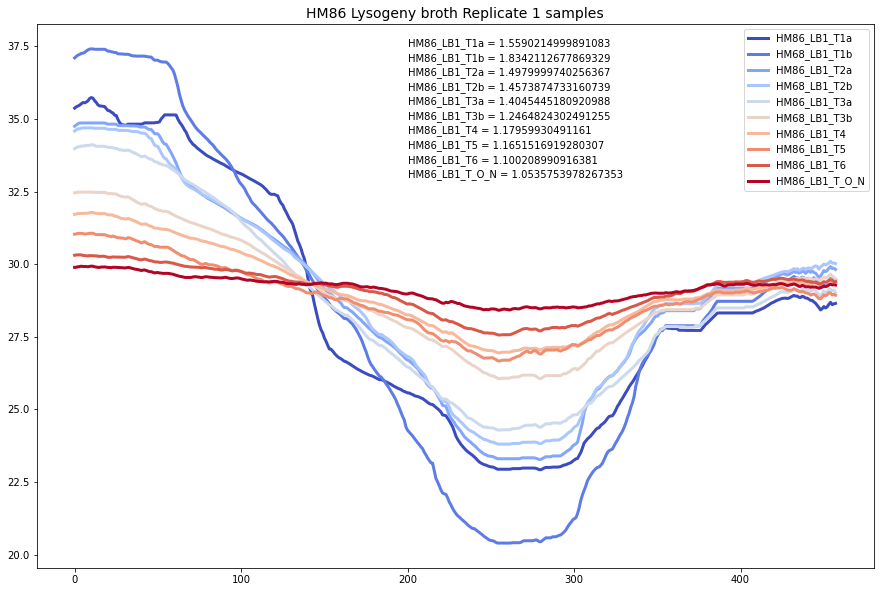

In [17]:
HM86_LB1_T1a = pd.read_csv('LB1/HM86_LB1-T1a/HM86_LB1-T1a.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T1a'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T1b = pd.read_csv('LB1/HM86_LB1-T1b/HM86_LB1-T1b.bed_perc_bins.csv', names=['bin', 'HM68_LB1_T1b'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T1 = pd.merge(HM86_LB1_T1a, HM86_LB1_T1b, on=["bin", "bin"])
HM86_LB1_T1_mean = HM86_LB1_T1[['HM86_LB1_T1a', 'HM68_LB1_T1b']].mean(axis=1)

HM86_LB1_T2a = pd.read_csv('LB1/HM86_LB1-T2a/HM86_LB1-T2a.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T2a'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T2b = pd.read_csv('LB1/HM86_LB1-T2b/HM86_LB1-T2b.bed_perc_bins.csv', names=['bin', 'HM68_LB1_T2b'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T2 = pd.merge(HM86_LB1_T2a, HM86_LB1_T2b, on=["bin", "bin"])
HM86_LB1_T2_mean = HM86_LB1_T2[['HM86_LB1_T2a', 'HM68_LB1_T2b']].mean(axis=1)

HM86_LB1_T3a = pd.read_csv('LB1/HM86_LB1-T3a/HM86_LB1-T3a.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T3a'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T3b = pd.read_csv('LB1/HM86_LB1-T3b/HM86_LB1-T3b.bed_perc_bins.csv', names=['bin', 'HM68_LB1_T3b'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T3 = pd.merge(HM86_LB1_T3a, HM86_LB1_T3b, on=["bin", "bin"])
HM86_LB1_T3_mean = HM86_LB1_T3[['HM86_LB1_T3a', 'HM68_LB1_T3b']].mean(axis=1)

HM86_LB1_T4 = pd.read_csv('LB1/HM86_LB1-T4/HM86_LB1-T4.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T4'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T5 = pd.read_csv('LB1/HM86_LB1-T5/HM86_LB1-T5.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T5'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T6 = pd.read_csv('LB1/HM86_LB1-T6/HM86_LB1-T6.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T6'], header=None, dtype=float, skiprows=[0])
HM86_LB1_T_O_N = pd.read_csv('LB1/HM86_LB1-T_O-N/HM86_LB1-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_LB1_T_O_N'], header=None, dtype=float, skiprows=[0])

#!grep 'median_sliding_window_array' LB1/*/*bins_PTR.txt

HM86_LB1_temp1 = pd.merge(HM86_LB1_T1a, HM86_LB1_T1b, on=["bin", "bin"])
HM86_LB1_temp2 = pd.merge(HM86_LB1_temp1, HM86_LB1_T2a, on=["bin", "bin"])
HM86_LB1_temp3 = pd.merge(HM86_LB1_temp2, HM86_LB1_T2b, on=["bin", "bin"])
HM86_LB1_temp4 = pd.merge(HM86_LB1_temp3, HM86_LB1_T3a, on=["bin", "bin"])
HM86_LB1_temp5 = pd.merge(HM86_LB1_temp4, HM86_LB1_T3b, on=["bin", "bin"])
HM86_LB1_temp6 = pd.merge(HM86_LB1_temp5, HM86_LB1_T4, on=["bin", "bin"])
HM86_LB1_temp7 = pd.merge(HM86_LB1_temp6, HM86_LB1_T5, on=["bin", "bin"])
HM86_LB1_temp8 = pd.merge(HM86_LB1_temp7, HM86_LB1_T6, on=["bin", "bin"])
HM86_LB1 = pd.merge(HM86_LB1_temp8, HM86_LB1_T_O_N, on=["bin", "bin"])
HM86_LB1 = HM86_LB1.drop(['bin'], axis=1)

fig, ax = plt.subplots(1, 1)
HM86_LB1.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 37.5, 'HM86_LB1_T1a = 1.5590214999891083', fontsize = 10)
ax.text(200, 37, 'HM86_LB1_T1b = 1.8342112677869329', fontsize = 10)
ax.text(200, 36.5, 'HM86_LB1_T2a = 1.4979999740256367', fontsize = 10)
ax.text(200, 36, 'HM86_LB1_T2b = 1.4573874733160739', fontsize = 10)
ax.text(200, 35.5, 'HM86_LB1_T3a = 1.4045445180920988', fontsize = 10)
ax.text(200, 35, 'HM86_LB1_T3b = 1.2464824302491255', fontsize = 10)
ax.text(200, 34.5, 'HM86_LB1_T4 = 1.17959930491161', fontsize = 10)
ax.text(200, 34, 'HM86_LB1_T5 = 1.1651516919280307', fontsize = 10)
ax.text(200, 33.5, 'HM86_LB1_T6 = 1.100208990916381', fontsize = 10)
ax.text(200, 33, 'HM86_LB1_T_O_N = 1.0535753978267353', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM86 Lysogeny broth - Replicate 1 samples at different time points." + "\033[0m")
ax.set_title('HM86 Lysogeny broth Replicate 1 samples', 
             fontsize = 14)

##### LB Broth - Second

Growth Curve for HM86 Lysogeny broth - Replicate 2 samples at different time points.


Text(0.5, 1.0, 'HM86 Lysogeny broth Replicate 2 samples')

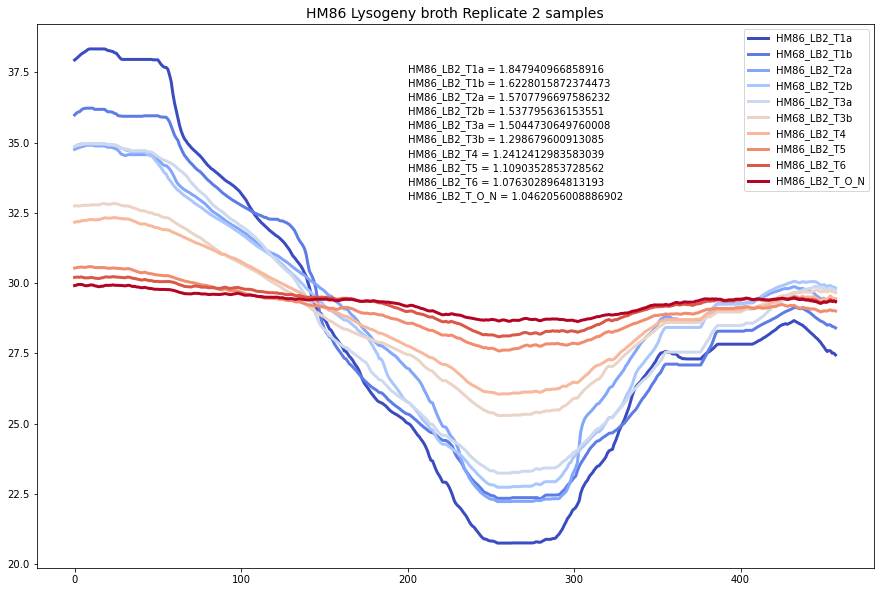

In [18]:
HM86_LB2_T1a = pd.read_csv('LB2/HM86_LB2-T1a/HM86_LB2-T1a.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T1a'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T1b = pd.read_csv('LB2/HM86_LB2-T1b/HM86_LB2-T1b.bed_perc_bins.csv', names=['bin', 'HM68_LB2_T1b'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T1 = pd.merge(HM86_LB2_T1a, HM86_LB2_T1b, on=["bin", "bin"])
HM86_LB2_T1_mean = HM86_LB2_T1[['HM86_LB2_T1a', 'HM68_LB2_T1b']].mean(axis=1)

HM86_LB2_T2a = pd.read_csv('LB2/HM86_LB2-T2a/HM86_LB2-T2a.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T2a'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T2b = pd.read_csv('LB2/HM86_LB2-T2b/HM86_LB2-T2b.bed_perc_bins.csv', names=['bin', 'HM68_LB2_T2b'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T2 = pd.merge(HM86_LB2_T2a, HM86_LB2_T2b, on=["bin", "bin"])
HM86_LB2_T2_mean = HM86_LB2_T2[['HM86_LB2_T2a', 'HM68_LB2_T2b']].mean(axis=1)

HM86_LB2_T3a = pd.read_csv('LB2/HM86_LB2-T3a/HM86_LB2-T3a.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T3a'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T3b = pd.read_csv('LB2/HM86_LB2-T3b/HM86_LB2-T3b.bed_perc_bins.csv', names=['bin', 'HM68_LB2_T3b'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T3 = pd.merge(HM86_LB2_T3a, HM86_LB2_T3b, on=["bin", "bin"])
HM86_LB2_T3_mean = HM86_LB2_T3[['HM86_LB2_T3a', 'HM68_LB2_T3b']].mean(axis=1)

HM86_LB2_T4 = pd.read_csv('LB2/HM86_LB2-T4/HM86_LB2-T4.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T4'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T5 = pd.read_csv('LB2/HM86_LB2-T5/HM86_LB2-T5.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T5'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T6 = pd.read_csv('LB2/HM86_LB2-T6/HM86_LB2-T6.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T6'], header=None, dtype=float, skiprows=[0])
HM86_LB2_T_O_N = pd.read_csv('LB2/HM86_LB2-T_O-N/HM86_LB2-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_LB2_T_O_N'], header=None, dtype=float, skiprows=[0])

#!grep 'median_sliding_window_array' LB2/*/*bins_PTR.txt

HM86_LB2_temp1 = pd.merge(HM86_LB2_T1a, HM86_LB2_T1b, on=["bin", "bin"])
HM86_LB2_temp2 = pd.merge(HM86_LB2_temp1, HM86_LB2_T2a, on=["bin", "bin"])
HM86_LB2_temp3 = pd.merge(HM86_LB2_temp2, HM86_LB2_T2b, on=["bin", "bin"])
HM86_LB2_temp4 = pd.merge(HM86_LB2_temp3, HM86_LB2_T3a, on=["bin", "bin"])
HM86_LB2_temp5 = pd.merge(HM86_LB2_temp4, HM86_LB2_T3b, on=["bin", "bin"])
HM86_LB2_temp6 = pd.merge(HM86_LB2_temp5, HM86_LB2_T4, on=["bin", "bin"])
HM86_LB2_temp7 = pd.merge(HM86_LB2_temp6, HM86_LB2_T5, on=["bin", "bin"])
HM86_LB2_temp8 = pd.merge(HM86_LB2_temp7, HM86_LB2_T6, on=["bin", "bin"])
HM86_LB2 = pd.merge(HM86_LB2_temp8, HM86_LB2_T_O_N, on=["bin", "bin"])
HM86_LB2 = HM86_LB2.drop(['bin'], axis=1)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(1, 1)
HM86_LB2.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 37.5, 'HM86_LB2_T1a = 1.847940966858916', fontsize = 10)
ax.text(200, 37, 'HM86_LB2_T1b = 1.6228015872374473', fontsize = 10)
ax.text(200, 36.5, 'HM86_LB2_T2a = 1.5707796697586232', fontsize = 10)
ax.text(200, 36, 'HM86_LB2_T2b = 1.537795636153551', fontsize = 10)
ax.text(200, 35.5, 'HM86_LB2_T3a = 1.5044730649760008', fontsize = 10)
ax.text(200, 35, 'HM86_LB2_T3b = 1.298679600913085', fontsize = 10)
ax.text(200, 34.5, 'HM86_LB2_T4 = 1.2412412983583039', fontsize = 10)
ax.text(200, 34, 'HM86_LB2_T5 = 1.1090352853728562', fontsize = 10)
ax.text(200, 33.5, 'HM86_LB2_T6 = 1.0763028964813193', fontsize = 10)
ax.text(200, 33, 'HM86_LB2_T_O_N = 1.0462056008886902', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM86 Lysogeny broth - Replicate 2 samples at different time points." + "\033[0m")
ax.set_title('HM86 Lysogeny broth Replicate 2 samples', 
             fontsize = 14)

##### LB Broth - Third

Growth Curve for HM86 Lysogeny broth - Replicate 3 samples at different time points.


Text(0.5, 1.0, 'HM86 Lysogeny broth Replicate 3 samples')

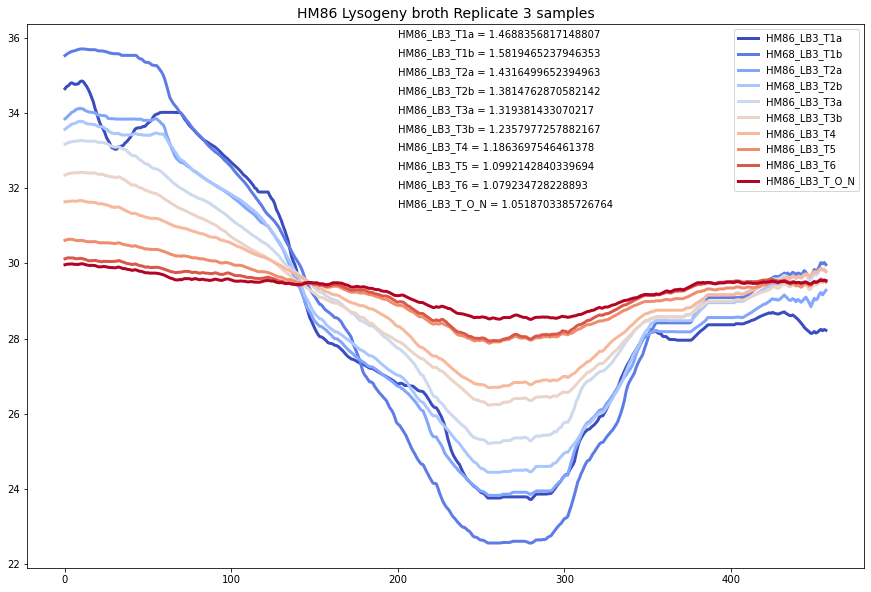

In [19]:
HM86_LB3_T1a = pd.read_csv('LB3/HM86_LB3-T1a/HM86_LB3-T1a.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T1a'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T1b = pd.read_csv('LB3/HM86_LB3-T1b/HM86_LB3-T1b.bed_perc_bins.csv', names=['bin', 'HM68_LB3_T1b'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T1 = pd.merge(HM86_LB3_T1a, HM86_LB3_T1b, on=["bin", "bin"])
HM86_LB3_T1_mean = HM86_LB3_T1[['HM86_LB3_T1a', 'HM68_LB3_T1b']].mean(axis=1)

HM86_LB3_T2a = pd.read_csv('LB3/HM86_LB3-T2a/HM86_LB3-T2a.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T2a'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T2b = pd.read_csv('LB3/HM86_LB3-T2b/HM86_LB3-T2b.bed_perc_bins.csv', names=['bin', 'HM68_LB3_T2b'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T2 = pd.merge(HM86_LB3_T2a, HM86_LB3_T2b, on=["bin", "bin"])
HM86_LB3_T2_mean = HM86_LB3_T2[['HM86_LB3_T2a', 'HM68_LB3_T2b']].mean(axis=1)

HM86_LB3_T3a = pd.read_csv('LB3/HM86_LB3-T3a/HM86_LB3-T3a.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T3a'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T3b = pd.read_csv('LB3/HM86_LB3-T3b/HM86_LB3-T3b.bed_perc_bins.csv', names=['bin', 'HM68_LB3_T3b'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T3 = pd.merge(HM86_LB3_T3a, HM86_LB3_T3b, on=["bin", "bin"])
HM86_LB3_T3_mean = HM86_LB3_T3[['HM86_LB3_T3a', 'HM68_LB3_T3b']].mean(axis=1)

HM86_LB3_T4 = pd.read_csv('LB3/HM86_LB3-T4/HM86_LB3-T4.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T4'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T5 = pd.read_csv('LB3/HM86_LB3-T5/HM86_LB3-T5.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T5'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T6 = pd.read_csv('LB3/HM86_LB3-T6/HM86_LB3-T6.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T6'], header=None, dtype=float, skiprows=[0])
HM86_LB3_T_O_N = pd.read_csv('LB3/HM86_LB3-T_O-N/HM86_LB3-T_O-N.bed_perc_bins.csv', names=['bin', 'HM86_LB3_T_O_N'], header=None, dtype=float, skiprows=[0])

#!grep 'median_sliding_window_array' LB3/*/*bins_PTR.txt

HM86_LB3_temp1 = pd.merge(HM86_LB3_T1a, HM86_LB3_T1b, on=["bin", "bin"])
HM86_LB3_temp2 = pd.merge(HM86_LB3_temp1, HM86_LB3_T2a, on=["bin", "bin"])
HM86_LB3_temp3 = pd.merge(HM86_LB3_temp2, HM86_LB3_T2b, on=["bin", "bin"])
HM86_LB3_temp4 = pd.merge(HM86_LB3_temp3, HM86_LB3_T3a, on=["bin", "bin"])
HM86_LB3_temp5 = pd.merge(HM86_LB3_temp4, HM86_LB3_T3b, on=["bin", "bin"])
HM86_LB3_temp6 = pd.merge(HM86_LB3_temp5, HM86_LB3_T4, on=["bin", "bin"])
HM86_LB3_temp7 = pd.merge(HM86_LB3_temp6, HM86_LB3_T5, on=["bin", "bin"])
HM86_LB3_temp8 = pd.merge(HM86_LB3_temp7, HM86_LB3_T6, on=["bin", "bin"])
HM86_LB3 = pd.merge(HM86_LB3_temp8, HM86_LB3_T_O_N, on=["bin", "bin"])
HM86_LB3 = HM86_LB3.drop(['bin'], axis=1)

fig, ax = plt.subplots(1, 1)
HM86_LB3.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 36, 'HM86_LB3_T1a = 1.4688356817148807', fontsize = 10)
ax.text(200, 35.5, 'HM86_LB3_T1b = 1.5819465237946353', fontsize = 10)
ax.text(200, 35, 'HM86_LB3_T2a = 1.4316499652394963', fontsize = 10)
ax.text(200, 34.5, 'HM86_LB3_T2b = 1.3814762870582142', fontsize = 10)
ax.text(200, 34, 'HM86_LB3_T3a = 1.319381433070217', fontsize = 10)
ax.text(200, 33.5, 'HM86_LB3_T3b = 1.2357977257882167', fontsize = 10)
ax.text(200, 33, 'HM86_LB3_T4 = 1.1863697546461378', fontsize = 10)
ax.text(200, 32.5, 'HM86_LB3_T5 = 1.0992142840339694', fontsize = 10)
ax.text(200, 32, 'HM86_LB3_T6 = 1.079234728228893', fontsize = 10)
ax.text(200, 31.5, 'HM86_LB3_T_O_N = 1.0518703385726764', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM86 Lysogeny broth - Replicate 3 samples at different time points." + "\033[0m")
ax.set_title('HM86 Lysogeny broth Replicate 3 samples', 
             fontsize = 14)

##### M9 Glucose

Growth Curve for HM86 M9Glucose samples at different time points.


Text(0.5, 1.0, 'HM86 M9Glucose samples')

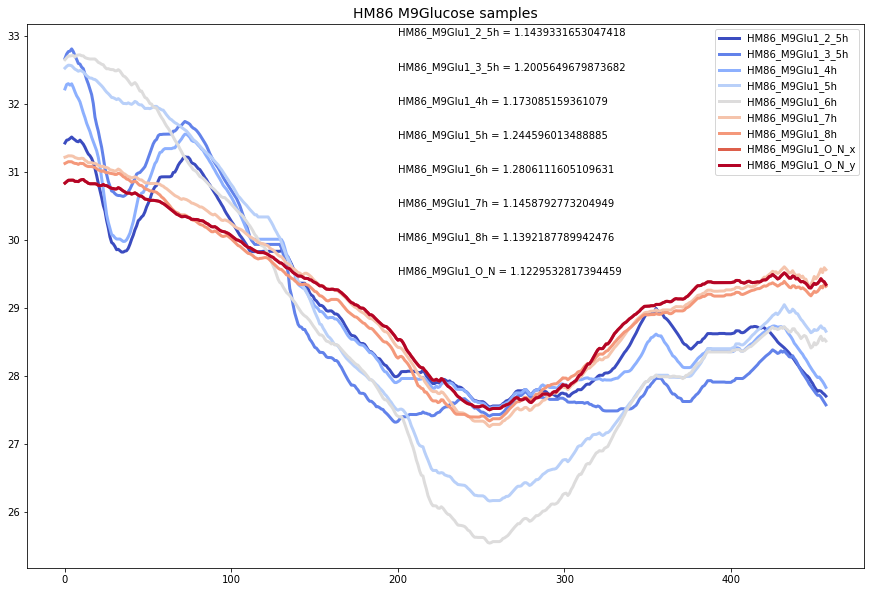

In [20]:
HM86_M9Glu1_2_5h = pd.read_csv('M9Glu1/HM86_M9Glu1-2.5h/HM86_M9Glu1-2.5h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_2_5h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_3_5h = pd.read_csv('M9Glu1/HM86_M9Glu1-3.5h/HM86_M9Glu1-3.5h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_3_5h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_4h = pd.read_csv('M9Glu1/HM86_M9Glu1-4h/HM86_M9Glu1-4h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_4h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_5h = pd.read_csv('M9Glu1/HM86_M9Glu1-5h/HM86_M9Glu1-5h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_5h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_6h = pd.read_csv('M9Glu1/HM86_M9Glu1-6h/HM86_M9Glu1-6h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_6h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_7h = pd.read_csv('M9Glu1/HM86_M9Glu1-7h/HM86_M9Glu1-7h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_7h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_8h = pd.read_csv('M9Glu1/HM86_M9Glu1-8h/HM86_M9Glu1-8h.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_8h'], header=None, dtype=float, skiprows=[0])
HM86_M9Glu1_O_N = pd.read_csv('M9Glu1/HM86_M9Glu1-_O-N/HM86_M9Glu1-_O-N.bed_perc_bins.csv', names=['bin', 'HM86_M9Glu1_O_N'], header=None, dtype=float, skiprows=[0])

#!grep 'median_sliding_window_array' M9Glu1/*/*bins_PTR.txt

HM86_M9Glu1_temp1 = pd.merge(HM86_M9Glu1_2_5h, HM86_M9Glu1_3_5h, on=["bin", "bin"])
HM86_M9Glu1_temp2 = pd.merge(HM86_M9Glu1_temp1, HM86_M9Glu1_4h, on=["bin", "bin"])
HM86_M9Glu1_temp3 = pd.merge(HM86_M9Glu1_temp2, HM86_M9Glu1_5h, on=["bin", "bin"])
HM86_M9Glu1_temp4 = pd.merge(HM86_M9Glu1_temp3, HM86_M9Glu1_6h, on=["bin", "bin"])
HM86_M9Glu1_temp5 = pd.merge(HM86_M9Glu1_temp4, HM86_M9Glu1_7h, on=["bin", "bin"])
HM86_M9Glu1_temp6 = pd.merge(HM86_M9Glu1_temp5, HM86_M9Glu1_8h, on=["bin", "bin"])
HM86_M9Glu1_temp7 = pd.merge(HM86_M9Glu1_temp6, HM86_M9Glu1_O_N, on=["bin", "bin"])
HM86_M9Glu1 = pd.merge(HM86_M9Glu1_temp7, HM86_M9Glu1_O_N, on=["bin", "bin"])
HM86_M9Glu1 = HM86_M9Glu1.drop(['bin'], axis=1)

fig, ax = plt.subplots(1, 1)
HM86_M9Glu1.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 33, 'HM86_M9Glu1_2_5h = 1.1439331653047418', fontsize = 10)
ax.text(200, 32.5, 'HM86_M9Glu1_3_5h = 1.2005649679873682', fontsize = 10)
ax.text(200, 32, 'HM86_M9Glu1_4h = 1.173085159361079', fontsize = 10)
ax.text(200, 31.5, 'HM86_M9Glu1_5h = 1.244596013488885', fontsize = 10)
ax.text(200, 31, 'HM86_M9Glu1_6h = 1.2806111605109631', fontsize = 10)
ax.text(200, 30.5, 'HM86_M9Glu1_7h = 1.1458792773204949', fontsize = 10)
ax.text(200, 30, 'HM86_M9Glu1_8h = 1.1392187789942476', fontsize = 10)
ax.text(200, 29.5, 'HM86_M9Glu1_O_N = 1.1229532817394459', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM86 M9Glucose samples at different time points." + "\033[0m")
ax.set_title('HM86 M9Glucose samples', 
             fontsize = 14)

##### Stab - Terrific Broth

Growth Curve for HM86 Stab samples at different time points.


Text(0.5, 1.0, 'HM86 Stab samples')

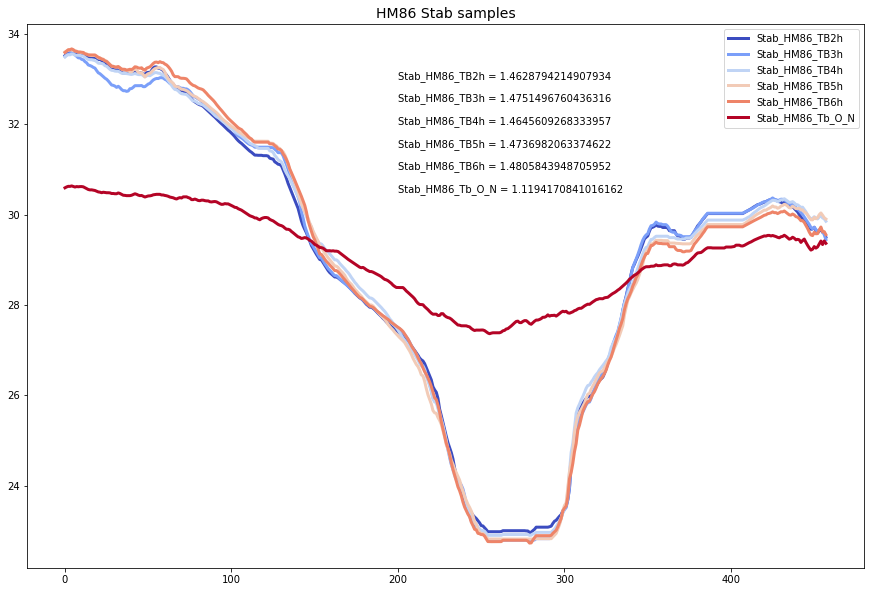

In [21]:
Stab_HM86_TB2h = pd.read_csv('Stab-TB/Stab_HM86_TB2h/Stab_HM86_TB2h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB2h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_TB3h = pd.read_csv('Stab-TB/Stab_HM86_TB3h/Stab_HM86_TB3h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB3h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_TB4h = pd.read_csv('Stab-TB/Stab_HM86_TB4h/Stab_HM86_TB4h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB4h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_TB5h = pd.read_csv('Stab-TB/Stab_HM86_TB5h/Stab_HM86_TB5h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB5h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_TB6h = pd.read_csv('Stab-TB/Stab_HM86_TB6h/Stab_HM86_TB6h.bed_perc_bins.csv', names=['bin', 'Stab_HM86_TB6h'], header=None, dtype=float, skiprows=[0])
Stab_HM86_Tb_O_N = pd.read_csv('Stab-TB/Stab_HM86_Tb_O-N/Stab_HM86_Tb_O-N.bed_perc_bins.csv', names=['bin', 'Stab_HM86_Tb_O_N'], header=None, dtype=float, skiprows=[0])

#!grep 'median_sliding_window_array' Stab-TB/*/*bins_PTR.txt

Stab_HM86_temp1 = pd.merge(Stab_HM86_TB2h, Stab_HM86_TB3h, on=["bin", "bin"])
Stab_HM86_temp2 = pd.merge(Stab_HM86_temp1, Stab_HM86_TB4h, on=["bin", "bin"])
Stab_HM86_temp3 = pd.merge(Stab_HM86_temp2, Stab_HM86_TB5h, on=["bin", "bin"])
Stab_HM86_temp4 = pd.merge(Stab_HM86_temp3, Stab_HM86_TB6h, on=["bin", "bin"])
Stab_HM86 = pd.merge(Stab_HM86_temp4, Stab_HM86_Tb_O_N, on=["bin", "bin"])

Stab_HM86 = Stab_HM86.drop(['bin'], axis=1)

fig, ax = plt.subplots(1, 1)
Stab_HM86.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 33, 'Stab_HM86_TB2h = 1.4628794214907934', fontsize = 10)
ax.text(200, 32.5, 'Stab_HM86_TB3h = 1.4751496760436316', fontsize = 10)
ax.text(200, 32, 'Stab_HM86_TB4h = 1.4645609268333957', fontsize = 10)
ax.text(200, 31.5, 'Stab_HM86_TB5h = 1.4736982063374622', fontsize = 10)
ax.text(200, 31, 'Stab_HM86_TB6h = 1.4805843948705952', fontsize = 10)
ax.text(200, 30.5, 'Stab_HM86_Tb_O_N = 1.1194170841016162', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM86 Stab samples at different time points." + "\033[0m")
ax.set_title('HM86 Stab samples', 
             fontsize = 14)

##### Stab - Human Urine

Growth Curve for HM86 Stab Human Urine samples at different time points.


Text(0.5, 1.0, 'HM86 Stab Urine samples')

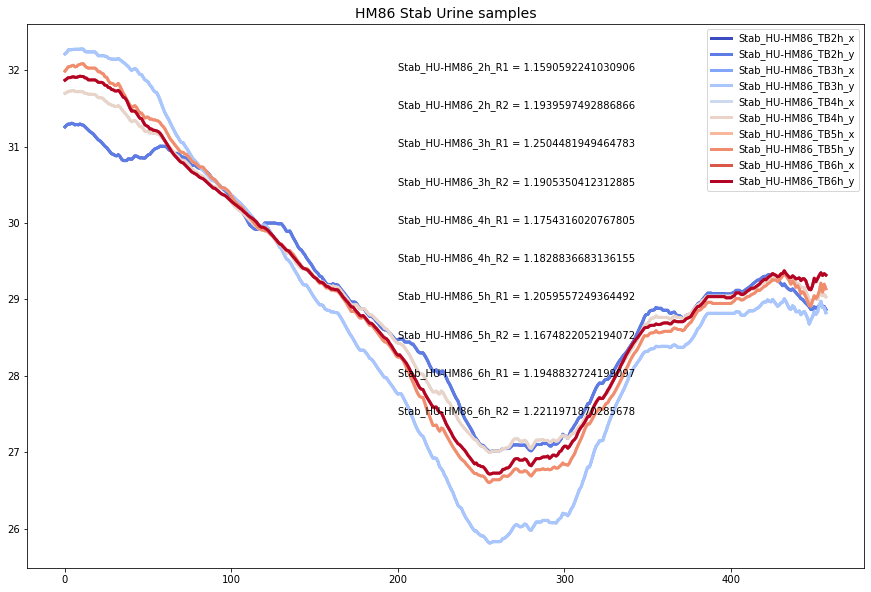

In [22]:
Stab_HU_HM86_TB2h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_2h_R1/Stab_HU-HM86_2h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB2h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB2h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_2h_R1/Stab_HU-HM86_2h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB2h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB3h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_3h_R1/Stab_HU-HM86_3h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB3h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB3h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_3h_R1/Stab_HU-HM86_3h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB3h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB4h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_4h_R1/Stab_HU-HM86_4h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB4h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB4h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_4h_R1/Stab_HU-HM86_4h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB4h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB5h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_5h_R1/Stab_HU-HM86_5h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB5h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB5h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_5h_R1/Stab_HU-HM86_5h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB5h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB6h_R1 = pd.read_csv('Stab-HU/Stab_HU-HM86_6h_R1/Stab_HU-HM86_6h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB6h'], header=None, dtype=float, skiprows=[0])
Stab_HU_HM86_TB6h_R2 = pd.read_csv('Stab-HU/Stab_HU-HM86_6h_R1/Stab_HU-HM86_6h_R1.bed_perc_bins.csv', names=['bin', 'Stab_HU-HM86_TB6h'], header=None, dtype=float, skiprows=[0])

#!grep 'median_sliding_window_array' Stab-HU/*/*bins_PTR.txt

Stab_HU_HM86_temp1 = pd.merge(Stab_HU_HM86_TB2h_R1, Stab_HU_HM86_TB2h_R2, on=["bin", "bin"])
Stab_HU_HM86_temp2 = pd.merge(Stab_HU_HM86_temp1, Stab_HU_HM86_TB3h_R1, on=["bin", "bin"])
Stab_HU_HM86_temp3 = pd.merge(Stab_HU_HM86_temp2, Stab_HU_HM86_TB3h_R2, on=["bin", "bin"])
Stab_HU_HM86_temp4 = pd.merge(Stab_HU_HM86_temp3, Stab_HU_HM86_TB4h_R1, on=["bin", "bin"])
Stab_HU_HM86_temp5 = pd.merge(Stab_HU_HM86_temp4, Stab_HU_HM86_TB4h_R2, on=["bin", "bin"])
Stab_HU_HM86_temp6 = pd.merge(Stab_HU_HM86_temp5, Stab_HU_HM86_TB5h_R1, on=["bin", "bin"])
Stab_HU_HM86_temp7 = pd.merge(Stab_HU_HM86_temp6, Stab_HU_HM86_TB5h_R2, on=["bin", "bin"])
Stab_HU_HM86_temp8 = pd.merge(Stab_HU_HM86_temp7, Stab_HU_HM86_TB6h_R1, on=["bin", "bin"])
Stab_HU_HM86 = pd.merge(Stab_HU_HM86_temp8, Stab_HU_HM86_TB6h_R2, on=["bin", "bin"])


Stab_HU_HM86 = Stab_HU_HM86.drop(['bin'], axis=1)

fig, ax = plt.subplots(1, 1)
Stab_HU_HM86.plot(legend=True, ax=ax, colormap='coolwarm', lw=3)
ax.text(200, 32, 'Stab_HU-HM86_2h_R1 = 1.1590592241030906', fontsize = 10)
ax.text(200, 31.5, 'Stab_HU-HM86_2h_R2 = 1.1939597492886866', fontsize = 10)
ax.text(200, 31, 'Stab_HU-HM86_3h_R1 = 1.2504481949464783', fontsize = 10)
ax.text(200, 30.5, 'Stab_HU-HM86_3h_R2 = 1.1905350412312885', fontsize = 10)
ax.text(200, 30, 'Stab_HU-HM86_4h_R1 = 1.1754316020767805', fontsize = 10)
ax.text(200, 29.5, 'Stab_HU-HM86_4h_R2 = 1.1828836683136155', fontsize = 10)
ax.text(200, 29, 'Stab_HU-HM86_5h_R1 = 1.2059557249364492', fontsize = 10)
ax.text(200, 28.5, 'Stab_HU-HM86_5h_R2 = 1.1674822052194072', fontsize = 10)
ax.text(200, 28, 'Stab_HU-HM86_6h_R1 = 1.1948832724199097', fontsize = 10)
ax.text(200, 27.5, 'Stab_HU-HM86_6h_R2 = 1.2211971870285678', fontsize = 10)
print ("\033[1m" + "Growth Curve for HM86 Stab Human Urine samples at different time points." + "\033[0m")
ax.set_title('HM86 Stab Urine samples', 
             fontsize = 14)

### Estimate coordinates of OriC and ter genes using qPCR targeted loci

    - Find genomics coordiantes of qPCR targeted Origin of replication and termination loci in HM86 and HM68 genomes using Blast.
    - Location of genes on turbo:

        ```
        /nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/resources/HM68/HM68_OriTer.fasta
        /nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/resources/HM86/HM86_OriTer.fasta
        ```

In [23]:
## Blast commands:
    
# Bash
# cd /nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/resources/HM86
# /nfs/esnitkin/bin_group/ncbi-blast-2.9.0+/bin/makeblastdb -in HM86.fasta -dbtype nucl -title HM86
# /nfs/esnitkin/bin_group/ncbi-blast-2.9.0+/bin/blastn -db HM86.fasta -query HM86_OriTer.fasta -out HM86_OriTer_blast.txt -perc_identity 100.00 -outfmt 6
# printf "\nHM86 Gene coordinates\n"
# cut -f1,9,10 HM86_OriTer_blast.txt

# cd /nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/resources/HM68
# /nfs/esnitkin/bin_group/ncbi-blast-2.9.0+/bin/makeblastdb -in HM68.fasta -dbtype nucl -title HM68 
# /nfs/esnitkin/bin_group/ncbi-blast-2.9.0+/bin/blastn -db HM68.fasta -query HM68_OriTer.fasta -out HM68_OriTer_blast.txt -perc_identity 100.00 -outfmt 6
# printf "\nHM68 Gene coordinates\n"
# cut -f1,9,10 HM68_OriTer_blast.txt

### Merge OD measurements with PTR 

In [24]:
#OD_measurements = pd.read_csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/OD_measurements.tsv')
# Changing OD measurement file - 2023-08-23 Adding CFU values for Growth rate calculation
OD_measurements = pd.read_csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/OD_measurements_with_CFU.tsv', sep="\t")

OD_measurements.rename(columns = {'Sample Name':'sample_id'}, inplace = True)

qPCR_measurements = pd.read_csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/qPCR_lab.csv')
qPCR_measurements.rename(columns = {'Sample Name':'sample_id'}, inplace = True)

PTR_OD_measurements = pd.merge(PTR_results, OD_measurements, how="left", on=["sample_id", "sample_id"])
PTR_OD_qPCR_measurements = pd.merge(PTR_OD_measurements, qPCR_measurements, how="left", on=["sample_id", "sample_id"])

PTR_OD_measurements['TimePoint(Hrs)'] = PTR_OD_measurements['TimePoint'].replace({ 'T1' : 1, 'T2.5' : 2.5, 'T2' : 2, 'T3' : 3, 'T4' : 4, 'T5' : 5, 'T6' : 6, 'T7' : 7, 'T8' : 8, 'h' : '', 'a' : '', 'b' : '', 'T_O-N': 'O-N'}, regex=True)
PTR_OD_qPCR_measurements['TimePoint(Hrs)'] = PTR_OD_qPCR_measurements['TimePoint'].replace({ 'T1' : 1, 'T2.5' : 2.5, 'T2' : 2, 'T3' : 3, 'T4' : 4, 'T5' : 5, 'T6' : 6, 'T7' : 7, 'T8' : 8, 'h' : '', 'a' : '', 'b' : '', 'T_O-N': 'O-N'}, regex=True)

#PTR_OD_measurements['Condition'].unique()

In [25]:

PTR_OD_qPCR_measurements = PTR_OD_qPCR_measurements.replace("T_O-N", 0)
PTR_OD_qPCR_measurements = PTR_OD_qPCR_measurements.replace("O-N", 0)

In [40]:
import datetime
file = []
today = datetime.date.today()
file.append(today)
print(file[0])

2023-08-25


In [43]:
PTR_OD_qPCR_measurements.to_csv("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/%s_PTR_CFU_measurements.csv" % file[0], index=False)

In [26]:
PTR_OD_qPCR_measurements

,sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome PTR,Ori/Ter PTR,OD600,Notes,CFU/ml,Sample ID,qPCR_PTR,TimePoint(Hrs)
0,GC_HU-HM86_3h,HM86,GC_HU,3h,a,GC_HU-HM86_3h_R1.fastq.gz,GC_HU-HM86_3h_R2.fastq.gz,1.266543,1.785376,ND,HU-Stability,8.450000e+08,8399-SP-78,1.338288,3
1,GC_HU-HM86_4h,HM86,GC_HU,4h,a,GC_HU-HM86_4h_R1.fastq.gz,GC_HU-HM86_4h_R2.fastq.gz,1.100740,1.360072,ND,HU-Stability,2.200000e+09,8399-SP-79,1.068144,4
2,GC_HU-HM86_5h,HM86,GC_HU,5h,a,GC_HU-HM86_5h_R1.fastq.gz,GC_HU-HM86_5h_R2.fastq.gz,1.090105,1.247135,ND,HU-Stability,1.200000e+09,8399-SP-80,0.993331,5
3,GC_HU-HM86_6h,HM86,GC_HU,6h,a,GC_HU-HM86_6h_R1.fastq.gz,GC_HU-HM86_6h_R2.fastq.gz,1.079097,1.335492,ND,HU-Stability,1.400000e+09,8399-SP-81,0.972966,6
4,HM68_TB1_T1,HM68,TB1,T1,a,HM68_TB1_T1_R1.fastq.gz,HM68_TB1_T1_R2.fastq.gz,1.811068,1.191446,0.343,68TB_Rep1,1.900000e+08,8399-SP-91,2.375922,1
5,HM68_TB1-T2.5,HM68,TB1,T2.5,a,HM68_TB1-T2.5_R1.fastq.gz,HM68_TB1-T2.5_R2.fastq.gz,1.346628,1.129689,1.392,68TB_Rep1,2.950000e+09,8399-SP-93,1.406652,2.5
6,HM68_TB1-T2,HM68,TB1,T2,a,HM68_TB1-T2_R1.fastq.gz,HM68_TB1-T2_R2.fastq.gz,1.611574,1.199113,1.121,68TB_Rep1,6.500000e+08,8399-SP-92,2.183189,2
7,HM68_TB1-T3,HM68,TB1,T3,a,HM68_TB1-T3_R1.fastq.gz,HM68_TB1-T3_R2.fastq.gz,1.248157,1.070098,3.62,68TB_Rep1,4.050000e+09,8399-SP-94,1.344567,3
8,HM68_TB1-T4,HM68,TB1,T4,a,HM68_TB1-T4_R1.fastq.gz,HM68_TB1-T4_R2.fastq.gz,1.141269,1.244483,4.48,68TB_Rep1,5.650000e+09,8399-SP-95,1.122063,4
9,HM68_TB1-T5,HM68,TB1,T5,a,HM68_TB1-T5_R1.fastq.gz,HM68_TB1-T5_R2.fastq.gz,1.111355,1.513238,6.09,68TB_Rep1,2.050000e+10,8399-SP-96,1.020475,5


Comparing Genomic PTR values against PTR calculated from the mean coverage of Ori/Ter loci


Text(0.5, 1.0, 'Genomic PTR vs Ori/Ter loci PTR')

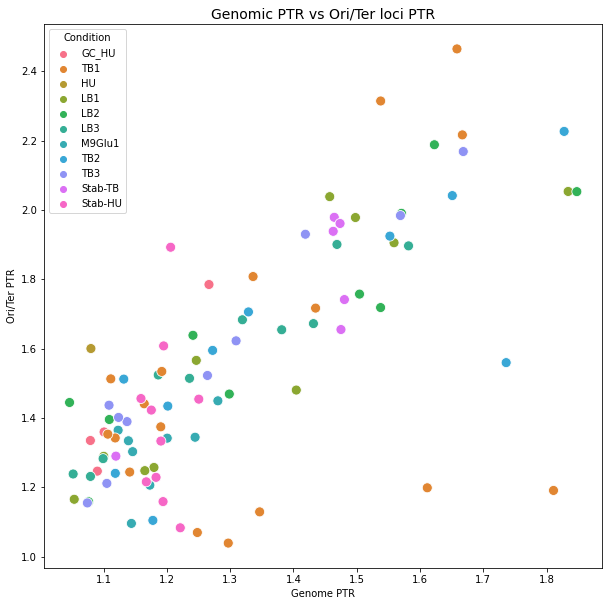

In [27]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# ax1 = PTR_OD_measurements.plot.scatter(x = 'Genome PTR', y = 'Ori/Ter PTR', c = 'DarkBlue', title="Genomic PTR vs qPCR loci PTR")
g = sns.scatterplot(data=PTR_OD_measurements, x='Genome PTR', y='Ori/Ter PTR', hue='Condition', s=100)

print ("\033[1m" + "Comparing Genomic PTR values against PTR calculated from the mean coverage of Ori/Ter loci" + "\033[0m")
g.set_title('Genomic PTR vs Ori/Ter loci PTR', 
             fontsize = 14)

Comparing qPCR PTR values against PTR calculated from the mean coverage of Ori/Ter loci


Text(0.5, 1.0, 'qPCR PTR vs Ori/Ter loci PTR')

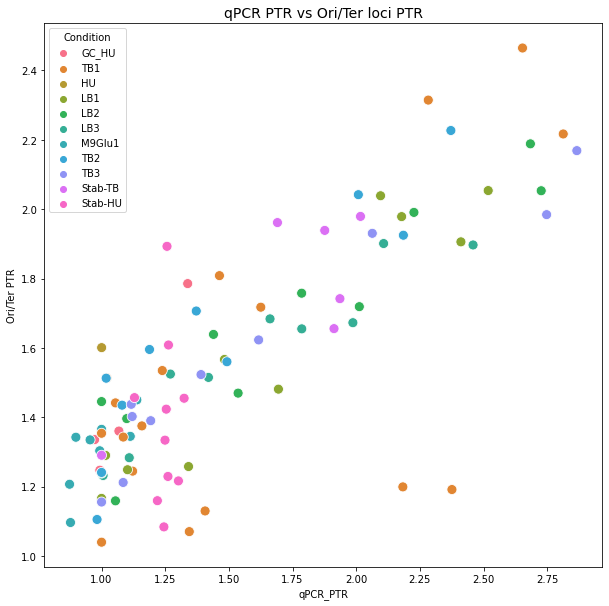

In [28]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# ax1 = PTR_OD_measurements.plot.scatter(x = 'Genome PTR', y = 'Ori/Ter PTR', c = 'DarkBlue', title="Genomic PTR vs qPCR loci PTR")
g = sns.scatterplot(data=PTR_OD_qPCR_measurements, x='qPCR_PTR', y='Ori/Ter PTR', hue='Condition', s=100)

print ("\033[1m" + "Comparing qPCR PTR values against PTR calculated from the mean coverage of Ori/Ter loci" + "\033[0m")
g.set_title('qPCR PTR vs Ori/Ter loci PTR', 
             fontsize = 14)

Comparing qPCR PTR values against Genomic PTR


Text(0.5, 1.0, 'qPCR PTR vs Genomic PTR')

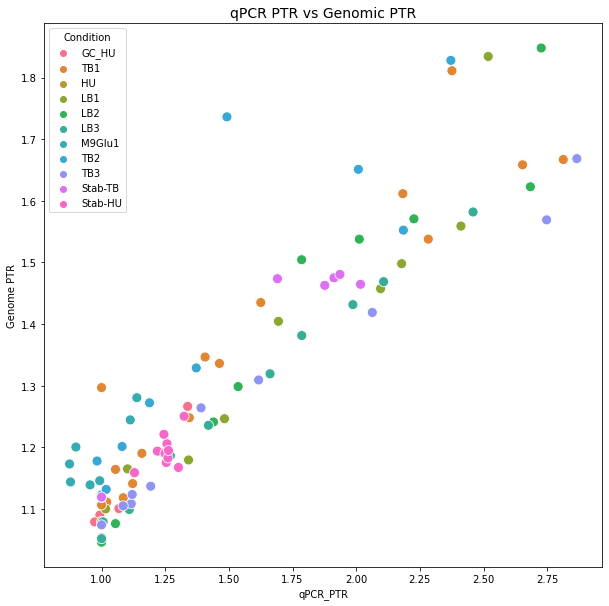

In [29]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# ax1 = PTR_OD_measurements.plot.scatter(x = 'Genome PTR', y = 'Ori/Ter PTR', c = 'DarkBlue', title="Genomic PTR vs qPCR loci PTR")
g = sns.scatterplot(data=PTR_OD_qPCR_measurements, x='qPCR_PTR', y='Genome PTR', hue='Condition', s=100)

print ("\033[1m" + "Comparing qPCR PTR values against Genomic PTR" + "\033[0m")
g.set_title('qPCR PTR vs Genomic PTR', 
             fontsize = 14)

#### Genomic PTR vs Ori/Ter PTR

Comparing Genomic PTR values against PTR calculated from the mean coverage of Ori/Ter loci for individual conditions and replicates


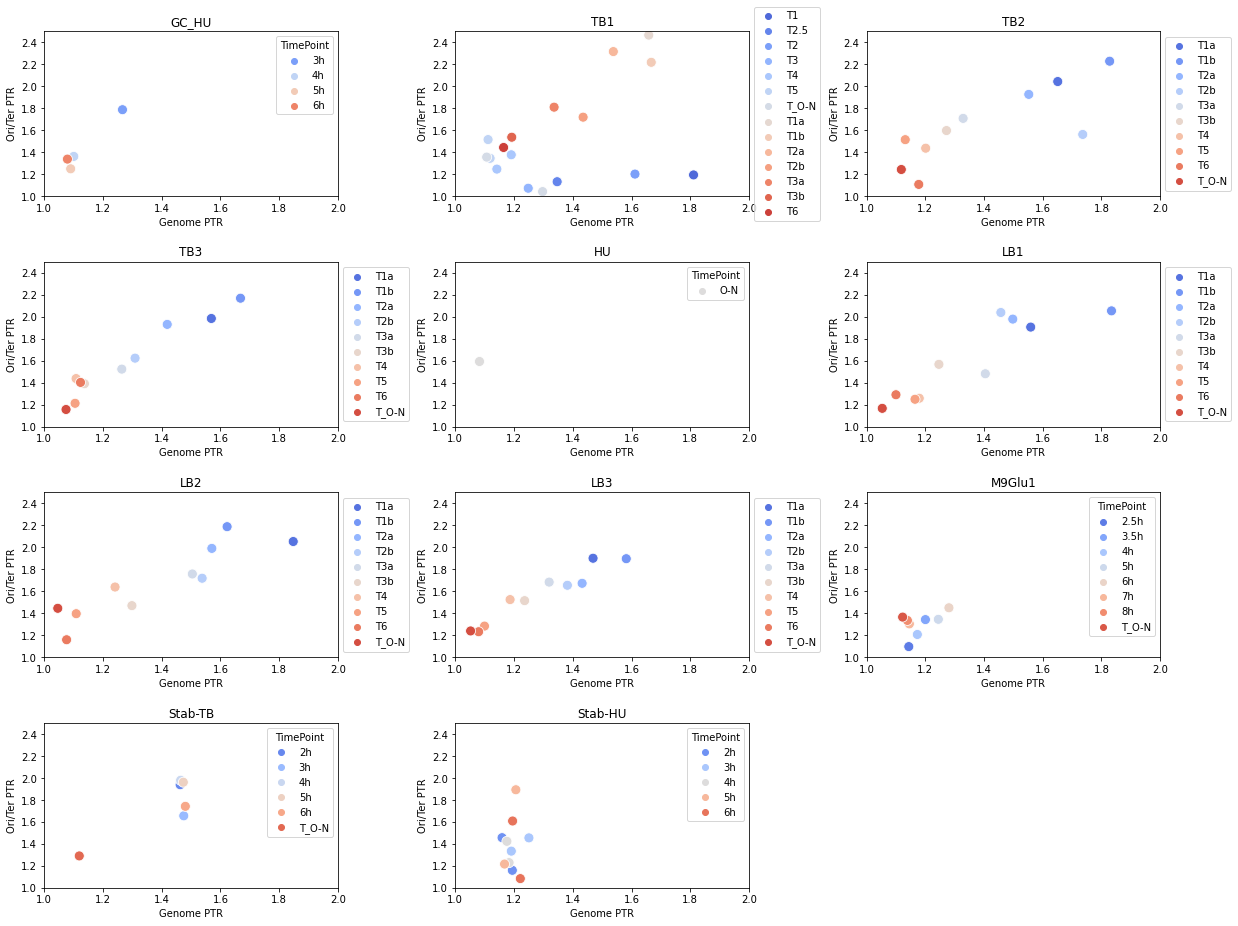

In [30]:
import numpy as np
import pandas as pd
import glob

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)


ax = fig.add_subplot(5, 3, 1)

ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "GC_HU"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("GC_HU")

ax = fig.add_subplot(5, 3, 2)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "TB1"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("TB1")

ax = fig.add_subplot(5, 3, 3)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "TB2"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("TB2")

ax = fig.add_subplot(5, 3, 4)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "TB3"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("TB3")

ax = fig.add_subplot(5, 3, 5)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "HU"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("HU")

ax = fig.add_subplot(5, 3, 6)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "LB1"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("LB1")

ax = fig.add_subplot(5, 3, 7)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "LB2"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("LB2")

ax = fig.add_subplot(5, 3, 8)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "LB3"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("LB3")

ax = fig.add_subplot(5, 3, 9)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "M9Glu1"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("M9Glu1")

ax = fig.add_subplot(5, 3, 10)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "Stab-TB"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("Stab-TB")

ax = fig.add_subplot(5, 3, 11)
ax1 = sns.scatterplot(data=PTR_OD_measurements[PTR_OD_measurements['Condition'] == "Stab-HU"], x='Genome PTR', y='Ori/Ter PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("Stab-HU")

print ("\033[1m" + "Comparing Genomic PTR values against PTR calculated from the mean coverage of Ori/Ter loci for individual conditions and replicates" + "\033[0m")


#### Genomic PTR vs qPCR PTR

Comparing Genomic PTR values against qPCR PTR for individual conditions and replicates


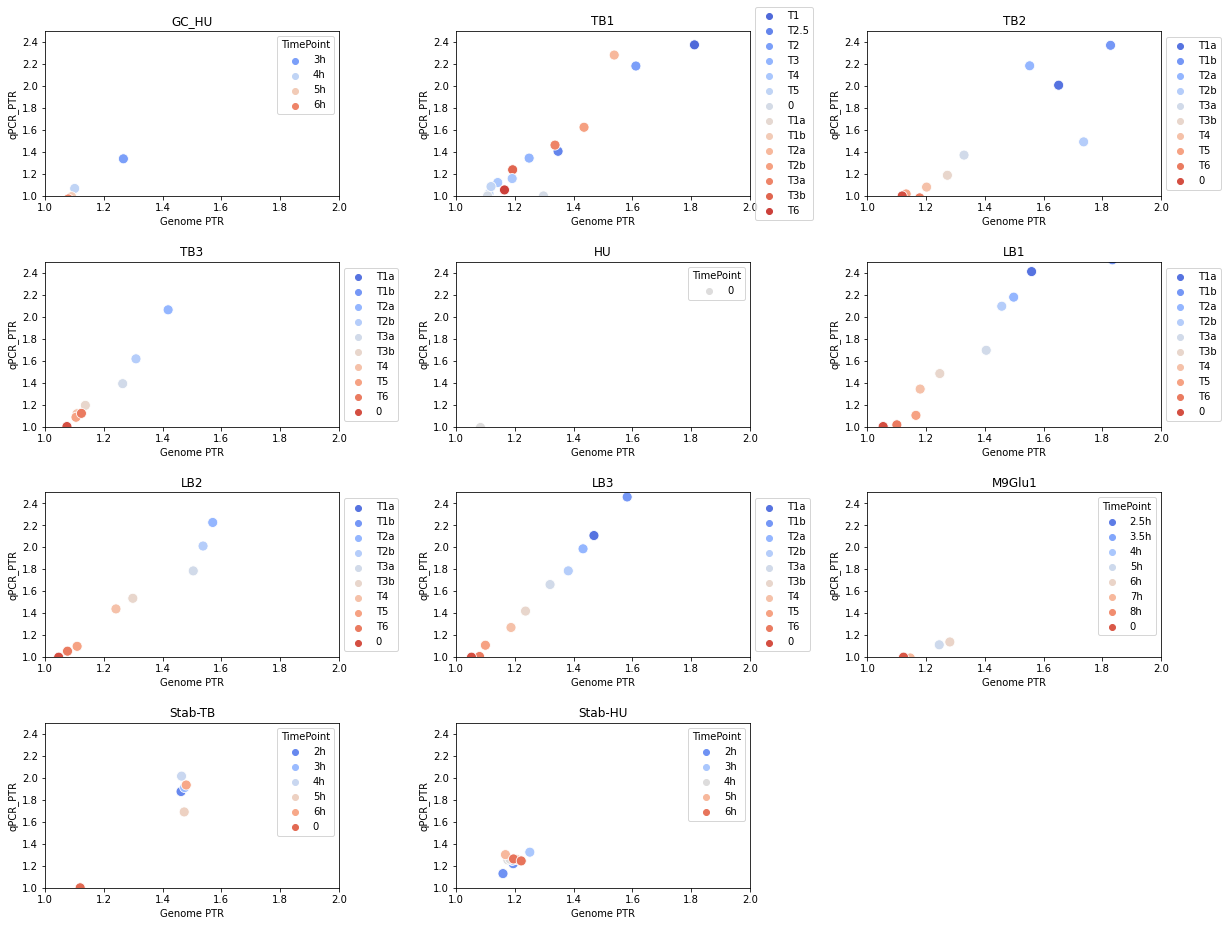

In [31]:
import numpy as np
import pandas as pd
import glob

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)


ax = fig.add_subplot(5, 3, 1)

ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "GC_HU"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("GC_HU")

ax = fig.add_subplot(5, 3, 2)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "TB1"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("TB1")

ax = fig.add_subplot(5, 3, 3)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "TB2"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("TB2")

ax = fig.add_subplot(5, 3, 4)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "TB3"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("TB3")

ax = fig.add_subplot(5, 3, 5)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "HU"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("HU")

ax = fig.add_subplot(5, 3, 6)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "LB1"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("LB1")

ax = fig.add_subplot(5, 3, 7)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "LB2"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("LB2")

ax = fig.add_subplot(5, 3, 8)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "LB3"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("LB3")

ax = fig.add_subplot(5, 3, 9)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "M9Glu1"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("M9Glu1")

ax = fig.add_subplot(5, 3, 10)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "Stab-TB"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("Stab-TB")

ax = fig.add_subplot(5, 3, 11)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "Stab-HU"], x='Genome PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([1, 2.5])
ax1.set_xlim([1, 2])
plt.title("Stab-HU")

print ("\033[1m" + "Comparing Genomic PTR values against qPCR PTR for individual conditions and replicates" + "\033[0m")


#### qPCR PTR vs Ori/Ter PTR

Comparing qPCR PTR values against PTR calculated from the mean coverage of Ori/Ter loci for individual conditions and replicates


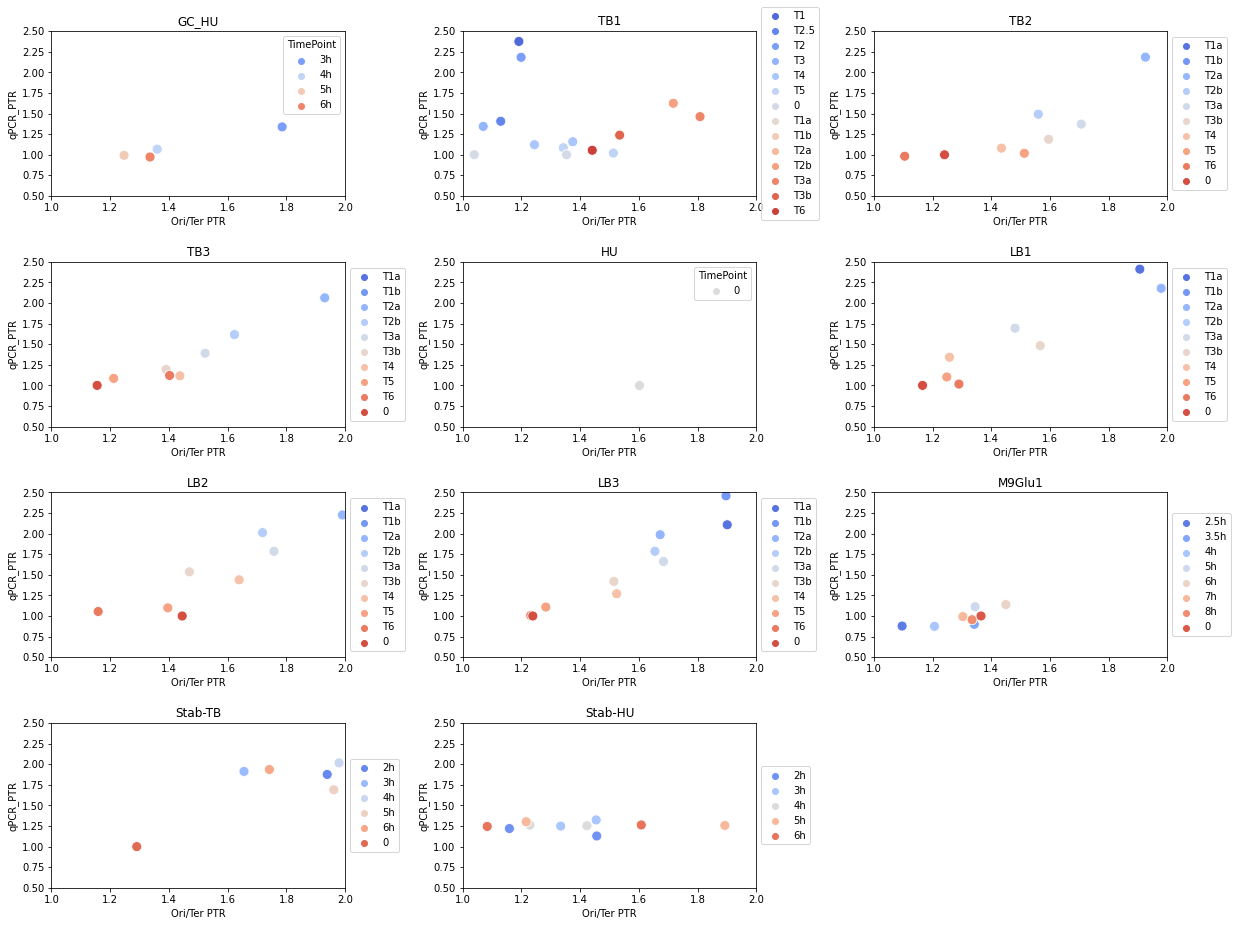

In [32]:
import numpy as np
import pandas as pd
import glob

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)


ax = fig.add_subplot(5, 3, 1)

ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "GC_HU"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
plt.title("GC_HU")

ax = fig.add_subplot(5, 3, 2)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "TB1"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("TB1")

ax = fig.add_subplot(5, 3, 3)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "TB2"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("TB2")

ax = fig.add_subplot(5, 3, 4)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "TB3"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("TB3")

ax = fig.add_subplot(5, 3, 5)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "HU"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
plt.title("HU")

ax = fig.add_subplot(5, 3, 6)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "LB1"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("LB1")

ax = fig.add_subplot(5, 3, 7)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "LB2"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("LB2")

ax = fig.add_subplot(5, 3, 8)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "LB3"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("LB3")

ax = fig.add_subplot(5, 3, 9)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "M9Glu1"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("M9Glu1")

ax = fig.add_subplot(5, 3, 10)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "Stab-TB"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Stab-TB")

ax = fig.add_subplot(5, 3, 11)
ax1 = sns.scatterplot(data=PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['Condition'] == "Stab-HU"], x='Ori/Ter PTR', y='qPCR_PTR', hue='TimePoint', s=100, ax=ax, palette="coolwarm")
ax1.set_ylim([0.5, 2.5])
ax1.set_xlim([1, 2])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Stab-HU")

print ("\033[1m" + "Comparing qPCR PTR values against PTR calculated from the mean coverage of Ori/Ter loci for individual conditions and replicates" + "\033[0m")


### Calculate Growth Rate from change in CFU over time

In [33]:
PTR_OD_qPCR_measurements

,sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome PTR,Ori/Ter PTR,OD600,Notes,CFU/ml,Sample ID,qPCR_PTR,TimePoint(Hrs)
0,GC_HU-HM86_3h,HM86,GC_HU,3h,a,GC_HU-HM86_3h_R1.fastq.gz,GC_HU-HM86_3h_R2.fastq.gz,1.266543,1.785376,ND,HU-Stability,8.450000e+08,8399-SP-78,1.338288,3
1,GC_HU-HM86_4h,HM86,GC_HU,4h,a,GC_HU-HM86_4h_R1.fastq.gz,GC_HU-HM86_4h_R2.fastq.gz,1.100740,1.360072,ND,HU-Stability,2.200000e+09,8399-SP-79,1.068144,4
2,GC_HU-HM86_5h,HM86,GC_HU,5h,a,GC_HU-HM86_5h_R1.fastq.gz,GC_HU-HM86_5h_R2.fastq.gz,1.090105,1.247135,ND,HU-Stability,1.200000e+09,8399-SP-80,0.993331,5
3,GC_HU-HM86_6h,HM86,GC_HU,6h,a,GC_HU-HM86_6h_R1.fastq.gz,GC_HU-HM86_6h_R2.fastq.gz,1.079097,1.335492,ND,HU-Stability,1.400000e+09,8399-SP-81,0.972966,6
4,HM68_TB1_T1,HM68,TB1,T1,a,HM68_TB1_T1_R1.fastq.gz,HM68_TB1_T1_R2.fastq.gz,1.811068,1.191446,0.343,68TB_Rep1,1.900000e+08,8399-SP-91,2.375922,1
5,HM68_TB1-T2.5,HM68,TB1,T2.5,a,HM68_TB1-T2.5_R1.fastq.gz,HM68_TB1-T2.5_R2.fastq.gz,1.346628,1.129689,1.392,68TB_Rep1,2.950000e+09,8399-SP-93,1.406652,2.5
6,HM68_TB1-T2,HM68,TB1,T2,a,HM68_TB1-T2_R1.fastq.gz,HM68_TB1-T2_R2.fastq.gz,1.611574,1.199113,1.121,68TB_Rep1,6.500000e+08,8399-SP-92,2.183189,2
7,HM68_TB1-T3,HM68,TB1,T3,a,HM68_TB1-T3_R1.fastq.gz,HM68_TB1-T3_R2.fastq.gz,1.248157,1.070098,3.62,68TB_Rep1,4.050000e+09,8399-SP-94,1.344567,3
8,HM68_TB1-T4,HM68,TB1,T4,a,HM68_TB1-T4_R1.fastq.gz,HM68_TB1-T4_R2.fastq.gz,1.141269,1.244483,4.48,68TB_Rep1,5.650000e+09,8399-SP-95,1.122063,4
9,HM68_TB1-T5,HM68,TB1,T5,a,HM68_TB1-T5_R1.fastq.gz,HM68_TB1-T5_R2.fastq.gz,1.111355,1.513238,6.09,68TB_Rep1,2.050000e+10,8399-SP-96,1.020475,5


In [34]:
PTR_OD_measurements_exclude_O_N = PTR_OD_qPCR_measurements[PTR_OD_qPCR_measurements['TimePoint(Hrs)'] != 'O-N']
PTR_OD_measurements_exclude_O_N = PTR_OD_measurements_exclude_O_N.astype({'TimePoint(Hrs)':'float'})

#PTR_OD_measurements_exclude_O_N = PTR_OD_measurements_exclude_O_N.astype({'OD600':'float'})
# PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] = PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'].astype(float)
# PTR_OD_measurements_exclude_O_N_sorted = PTR_OD_measurements_exclude_O_N.sort_values(by=['TimePoint(Hrs)'], ascending=True)

In [35]:
PTR_OD_measurements_exclude_O_N = PTR_OD_measurements_exclude_O_N.sort_values(by = ['sample_name', 'Condition', 'TimePoint(Hrs)'], ascending = [True, True, True])

In [36]:
HM68_TB1_PTR_OD_measurements_exclude_O_N = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM68') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB1')]
HM68_TB1_PTR_OD_measurements_exclude_O_N = HM68_TB1_PTR_OD_measurements_exclude_O_N.astype({'OD600':'float'})
HM68_TB1_PTR_OD_measurements_exclude_O_N = HM68_TB1_PTR_OD_measurements_exclude_O_N.astype({'CFU/ml':'float'})
HM68_TB1_PTR_OD_measurements_exclude_O_N['dT'] = abs(HM68_TB1_PTR_OD_measurements_exclude_O_N.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
#HM68_TB1_PTR_OD_measurements_exclude_O_N['dCFU'] = HM68_TB1_PTR_OD_measurements_exclude_O_N['OD600'].div(HM68_TB1_PTR_OD_measurements_exclude_O_N['OD600'].shift(1)).shift(periods=-1)
HM68_TB1_PTR_OD_measurements_exclude_O_N['dCFU'] = HM68_TB1_PTR_OD_measurements_exclude_O_N['CFU/ml'].div(HM68_TB1_PTR_OD_measurements_exclude_O_N['CFU/ml'].shift(1)).shift(periods=-1)
HM68_TB1_PTR_OD_measurements_exclude_O_N['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM68_TB1_PTR_OD_measurements_exclude_O_N['dCFU'] / HM68_TB1_PTR_OD_measurements_exclude_O_N['dT'] )
HM68_TB1_PTR_OD_measurements_exclude_O_N

,sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome PTR,Ori/Ter PTR,OD600,Notes,CFU/ml,Sample ID,qPCR_PTR,TimePoint(Hrs),dT,dCFU,Growth Rate (dlog(CFUml) /dt)
10,HM68_TB1_T_O-N,HM68,TB1,0,a,HM68_TB1_T_O-N_R1.fastq.gz,HM68_TB1_T_O-N_R2.fastq.gz,1.297024,1.039613,0.157,68TB_Rep1,6.000000e+07,8399-SP-90,1.000079,0.0,1.0,3.166667,1.152680
4,HM68_TB1_T1,HM68,TB1,T1,a,HM68_TB1_T1_R1.fastq.gz,HM68_TB1_T1_R2.fastq.gz,1.811068,1.191446,0.343,68TB_Rep1,1.900000e+08,8399-SP-91,2.375922,1.0,1.0,3.421053,1.229948
6,HM68_TB1-T2,HM68,TB1,T2,a,HM68_TB1-T2_R1.fastq.gz,HM68_TB1-T2_R2.fastq.gz,1.611574,1.199113,1.121,68TB_Rep1,6.500000e+08,8399-SP-92,2.183189,2.0,0.5,4.538462,2.205735
5,HM68_TB1-T2.5,HM68,TB1,T2.5,a,HM68_TB1-T2.5_R1.fastq.gz,HM68_TB1-T2.5_R2.fastq.gz,1.346628,1.129689,1.392,68TB_Rep1,2.950000e+09,8399-SP-93,1.406652,2.5,0.5,1.372881,1.010059
7,HM68_TB1-T3,HM68,TB1,T3,a,HM68_TB1-T3_R1.fastq.gz,HM68_TB1-T3_R2.fastq.gz,1.248157,1.070098,3.620,68TB_Rep1,4.050000e+09,8399-SP-94,1.344567,3.0,1.0,1.395062,0.332939
8,HM68_TB1-T4,HM68,TB1,T4,a,HM68_TB1-T4_R1.fastq.gz,HM68_TB1-T4_R2.fastq.gz,1.141269,1.244483,4.480,68TB_Rep1,5.650000e+09,8399-SP-95,1.122063,4.0,1.0,3.628319,1.288769
9,HM68_TB1-T5,HM68,TB1,T5,a,HM68_TB1-T5_R1.fastq.gz,HM68_TB1-T5_R2.fastq.gz,1.111355,1.513238,6.090,68TB_Rep1,2.050000e+10,8399-SP-96,1.020475,5.0,NaN,NaN,NaN


In [45]:
np.log(1.241748 / 0.5)

0.9096672449338121

In [46]:
np.log(1.241748) / 0.5

0.43304012874773357

In [37]:
HM68_TB1_PTR_OD_measurements_exclude_O_N.to_csv("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM68_TB1_PTR_OD_measurements.csv", index=False)

In [6]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM68_TB1_PTR_OD_measurements.csv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM68_TB1.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
OD = growth_data$OD600
plot(growth_data$TimePoint.Hrs., OD, xlim = c(0,6), ylim = c(0, 13), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 13, 1), labels = seq(0, 13, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("OD600", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,6), ylim = c(1, 3), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 3, 0.25), labels = seq(1, 3, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$Growth.Rate..dlog.CFUml...dt.

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,6), ylim = c(0, 2.5), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(0, 2.5, 0.5), labels = seq(0, 2.5, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==0.51), cex= 1.15, font=2)

PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.4604236

[1] 0.3581671

png 
  2

In [19]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM68_TB1_PTR_OD_measurements.csv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM68_TB1.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$CFU.ml
CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,30), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("CFU/ml", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 3), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 3, 0.25), labels = seq(1, 3, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$Growth.Rate..dlog.CFUml...dt.

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(0, 2.5), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(0, 2.5, 0.5), labels = seq(0, 2.5, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==0.51), cex= 1.15, font=2)

PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.4604236

[1] 0.3581671

png 
  2

In [38]:
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'LB1') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a')]
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a = HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a.astype({'OD600':'float'})
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a['dT'] = abs(HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU'] = HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].div(HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].shift(1)).shift(periods=-1)
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU']) / HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a['dT']
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a

HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_temp1 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'LB1') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'b') | ((PTR_OD_measurements_exclude_O_N['Replicate'] == 'LB1') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0))]

HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_temp2 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'LB1') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0)]

HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b = pd.concat([HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_temp1, HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_temp2], axis=0)

HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b = HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b.astype({'OD600':'float'})
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b['dT'] = abs(HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU'] = HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].div(HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].shift(1)).shift(periods=-1)
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU']) / HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b['dT']
HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b

HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'LB2') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a')]
HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a = HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a.astype({'OD600':'float'})
HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a['dT'] = abs(HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU'] = HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].div(HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].shift(1)).shift(periods=-1)
HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU']) / HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a['dT']
HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a

HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_temp1 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'LB2') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'b') | ((PTR_OD_measurements_exclude_O_N['Replicate'] == 'LB2') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0))]

HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_temp2 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'LB2') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0)]

HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b = pd.concat([HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_temp1, HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_temp2], axis=0)

HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b = HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b.astype({'OD600':'float'})
HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b['dT'] = abs(HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU'] = HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].div(HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].shift(1)).shift(periods=-1)
HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU']) / HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b['dT']
HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b

HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'LB3') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a')]
HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a = HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a.astype({'OD600':'float'})
HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a['dT'] = abs(HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU'] = HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].div(HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].shift(1)).shift(periods=-1)
HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU']) / HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a['dT']
HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a

HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_temp1 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'LB3') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'b') | ((PTR_OD_measurements_exclude_O_N['Replicate'] == 'LB3') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0))]

HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_temp2 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'LB3') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0)]

HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b = pd.concat([HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_temp1, HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_temp2], axis=0)

HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b = HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b.astype({'OD600':'float'})
HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b['dT'] = abs(HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU'] = HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].div(HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].shift(1)).shift(periods=-1)
HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU']) / HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b['dT']
HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a

HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_b

HM86_LB_PTR_OD_measurements_exclude_O_N = pd.concat([HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_a, HM86_LB1_PTR_OD_measurements_exclude_O_N_Repl_b, HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_a, HM86_LB2_PTR_OD_measurements_exclude_O_N_Repl_b, HM86_LB3_PTR_OD_measurements_exclude_O_N_Repl_a, ], axis=0)

In [39]:
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'M9Glu1')]
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N = HM86_M9Glu1_PTR_OD_measurements_exclude_O_N.astype({'OD600':'float'})
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N = HM86_M9Glu1_PTR_OD_measurements_exclude_O_N.astype({'CFU/ml':'float'})
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['dT'] = abs(HM86_M9Glu1_PTR_OD_measurements_exclude_O_N.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['dCFU'] = HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['CFU/ml'].div(HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['CFU/ml'].shift(1)).shift(periods=-1)
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['dCFU']) / HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['dT']
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N

,sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome PTR,Ori/Ter PTR,OD600,Notes,CFU/ml,Sample ID,qPCR_PTR,TimePoint(Hrs),dT,dCFU,Growth Rate (dlog(CFUml) /dt)
49,HM86_M9Glu1-_O-N,HM86,M9Glu1,0,a,HM86_M9Glu1-_O-N_R1.fastq.gz,HM86_M9Glu1-_O-N_R2.fastq.gz,1.122953,1.365100,0.027,M9_Rep1,3.400000e+07,8399-SP-82,1.000207,0.0,2.5,1.558824,0.177573
42,HM86_M9Glu1-2.5h,HM86,M9Glu1,2.5h,a,HM86_M9Glu1-2.5h_R1.fastq.gz,HM86_M9Glu1-2.5h_R2.fastq.gz,1.143933,1.096356,0.082,M9_Rep1,5.300000e+07,8399-SP-83,0.878128,2.5,1.0,1.886792,0.634878
43,HM86_M9Glu1-3.5h,HM86,M9Glu1,3.5h,a,HM86_M9Glu1-3.5h_R1.fastq.gz,HM86_M9Glu1-3.5h_R2.fastq.gz,1.200565,1.342260,0.165,M9_Rep1,1.000000e+08,8399-SP-84,0.899202,3.5,0.5,1.700000,1.061257
44,HM86_M9Glu1-4h,HM86,M9Glu1,4h,a,HM86_M9Glu1-4h_R1.fastq.gz,HM86_M9Glu1-4h_R2.fastq.gz,1.173085,1.206702,0.278,M9_Rep1,1.700000e+08,8399-SP-85,0.874437,4.0,1.0,1.882353,0.632523
45,HM86_M9Glu1-5h,HM86,M9Glu1,5h,a,HM86_M9Glu1-5h_R1.fastq.gz,HM86_M9Glu1-5h_R2.fastq.gz,1.244596,1.344874,0.620,M9_Rep1,3.200000e+08,8399-SP-86,1.112817,5.0,1.0,2.593750,0.953105
46,HM86_M9Glu1-6h,HM86,M9Glu1,6h,a,HM86_M9Glu1-6h_R1.fastq.gz,HM86_M9Glu1-6h_R2.fastq.gz,1.280611,1.449943,1.040,M9_Rep1,8.300000e+08,8399-SP-87,1.138602,6.0,1.0,1.927711,0.656333
47,HM86_M9Glu1-7h,HM86,M9Glu1,7h,a,HM86_M9Glu1-7h_R1.fastq.gz,HM86_M9Glu1-7h_R2.fastq.gz,1.145879,1.303297,1.480,M9_Rep1,1.600000e+09,8399-SP-88,0.992880,7.0,1.0,1.937500,0.661398
48,HM86_M9Glu1-8h,HM86,M9Glu1,8h,a,HM86_M9Glu1-8h_R1.fastq.gz,HM86_M9Glu1-8h_R2.fastq.gz,1.139219,1.334694,1.245,M9_Rep1,3.100000e+09,8399-SP-89,0.955009,8.0,NaN,NaN,NaN


In [39]:
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'M9Glu1')]
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N = HM86_M9Glu1_PTR_OD_measurements_exclude_O_N.astype({'OD600':'float'})
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['dT'] = abs(HM86_M9Glu1_PTR_OD_measurements_exclude_O_N.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['dCFU'] = HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['OD600'].div(HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['OD600'].shift(1)).shift(periods=-1)
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['dCFU']) / HM86_M9Glu1_PTR_OD_measurements_exclude_O_N['dT']
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N

,sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome PTR,Ori/Ter PTR,OD600,Notes,Sample ID,qPCR_PTR,TimePoint(Hrs),dT,dCFU,Growth Rate (dlog(CFUml) /dt)
49,HM86_M9Glu1-_O-N,HM86,M9Glu1,0,a,HM86_M9Glu1-_O-N_R1.fastq.gz,HM86_M9Glu1-_O-N_R2.fastq.gz,1.122953,1.365100,0.027,M9_Rep1,8399-SP-82,1.000207,0.0,2.5,3.037037,0.444353
42,HM86_M9Glu1-2.5h,HM86,M9Glu1,2.5h,a,HM86_M9Glu1-2.5h_R1.fastq.gz,HM86_M9Glu1-2.5h_R2.fastq.gz,1.143933,1.096356,0.082,M9_Rep1,8399-SP-83,0.878128,2.5,1.0,2.012195,0.699226
43,HM86_M9Glu1-3.5h,HM86,M9Glu1,3.5h,a,HM86_M9Glu1-3.5h_R1.fastq.gz,HM86_M9Glu1-3.5h_R2.fastq.gz,1.200565,1.342260,0.165,M9_Rep1,8399-SP-84,0.899202,3.5,0.5,1.684848,1.043351
44,HM86_M9Glu1-4h,HM86,M9Glu1,4h,a,HM86_M9Glu1-4h_R1.fastq.gz,HM86_M9Glu1-4h_R2.fastq.gz,1.173085,1.206702,0.278,M9_Rep1,8399-SP-85,0.874437,4.0,1.0,2.230216,0.802098
45,HM86_M9Glu1-5h,HM86,M9Glu1,5h,a,HM86_M9Glu1-5h_R1.fastq.gz,HM86_M9Glu1-5h_R2.fastq.gz,1.244596,1.344874,0.620,M9_Rep1,8399-SP-86,1.112817,5.0,1.0,1.677419,0.517257
46,HM86_M9Glu1-6h,HM86,M9Glu1,6h,a,HM86_M9Glu1-6h_R1.fastq.gz,HM86_M9Glu1-6h_R2.fastq.gz,1.280611,1.449943,1.040,M9_Rep1,8399-SP-87,1.138602,6.0,1.0,1.423077,0.352821
47,HM86_M9Glu1-7h,HM86,M9Glu1,7h,a,HM86_M9Glu1-7h_R1.fastq.gz,HM86_M9Glu1-7h_R2.fastq.gz,1.145879,1.303297,1.480,M9_Rep1,8399-SP-88,0.992880,7.0,1.0,0.841216,-0.172907
48,HM86_M9Glu1-8h,HM86,M9Glu1,8h,a,HM86_M9Glu1-8h_R1.fastq.gz,HM86_M9Glu1-8h_R2.fastq.gz,1.139219,1.334694,1.245,M9_Rep1,8399-SP-89,0.955009,8.0,NaN,NaN,NaN


In [40]:
HM86_M9Glu1_PTR_OD_measurements_exclude_O_N.to_csv("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM86_M9Glu1_PTR_OD_measurements.csv", index=False)

In [11]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM86_M9Glu1_PTR_OD_measurements.csv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_M9Glu1.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$CFU.ml
CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,9), ylim = c(0, 4), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 4, 1), labels = seq(0, 4, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("CFU.ml", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,9), ylim = c(1, 3), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 3, 0.25), labels = seq(1, 3, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$Growth.Rate..dlog.CFUml...dt.

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,9), ylim = c(0, 2.5), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(0, 2.5, 0.5), labels = seq(0, 2.5, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2== 0.09), cex= 1.15, font=2)

PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.5534375

[1] 0.1974668

png 
  2

In [6]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM86_M9Glu1_PTR_OD_measurements.csv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_M9Glu1.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$CFU.ml
CFU = CFU / 1000000000

CFU

[1] 0.034 0.053 0.100 0.170 0.320 0.830 1.600 3.100

In [5]:
growth_data

sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome.PTR,Ori.Ter.PTR,OD600,Notes,CFU.ml,Sample.ID,qPCR_PTR,TimePoint.Hrs.,dT,dCFU,Growth.Rate..dlog.CFUml...dt.
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HM86_M9Glu1-_O-N,HM86,M9Glu1,0,a,HM86_M9Glu1-_O-N_R1.fastq.gz,HM86_M9Glu1-_O-N_R2.fastq.gz,1.122953,1.365100,0.027,M9_Rep1,3.4e+07,8399-SP-82,1.0002069,0.0,2.5,1.558824,0.1775726
HM86_M9Glu1-2.5h,HM86,M9Glu1,2.5h,a,HM86_M9Glu1-2.5h_R1.fastq.gz,HM86_M9Glu1-2.5h_R2.fastq.gz,1.143933,1.096356,0.082,M9_Rep1,5.3e+07,8399-SP-83,0.8781275,2.5,1.0,1.886792,0.6348783
HM86_M9Glu1-3.5h,HM86,M9Glu1,3.5h,a,HM86_M9Glu1-3.5h_R1.fastq.gz,HM86_M9Glu1-3.5h_R2.fastq.gz,1.200565,1.342260,0.165,M9_Rep1,1.0e+08,8399-SP-84,0.8992017,3.5,0.5,1.700000,1.0612565
HM86_M9Glu1-4h,HM86,M9Glu1,4h,a,HM86_M9Glu1-4h_R1.fastq.gz,HM86_M9Glu1-4h_R2.fastq.gz,1.173085,1.206702,0.278,M9_Rep1,1.7e+08,8399-SP-85,0.8744367,4.0,1.0,1.882353,0.6325226
HM86_M9Glu1-5h,HM86,M9Glu1,5h,a,HM86_M9Glu1-5h_R1.fastq.gz,HM86_M9Glu1-5h_R2.fastq.gz,1.244596,1.344874,0.620,M9_Rep1,3.2e+08,8399-SP-86,1.1128168,5.0,1.0,2.593750,0.9531047
HM86_M9Glu1-6h,HM86,M9Glu1,6h,a,HM86_M9Glu1-6h_R1.fastq.gz,HM86_M9Glu1-6h_R2.fastq.gz,1.280611,1.449943,1.040,M9_Rep1,8.3e+08,8399-SP-87,1.1386024,6.0,1.0,1.927711,0.6563332
HM86_M9Glu1-7h,HM86,M9Glu1,7h,a,HM86_M9Glu1-7h_R1.fastq.gz,HM86_M9Glu1-7h_R2.fastq.gz,1.145879,1.303297,1.480,M9_Rep1,1.6e+09,8399-SP-88,0.9928797,7.0,1.0,1.937500,0.6613985
HM86_M9Glu1-8h,HM86,M9Glu1,8h,a,HM86_M9Glu1-8h_R1.fastq.gz,HM86_M9Glu1-8h_R2.fastq.gz,1.139219,1.334694,1.245,M9_Rep1,3.1e+09,8399-SP-89,0.9550095,8.0,NA,NA,NA


In [6]:
cor.test(GR, PTR)


	Pearson's product-moment correlation

data:  GR and PTR
t = 0.21669, df = 5, p-value = 0.837
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7080327  0.7919856
sample estimates:
       cor 
0.09645336 


In [4]:
PTR_vs_GR$estimate

cor 
0.09645336

In [42]:
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB1') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a')]
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a = HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a.astype({'OD600':'float'})
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a['dT'] = abs(HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU'] = HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].div(HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].shift(1)).shift(periods=-1)
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU']) / HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a['dT']
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a

HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_temp1 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB1') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'b') | ((PTR_OD_measurements_exclude_O_N['Replicate'] == 'TB1') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0))]

HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_temp2 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB1') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0)]

HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b = pd.concat([HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_temp1, HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_temp2], axis=0)

HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b = HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b.astype({'OD600':'float'})
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b['dT'] = abs(HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU'] = HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].div(HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].shift(1)).shift(periods=-1)
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU']) / HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b['dT']
HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_b

HM86_TB1_PTR_OD_measurements_exclude_O_N_Repl_a

HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB2') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a')]
HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a = HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a.astype({'OD600':'float'})
HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a['dT'] = abs(HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU'] = HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].div(HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].shift(1)).shift(periods=-1)
HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU']) / HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a['dT']
HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a

HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_temp1 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB2') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'b') | ((PTR_OD_measurements_exclude_O_N['Replicate'] == 'TB2') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0))]

HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_temp2 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB2') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0)]

HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b = pd.concat([HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_temp1, HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_temp2], axis=0)

HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b = HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b.astype({'OD600':'float'})
HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b['dT'] = abs(HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU'] = HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].div(HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].shift(1)).shift(periods=-1)
HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU']) / HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b['dT']
HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_b

HM86_TB2_PTR_OD_measurements_exclude_O_N_Repl_a

HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB3') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a')]
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a = HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a.astype({'OD600':'float'})
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a['dT'] = abs(HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU'] = HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].div(HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a['OD600'].shift(1)).shift(periods=-1)
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a['dCFU']) / HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a['dT']
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a

HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_temp1 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB3') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'b') | ((PTR_OD_measurements_exclude_O_N['Replicate'] == 'TB3') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0))]

HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_temp2 = PTR_OD_measurements_exclude_O_N[(PTR_OD_measurements_exclude_O_N['sample_name'] == 'HM86') & (PTR_OD_measurements_exclude_O_N['Condition'] == 'TB3') & (PTR_OD_measurements_exclude_O_N['Replicate'] == 'a') & (PTR_OD_measurements_exclude_O_N['TimePoint(Hrs)'] > 3.0)]

HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b = pd.concat([HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_temp1, HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_temp2], axis=0)

HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b = HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b.astype({'OD600':'float'})
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b['dT'] = abs(HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b.groupby('Condition')['TimePoint(Hrs)'].diff(periods=-1).astype(float))
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU'] = HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].div(HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b['OD600'].shift(1)).shift(periods=-1)
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b['Growth Rate (dlog(CFUml) /dt)'] = np.log(HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b['dCFU']) / HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b['dT']
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b

,sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome PTR,Ori/Ter PTR,OD600,Notes,Sample ID,qPCR_PTR,TimePoint(Hrs),dT,dCFU,Growth Rate (dlog(CFUml) /dt)
71,HM86_TB3-T1b,HM86,TB3,T1b,b,HM86_TB3-T1b_R1.fastq.gz,HM86_TB3-T1b_R2.fastq.gz,1.668426,2.168841,0.999,TB_Rep3,8399-SP-53,2.866415,1.0,1.0,4.244244,1.445564
73,HM86_TB3-T2b,HM86,TB3,T2b,b,HM86_TB3-T2b_R1.fastq.gz,HM86_TB3-T2b_R2.fastq.gz,1.309398,1.622937,4.240,TB_Rep3,8399-SP-55,1.616882,2.0,1.0,1.358491,0.306374
75,HM86_TB3-T3b,HM86,TB3,T3b,b,HM86_TB3-T3b_R1.fastq.gz,HM86_TB3-T3b_R2.fastq.gz,1.137009,1.389999,5.760,TB_Rep3,8399-SP-57,1.193106,3.0,1.0,1.034722,0.034133
76,HM86_TB3-T4,HM86,TB3,T4,a,HM86_TB3-T4_R1.fastq.gz,HM86_TB3-T4_R2.fastq.gz,1.108587,1.437263,5.960,TB_Rep3,8399-SP-58,1.116703,4.0,1.0,1.209732,0.190398
77,HM86_TB3-T5,HM86,TB3,T5,a,HM86_TB3-T5_R1.fastq.gz,HM86_TB3-T5_R2.fastq.gz,1.105143,1.211809,7.210,TB_Rep3,8399-SP-59,1.084899,5.0,1.0,1.171983,0.158697
78,HM86_TB3-T6,HM86,TB3,T6,a,HM86_TB3-T6_R1.fastq.gz,HM86_TB3-T6_R2.fastq.gz,1.123650,1.402049,8.450,TB_Rep3,8399-SP-60,1.120368,6.0,NaN,NaN,NaN


In [43]:
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a

,sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome PTR,Ori/Ter PTR,OD600,Notes,Sample ID,qPCR_PTR,TimePoint(Hrs),dT,dCFU,Growth Rate (dlog(CFUml) /dt)
79,HM86_TB3-T_O-N,HM86,TB3,0,a,HM86_TB3-T_O-N_R1.fastq.gz,HM86_TB3-T_O-N_R2.fastq.gz,1.074356,1.155432,0.122,TB_Rep3,8399-SP-51,1.000070,0.0,1.0,4.237705,1.444022
70,HM86_TB3-T1a,HM86,TB3,T1a,a,HM86_TB3-T1a_R1.fastq.gz,HM86_TB3-T1a_R2.fastq.gz,1.569123,1.984239,0.517,TB_Rep3,8399-SP-52,2.747804,1.0,1.0,5.764023,1.751636
72,HM86_TB3-T2a,HM86,TB3,T2a,a,HM86_TB3-T2a_R1.fastq.gz,HM86_TB3-T2a_R2.fastq.gz,1.418920,1.930363,2.980,TB_Rep3,8399-SP-54,2.063198,2.0,1.0,1.906040,0.645028
74,HM86_TB3-T3a,HM86,TB3,T3a,a,HM86_TB3-T3a_R1.fastq.gz,HM86_TB3-T3a_R2.fastq.gz,1.264150,1.523052,5.680,TB_Rep3,8399-SP-56,1.390665,3.0,1.0,1.049296,0.048119
76,HM86_TB3-T4,HM86,TB3,T4,a,HM86_TB3-T4_R1.fastq.gz,HM86_TB3-T4_R2.fastq.gz,1.108587,1.437263,5.960,TB_Rep3,8399-SP-58,1.116703,4.0,1.0,1.209732,0.190398
77,HM86_TB3-T5,HM86,TB3,T5,a,HM86_TB3-T5_R1.fastq.gz,HM86_TB3-T5_R2.fastq.gz,1.105143,1.211809,7.210,TB_Rep3,8399-SP-59,1.084899,5.0,1.0,1.171983,0.158697
78,HM86_TB3-T6,HM86,TB3,T6,a,HM86_TB3-T6_R1.fastq.gz,HM86_TB3-T6_R2.fastq.gz,1.123650,1.402049,8.450,TB_Rep3,8399-SP-60,1.120368,6.0,NaN,NaN,NaN


In [44]:
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_b

,sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome PTR,Ori/Ter PTR,OD600,Notes,Sample ID,qPCR_PTR,TimePoint(Hrs),dT,dCFU,Growth Rate (dlog(CFUml) /dt)
71,HM86_TB3-T1b,HM86,TB3,T1b,b,HM86_TB3-T1b_R1.fastq.gz,HM86_TB3-T1b_R2.fastq.gz,1.668426,2.168841,0.999,TB_Rep3,8399-SP-53,2.866415,1.0,1.0,4.244244,1.445564
73,HM86_TB3-T2b,HM86,TB3,T2b,b,HM86_TB3-T2b_R1.fastq.gz,HM86_TB3-T2b_R2.fastq.gz,1.309398,1.622937,4.240,TB_Rep3,8399-SP-55,1.616882,2.0,1.0,1.358491,0.306374
75,HM86_TB3-T3b,HM86,TB3,T3b,b,HM86_TB3-T3b_R1.fastq.gz,HM86_TB3-T3b_R2.fastq.gz,1.137009,1.389999,5.760,TB_Rep3,8399-SP-57,1.193106,3.0,1.0,1.034722,0.034133
76,HM86_TB3-T4,HM86,TB3,T4,a,HM86_TB3-T4_R1.fastq.gz,HM86_TB3-T4_R2.fastq.gz,1.108587,1.437263,5.960,TB_Rep3,8399-SP-58,1.116703,4.0,1.0,1.209732,0.190398
77,HM86_TB3-T5,HM86,TB3,T5,a,HM86_TB3-T5_R1.fastq.gz,HM86_TB3-T5_R2.fastq.gz,1.105143,1.211809,7.210,TB_Rep3,8399-SP-59,1.084899,5.0,1.0,1.171983,0.158697
78,HM86_TB3-T6,HM86,TB3,T6,a,HM86_TB3-T6_R1.fastq.gz,HM86_TB3-T6_R2.fastq.gz,1.123650,1.402049,8.450,TB_Rep3,8399-SP-60,1.120368,6.0,NaN,NaN,NaN


In [45]:
HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a.to_csv("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM86_TB3_PTR_OD_measurements_exclude_O_N_Repl_a.csv", index=False)

### Generate PTR vs CFU plots 

In [28]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM68_TB1_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM68_TB1.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml
#CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,5), ylim = c(7,10.5), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 30, 1), labels = seq(0, 30, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,5), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2.5, bquote(italic(R)^2==(0.49)), cex= 1.15, font=2)
title(main = "HM68_TB1")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.4969285

[1] 0.3159625

png 
  2

In [39]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM68_TB1_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM68_TB1_OD.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$OD600
#CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,5), ylim = c(0,7), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 30, 1), labels = seq(0, 30, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("OD600", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.OD...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,5), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2.5, bquote(italic(R)^2==(0.293044311823848)), cex= 1.15, font=2)
title(main = "HM68_TB1 OD vs GR vs PTR")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.2930443

[1] 0.5730161

png 
  2

In [5]:
CFU

[1] 0.157 0.343 1.121 1.392 3.620 4.480 6.090

In [29]:
cor.test(GR, PTR)


	Pearson's product-moment correlation

data:  GR and PTR
t = 1.1453, df = 4, p-value = 0.316
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5272774  0.9324457
sample estimates:
      cor 
0.4969285 


In [53]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_GC_HU_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_GC_HU.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml
# CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(3,7), ylim = c(7,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(3,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(3,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.84)), cex= 1.15, font=2)
title(main = "HM86_GC_HU")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.8471329

[1] 0.3566535

png 
  2

In [50]:
growth_data

sample_id,sample_name,Condition,TimePoint,Replicate,illumina_r1,illumina_r2,Genome.PTR,Ori.Ter.PTR,OD600,Notes,CFU.ml,Sample.ID,qPCR_PTR,TimePoint.Hrs.,dlog.CFUml...dt,log10.CFU.ml,dlog.CFUml...dt.log
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
GC_HU-HM86_3h,HM86,GC_HU,3h,a,GC_HU-HM86_3h_R1.fastq.gz,GC_HU-HM86_3h_R2.fastq.gz,1.266543,1.785376,ND,HU-Stability,8.45e+08,8399-SP-78,1.338288,3,0.957,8.926857,0.04550
GC_HU-HM86_4h,HM86,GC_HU,4h,a,GC_HU-HM86_4h_R1.fastq.gz,GC_HU-HM86_4h_R2.fastq.gz,1.100740,1.360072,ND,HU-Stability,2.20e+09,8399-SP-79,1.068144,4,-0.606,9.342423,-0.02860
GC_HU-HM86_5h,HM86,GC_HU,5h,a,GC_HU-HM86_5h_R1.fastq.gz,GC_HU-HM86_5h_R2.fastq.gz,1.090105,1.247135,ND,HU-Stability,1.20e+09,8399-SP-80,0.993331,5,0.154,9.079181,0.00735
GC_HU-HM86_6h,HM86,GC_HU,6h,a,GC_HU-HM86_6h_R1.fastq.gz,GC_HU-HM86_6h_R2.fastq.gz,1.079097,1.335492,ND,HU-Stability,1.40e+09,8399-SP-81,0.972966,6,NA,9.146128,NA


In [31]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_LB1_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_LB1.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(7,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.57)), cex= 1.15, font=2)
title(main = "HM86_LB1")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.5772275

[1] 0.1036425

png 
  2

In [32]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_LB1_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_LB1_OD.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$OD600
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,7), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("OD600", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.OD...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.693449359906659)), cex= 1.15, font=2)
title(main = "HM86_LB1 OD vs GR vs PTR")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.6934494

[1] 0.0383044

png 
  2

In [32]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_LB2_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_LB2.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml
# CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(7,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.24)), cex= 1.15, font=2)
title(main = "HM86_LB2")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.246706

[1] 0.5222126

png 
  2

In [33]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_LB2_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_LB2_OD.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$OD600
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,7), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("OD600", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.OD...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.801845127612443)), cex= 1.15, font=2)
title(main = "HM86_LB2 OD vs GR vs PTR")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.8018451

[1] 0.009338622

png 
  2

In [33]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_LB3_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_LB3.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(7,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.46)), cex= 1.15, font=2)
title(main = "HM86_LB3")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.4613287

[1] 0.211318

png 
  2

In [34]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_LB3_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_LB3_OD.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$OD600
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,7), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("OD600", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.OD...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.664711472009856)), cex= 1.15, font=2)
title(main = "HM86_LB3 OD vs GR vs PTR")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.6647115

[1] 0.05078891

png 
  2

In [34]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_TB1_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_TB1.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(7,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.43)), cex= 1.15, font=2)
title(main = "HM86_TB1")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.438615

[1] 0.2376004

png 
  2

In [35]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_TB1_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_TB1_OD.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$OD600
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("OD600", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.OD...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 3, bquote(italic(R)^2==(0.720231410301785)), cex= 1.15, font=2)
title(main = "HM86_TB1 OD vs GR vs PTR")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.7202314

[1] 0.02863554

png 
  2

In [35]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_TB2_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_TB2.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(7,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.66)), cex= 1.15, font=2)
title(main = "HM86_TB2")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.6690825

[1] 0.04874322

png 
  2

In [36]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_TB2_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_TB2_OD.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$OD600
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("OD600", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.OD...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 3, bquote(italic(R)^2==(0.604147124861119)), cex= 1.15, font=2)
title(main = "HM86_TB2 OD vs GR vs PTR")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.6041471

[1] 0.08488131

png 
  2

In [36]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_TB3_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_TB3.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(7,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.63)), cex= 1.15, font=2)
title(main = "HM86_TB3")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.6383339

[1] 0.0642955

png 
  2

In [37]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_TB3_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_TB3_OD.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$OD600
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("OD600", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.OD...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 3, bquote(italic(R)^2==(0.671607942792472)), cex= 1.15, font=2)
title(main = "HM86_TB3 OD vs GR vs PTR")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.6716079

[1] 0.04758571

png 
  2

In [37]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_M9Glu1_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_M9Glu1.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,10), ylim = c(7,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,10), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,10), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.48)), cex= 1.15, font=2)
title(main = "HM86_M9Glucose")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.4887352

[1] 0.2657304

png 
  2

In [38]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_M9Glu1_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_M9Glu1_OD.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$OD600
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,9), ylim = c(0,2), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("OD600", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,9), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.OD...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,9), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 3, bquote(italic(R)^2==(0.0964546555644323)), cex= 1.15, font=2)
title(main = "HM86_M9Glucose OD vs GR vs PTR")
PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.09645466

[1] 0.8370141

png 
  2

In [48]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/2023-09-19_PTR_CFU_measurements/HM86_Stab-HU_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_Stab-HU.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$log10.CFU.ml

plot(growth_data$TimePoint.Hrs., CFU, xlim = c(2,7), ylim = c(7,10), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("log10 (CFU/ml 10^8)", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(2,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt.log

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(2,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 4, 0.5), labels = seq(-1, 4, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.45)), cex= 1.15, font=2)

PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.4564357

[1] 0.2168372

png 
  2

In [93]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM86_Stab-TB_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_Stab-TB.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$CFU.ml
CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,8), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 25, 1), labels = seq(0, 25, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("CFU/ml 10^8", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 2.5, 0.5), labels = seq(-1, 2.5, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(-0.91)), cex= 1.15, font=2)

PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
-0.9127525

[1] 0.03052785

png 
  2

In [95]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM86_TB1_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_TB1.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$CFU.ml
CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,62), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 62, 1), labels = seq(0, 62, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("CFU/ml 10^8", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 2.5, 0.5), labels = seq(-1, 2.5, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.45)), cex= 1.15, font=2)

PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.4541321

[1] 0.2583319

png 
  2

In [98]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM86_TB2_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_TB2.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$CFU.ml
CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,62), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 62, 1), labels = seq(0, 62, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("CFU/ml 10^8", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 2.5, 0.5), labels = seq(-1, 2.5, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.69)), cex= 1.15, font=2)

PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.695933

[1] 0.0373301

png 
  2

In [100]:
#PLOTS PTR VS GROWTH RATE
setwd("/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/")
#READ IN DATA
growth_data = read.csv('/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/HM86_TB3_PTR_GR.tsv', sep=",");

#SET UP PLOT
title = paste(format(Sys.time(), "%Y-%m-%d"), '_HM86_TB3.eps', sep = "")
postscript(title, height = 6, width = 8);
par(mai = c(1,1,1,2.5))
#PLOT OD
time = growth_data$TimePoint.Hrs.
CFU = growth_data$CFU.ml
CFU = CFU / 1000000000
plot(growth_data$TimePoint.Hrs., CFU, xlim = c(0,7), ylim = c(0,62), col = "black", type = "b", axes = FALSE, ylab = " ", xlab = " ", lwd = 3, pch = 21)

par(new = TRUE)
axis(2, at = seq(0, 62, 1), labels = seq(0, 62, 1), col = "black", las = 2, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("CFU/ml 10^8", side=2, line=3.75, las=3, col= "black", cex = 1.5)
axis(1, at = seq(0, 7, 1), labels = seq(0, 7, 1), col = "black", las = 1, col.axis = "black", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("Time (hours)", side=1, line=3.75, las=1, col= "black", cex = 1.5)
PTR = growth_data$Genome.PTR

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., PTR, xlim = c(0,7), ylim = c(1, 4), type = "b", col = "royalblue3", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(1, 4, 0.25), labels = seq(1, 4, 0.25), col = "royalblue3", las = 2, col.axis = "royalblue3", cex.lab = 1.5, cex.axis = 1.35, font = 1)
mtext("PTR", side=4, line=4, las=3, col= "royalblue3", cex = 1.5)
GR = growth_data$dlog.CFUml...dt

par(new = TRUE)
plot(growth_data$TimePoint.Hrs., GR, xlim = c(0,7), ylim = c(-1, 4), type = "b", col = "maroon", axes = FALSE, xlab = "", ylab = "", lwd = 3, pch = 21)
par(new = TRUE)
axis(4, at = seq(-1, 2.5, 0.5), labels = seq(-1, 2.5, 0.5), col = "maroon", las = 2, line = 6, col.ticks = "maroon", col.axis = "maroon", cex.axis = 1.35, font = 1)
par(new = TRUE)
mtext("Growth rate", side=4, line=10, las=3, col= "maroon", cex = 1.5)
PTR_vs_GR = cor.test(GR, PTR)
cor=PTR_vs_GR$estimate
# text(5, 1.35, bquote(italic(R)^2 == (round(PTR_vs_GR$estimate^2, 2)  (p ==  (round(PTR_vs_GR$p.value, 6)), cex= 1.15, font=2)
text(x = 3.5, y = 2, bquote(italic(R)^2==(0.80)), cex= 1.15, font=2)

PTR_vs_GR$estimate
PTR_vs_GR$p.value
dev.off()
# PTR_vs_GR$p.value
# lm(GR~PTR)
# summary(lmResult <- lm(GR~PTR))
# coef(lmResult)

cor 
0.8089617

[1] 0.008277819

png 
  2

gs: /sw/pkgs/coe/o/image-libraries/220318/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


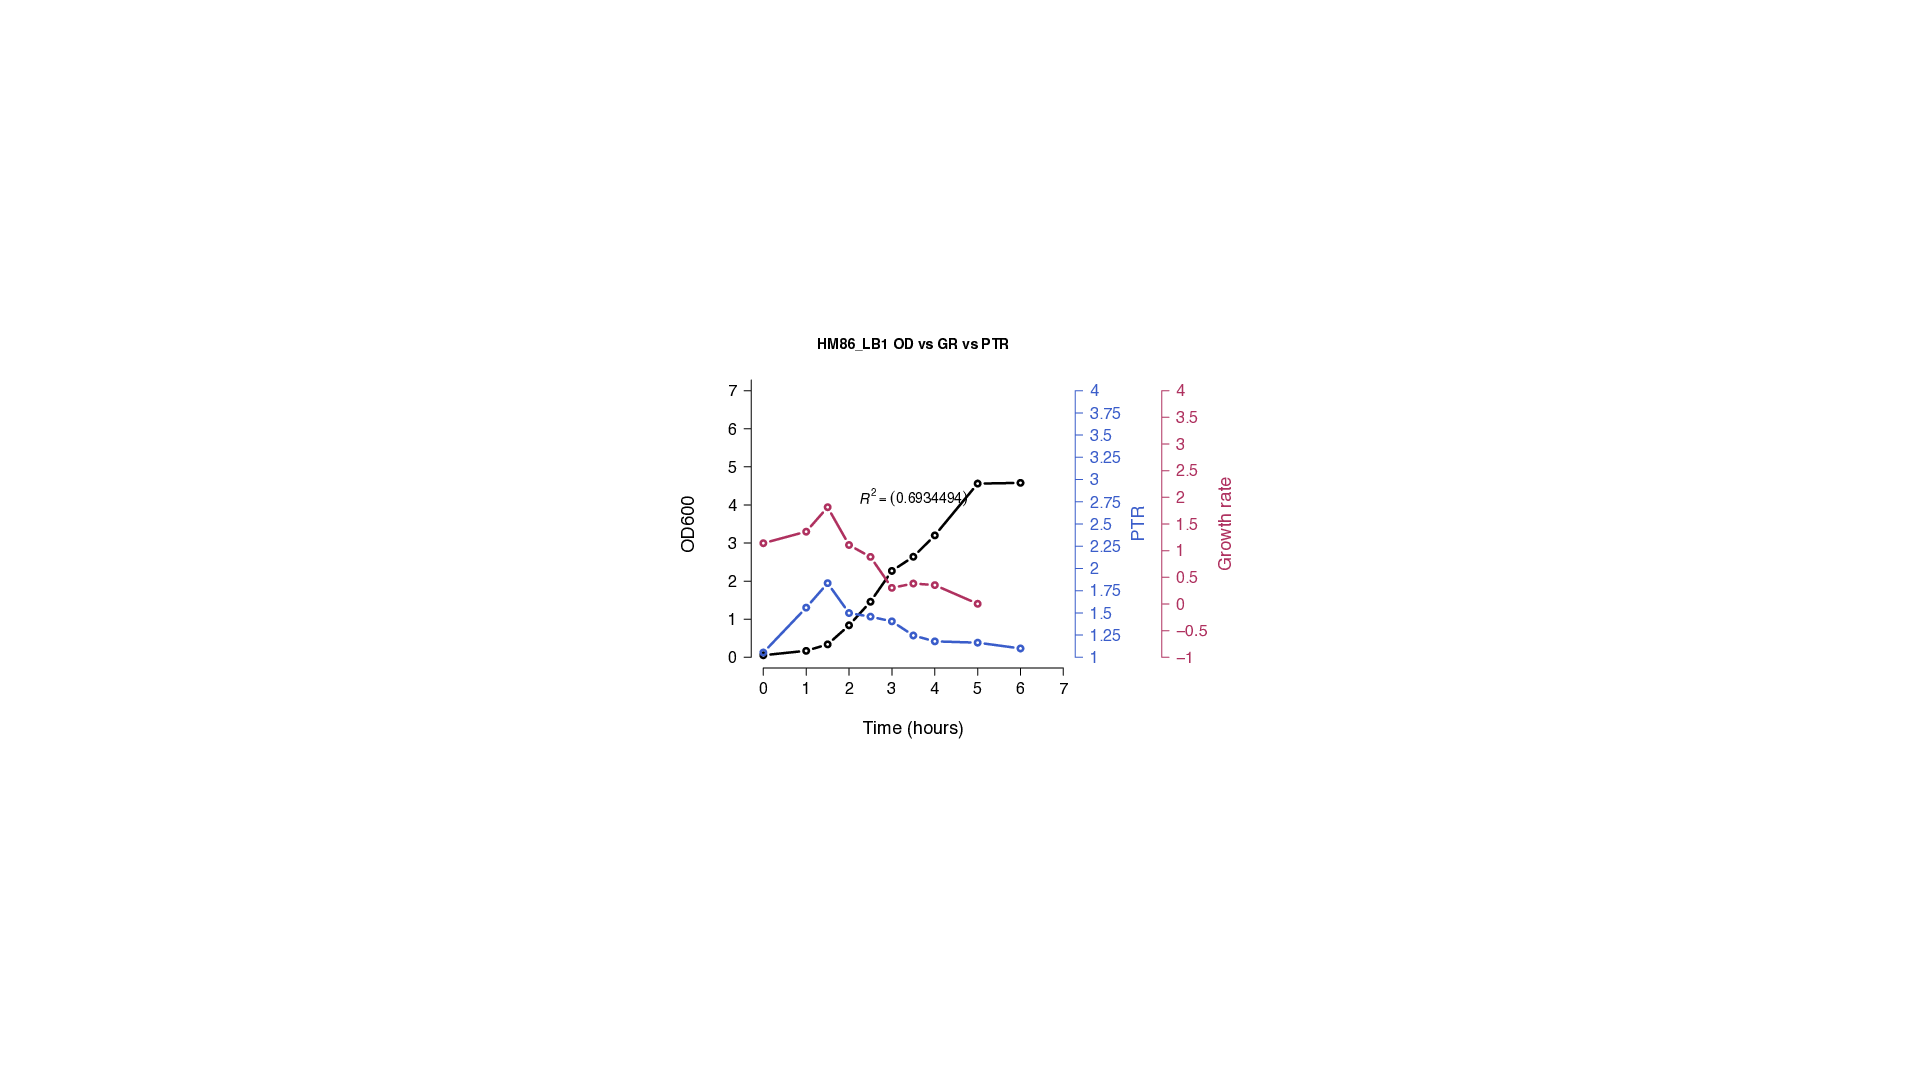

In [4]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/plots//2023-09-22_HM86_LB1_OD.pdf')
img

gs: /sw/pkgs/coe/o/image-libraries/220318/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


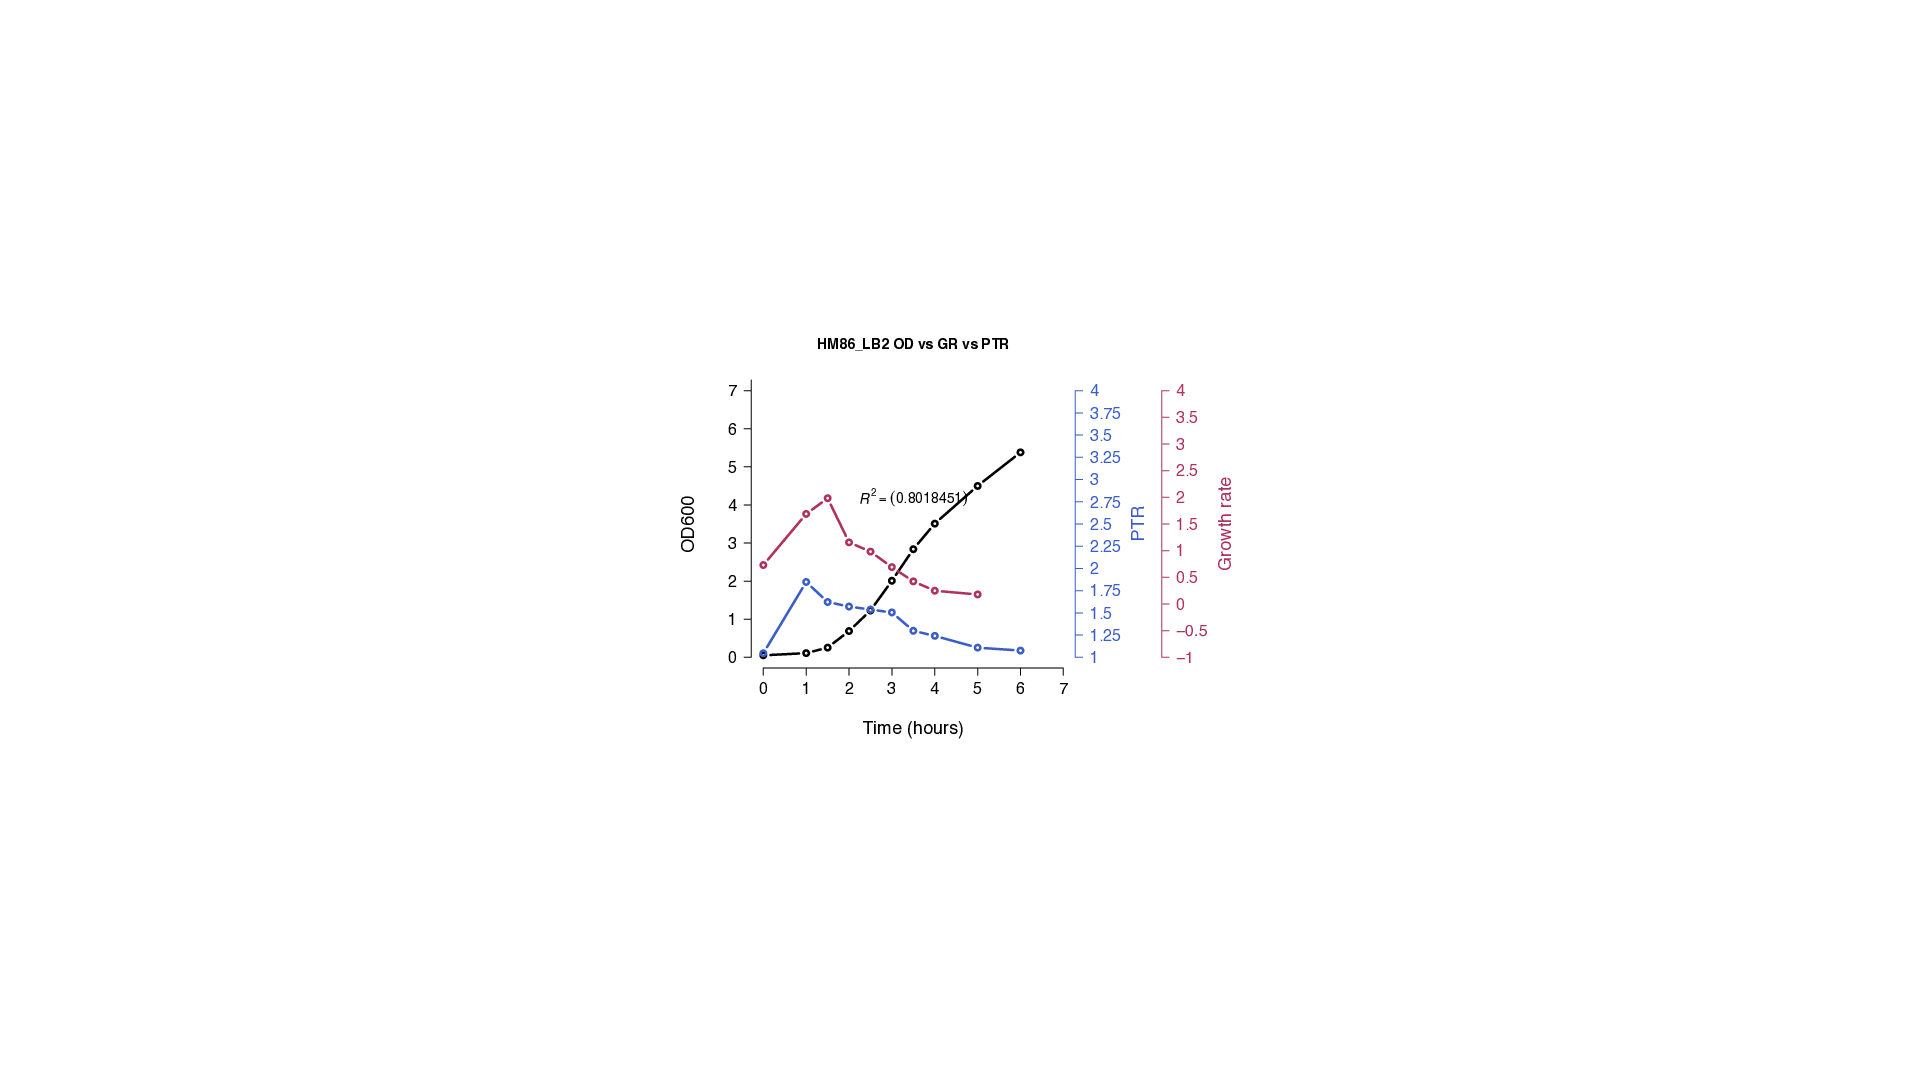

In [5]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/plots//2023-09-22_HM86_LB2_OD.pdf')
img

gs: /sw/pkgs/coe/o/image-libraries/220318/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


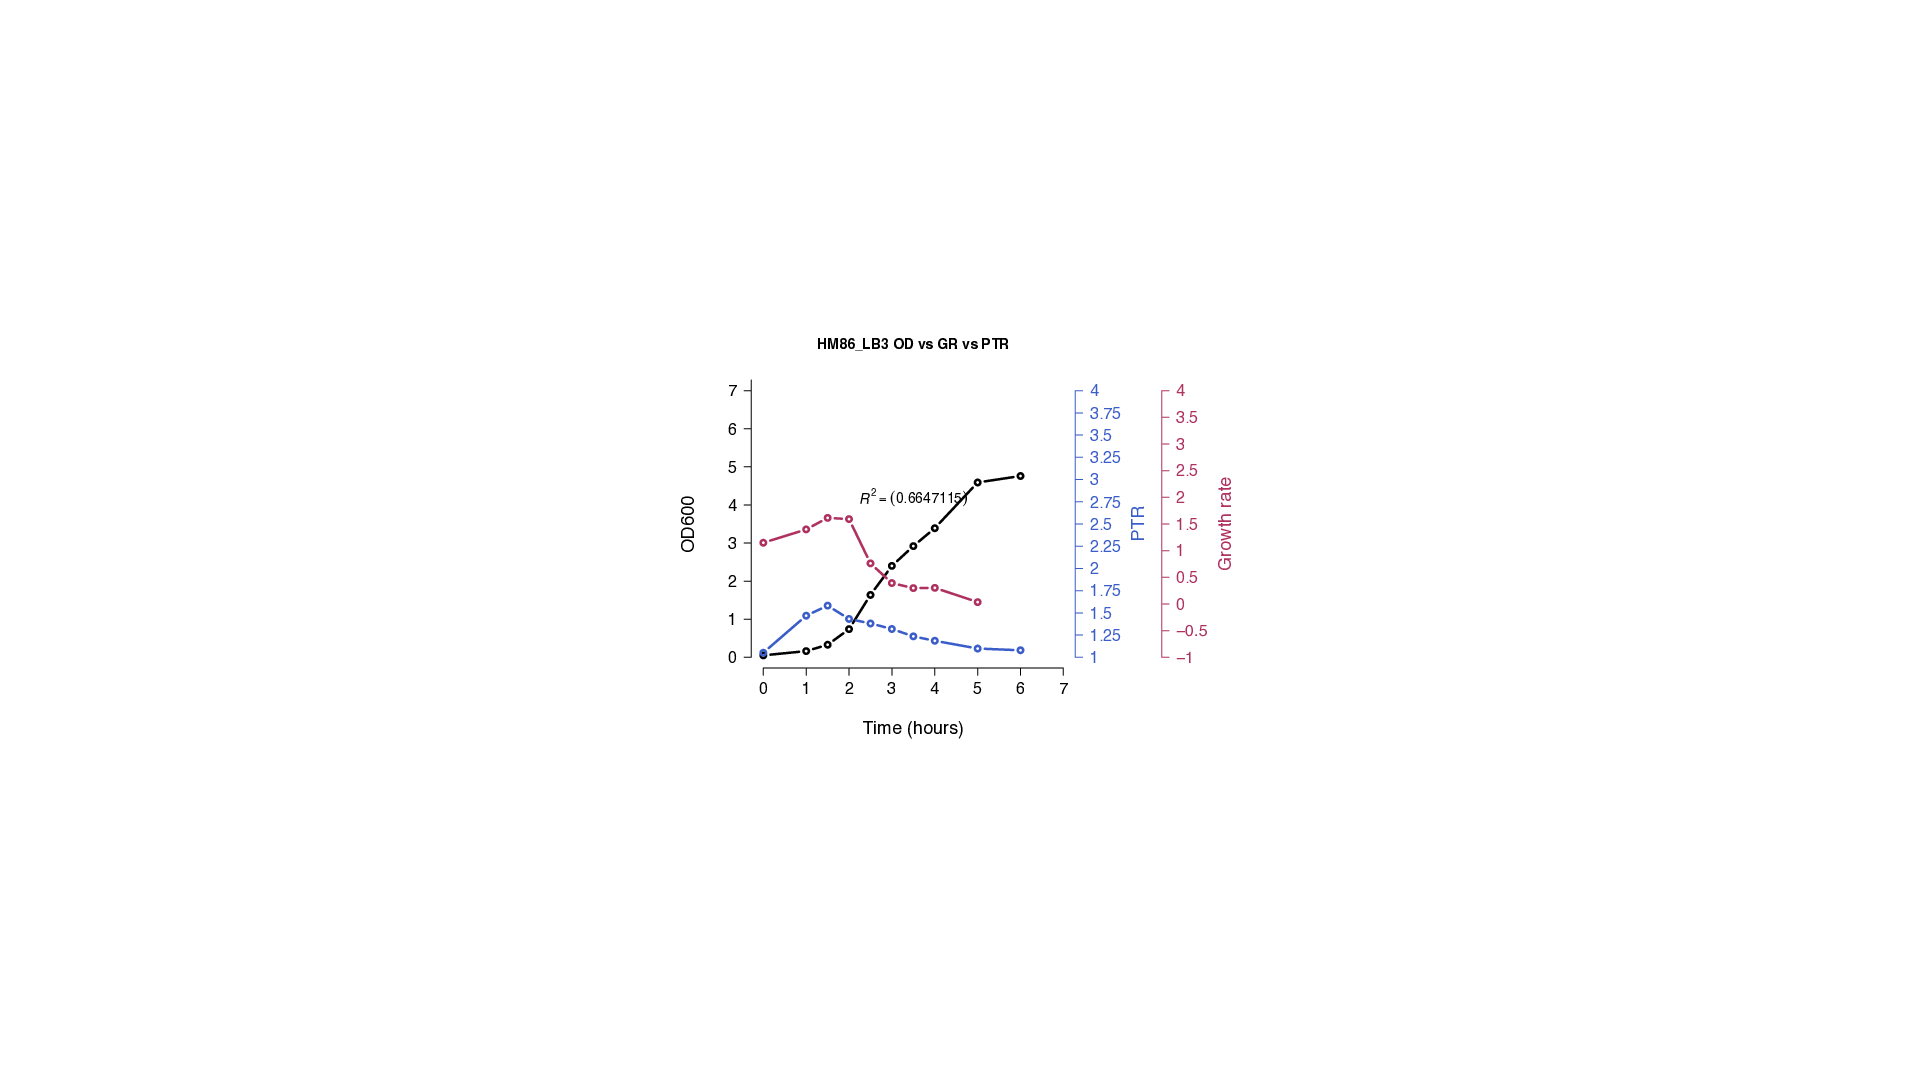

In [6]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/plots//2023-09-22_HM86_LB3_OD.pdf')
img

gs: /sw/pkgs/coe/o/image-libraries/220318/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


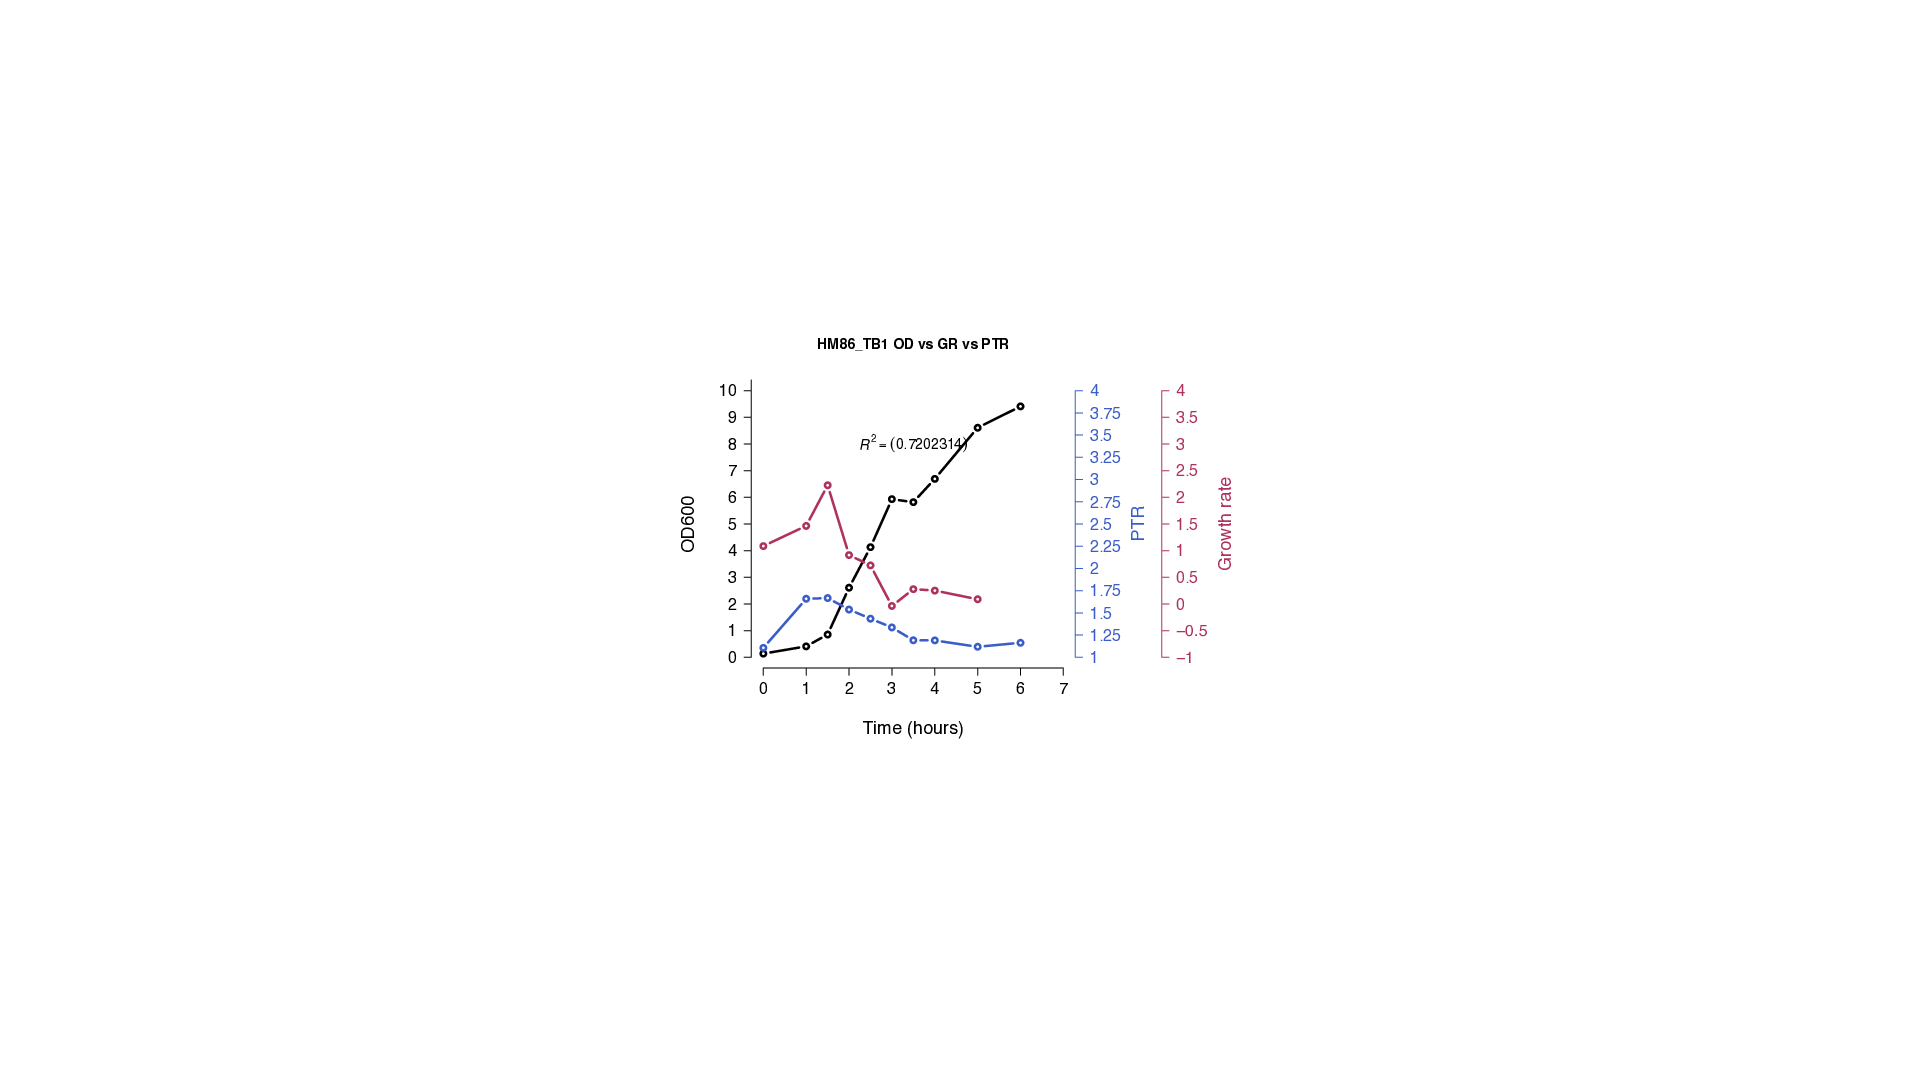

In [7]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/plots//2023-09-22_HM86_TB1_OD.pdf')
img

gs: /sw/pkgs/coe/o/image-libraries/220318/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


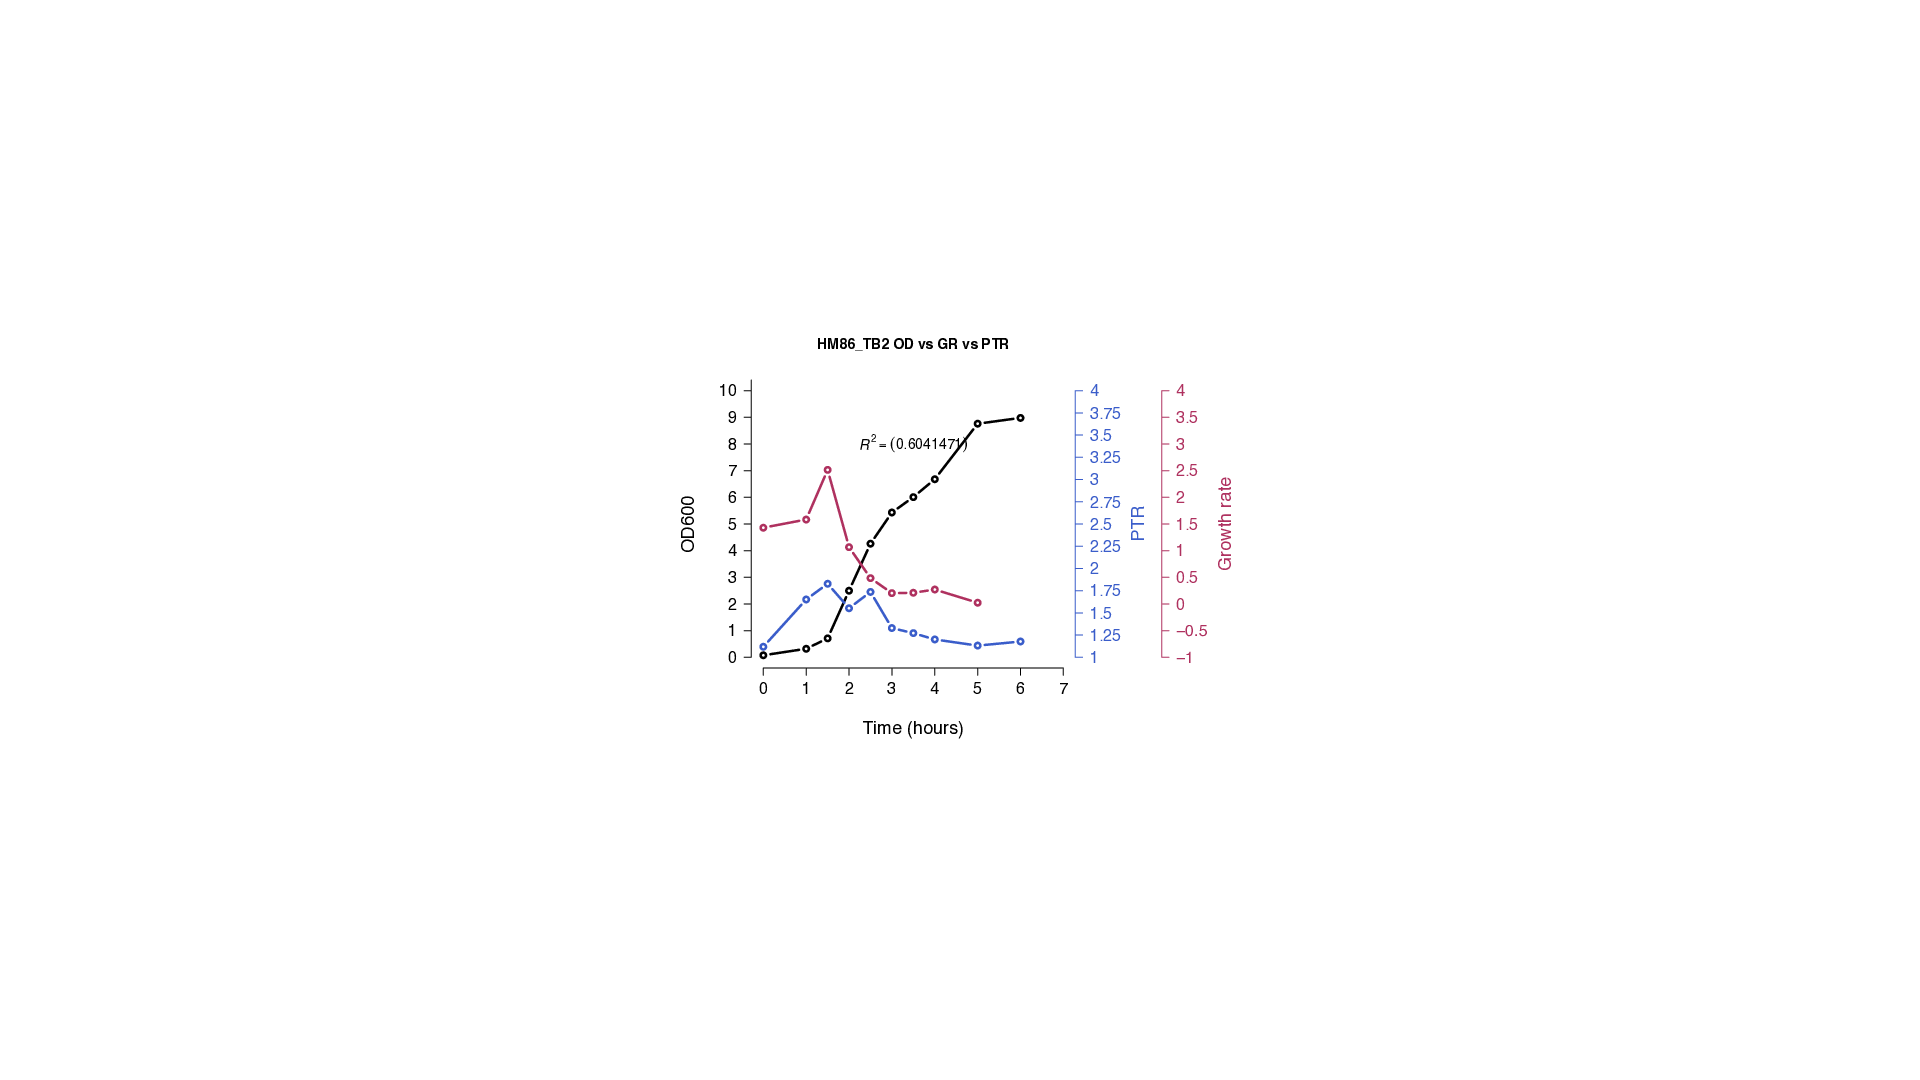

In [8]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/plots//2023-09-22_HM86_TB2_OD.pdf')
img

gs: /sw/pkgs/coe/o/image-libraries/220318/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


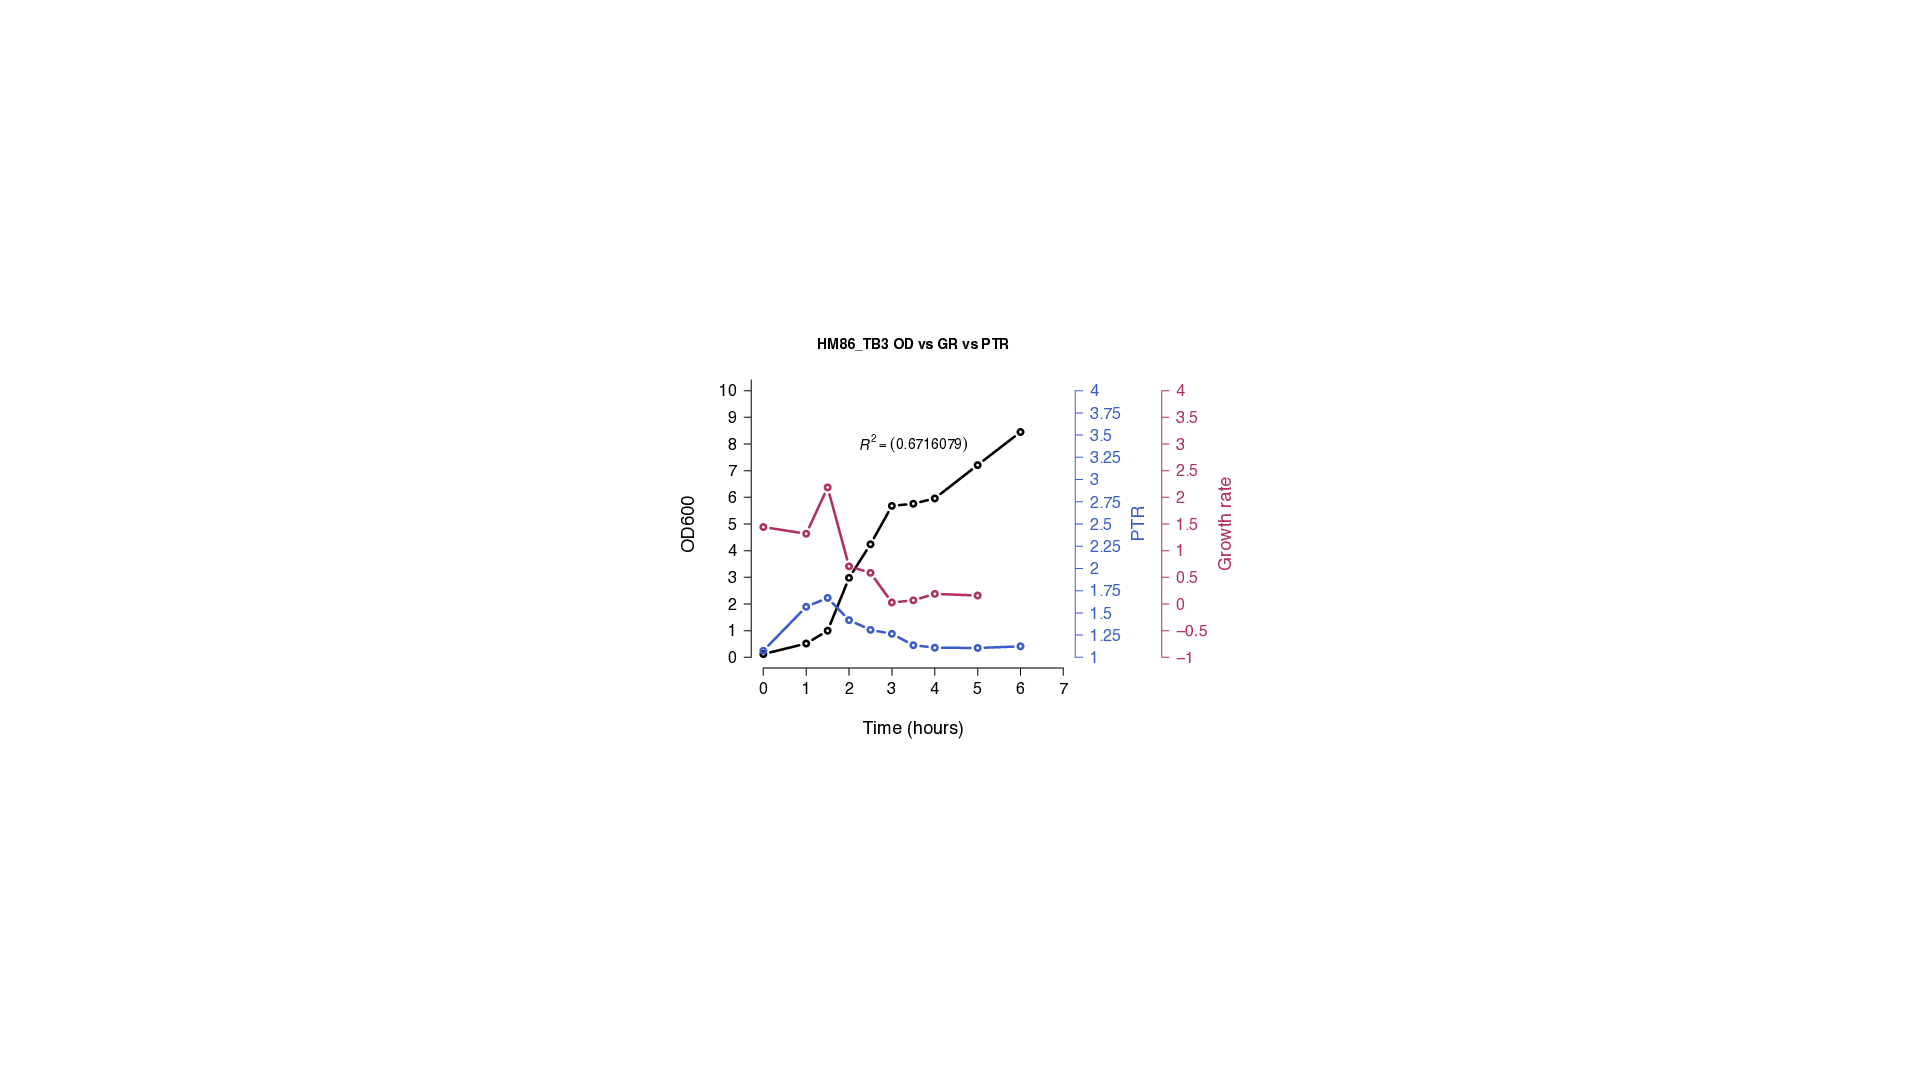

In [9]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/plots//2023-09-22_HM86_TB3_OD.pdf')
img

gs: /sw/pkgs/coe/o/image-libraries/220318/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


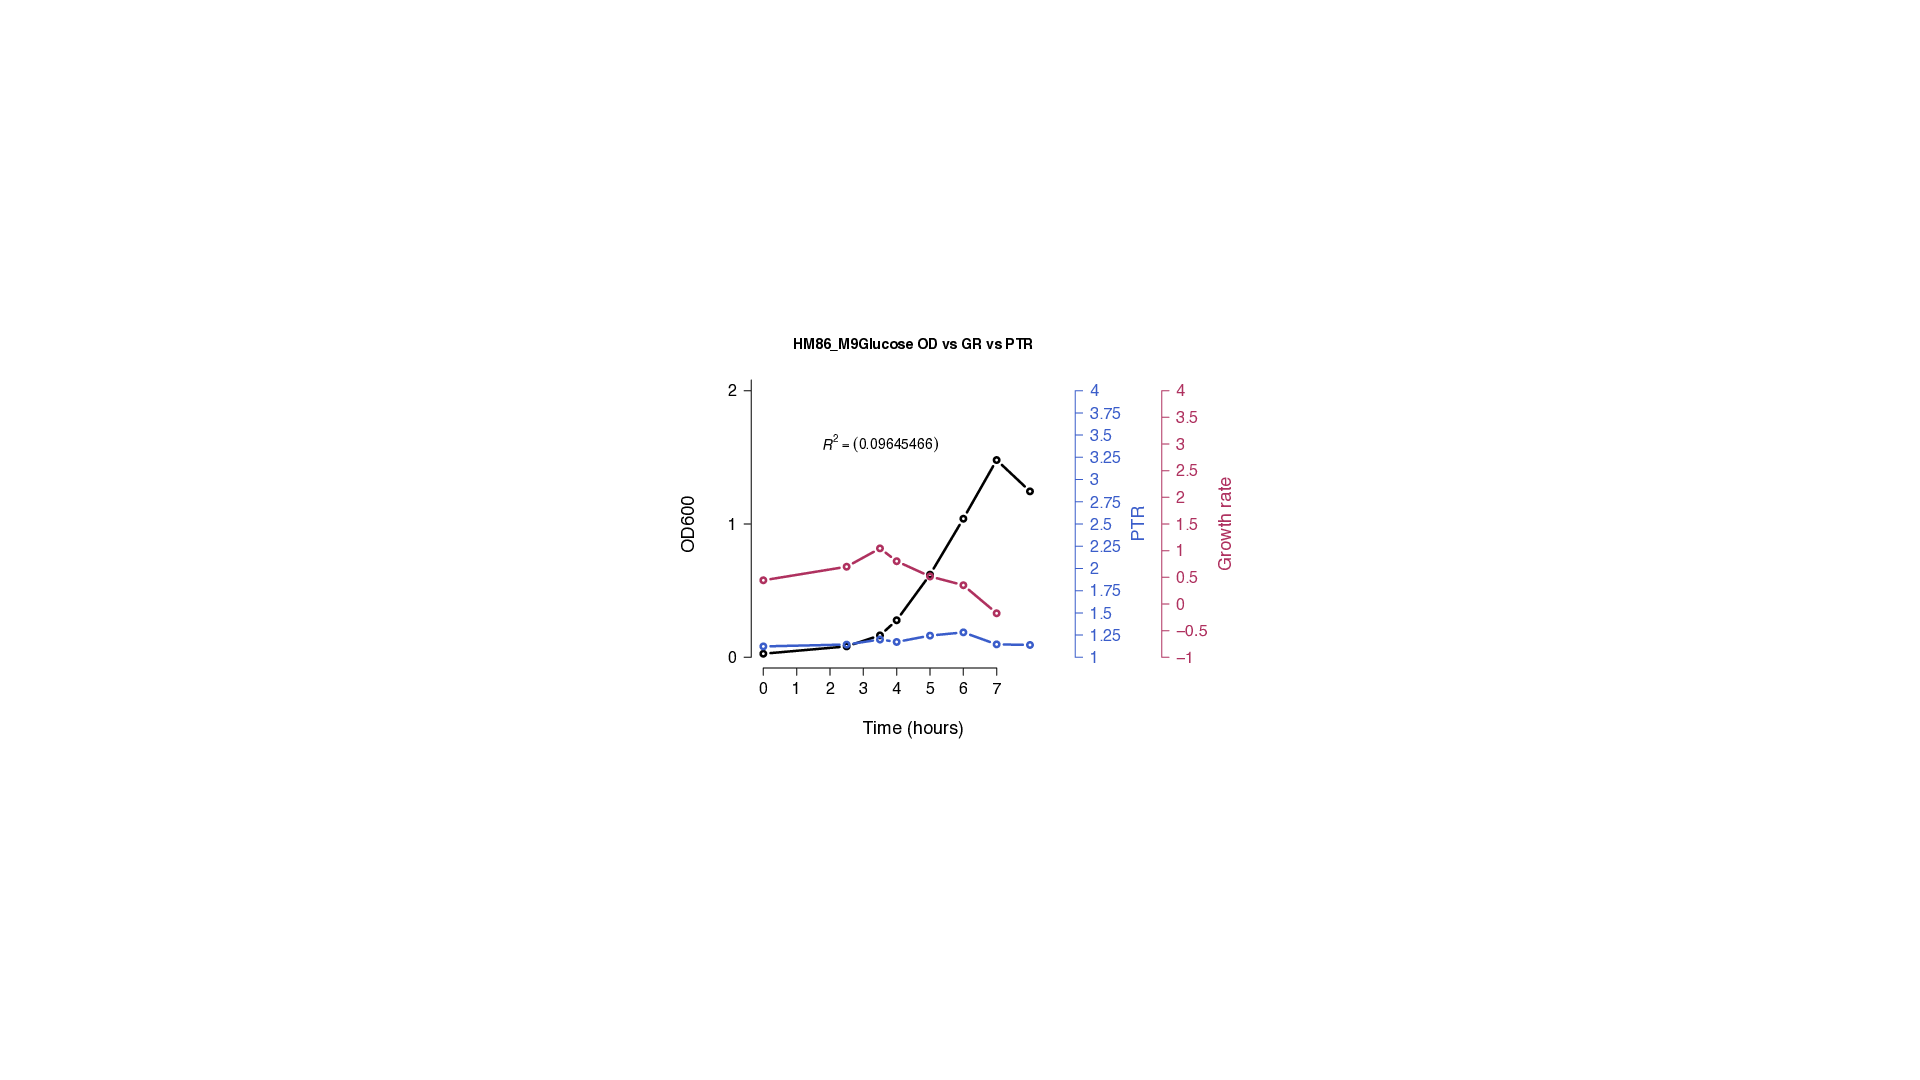

In [10]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/plots//2023-09-22_HM86_M9Glu1_OD.pdf')
img

gs: /sw/pkgs/coe/o/image-libraries/220318/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


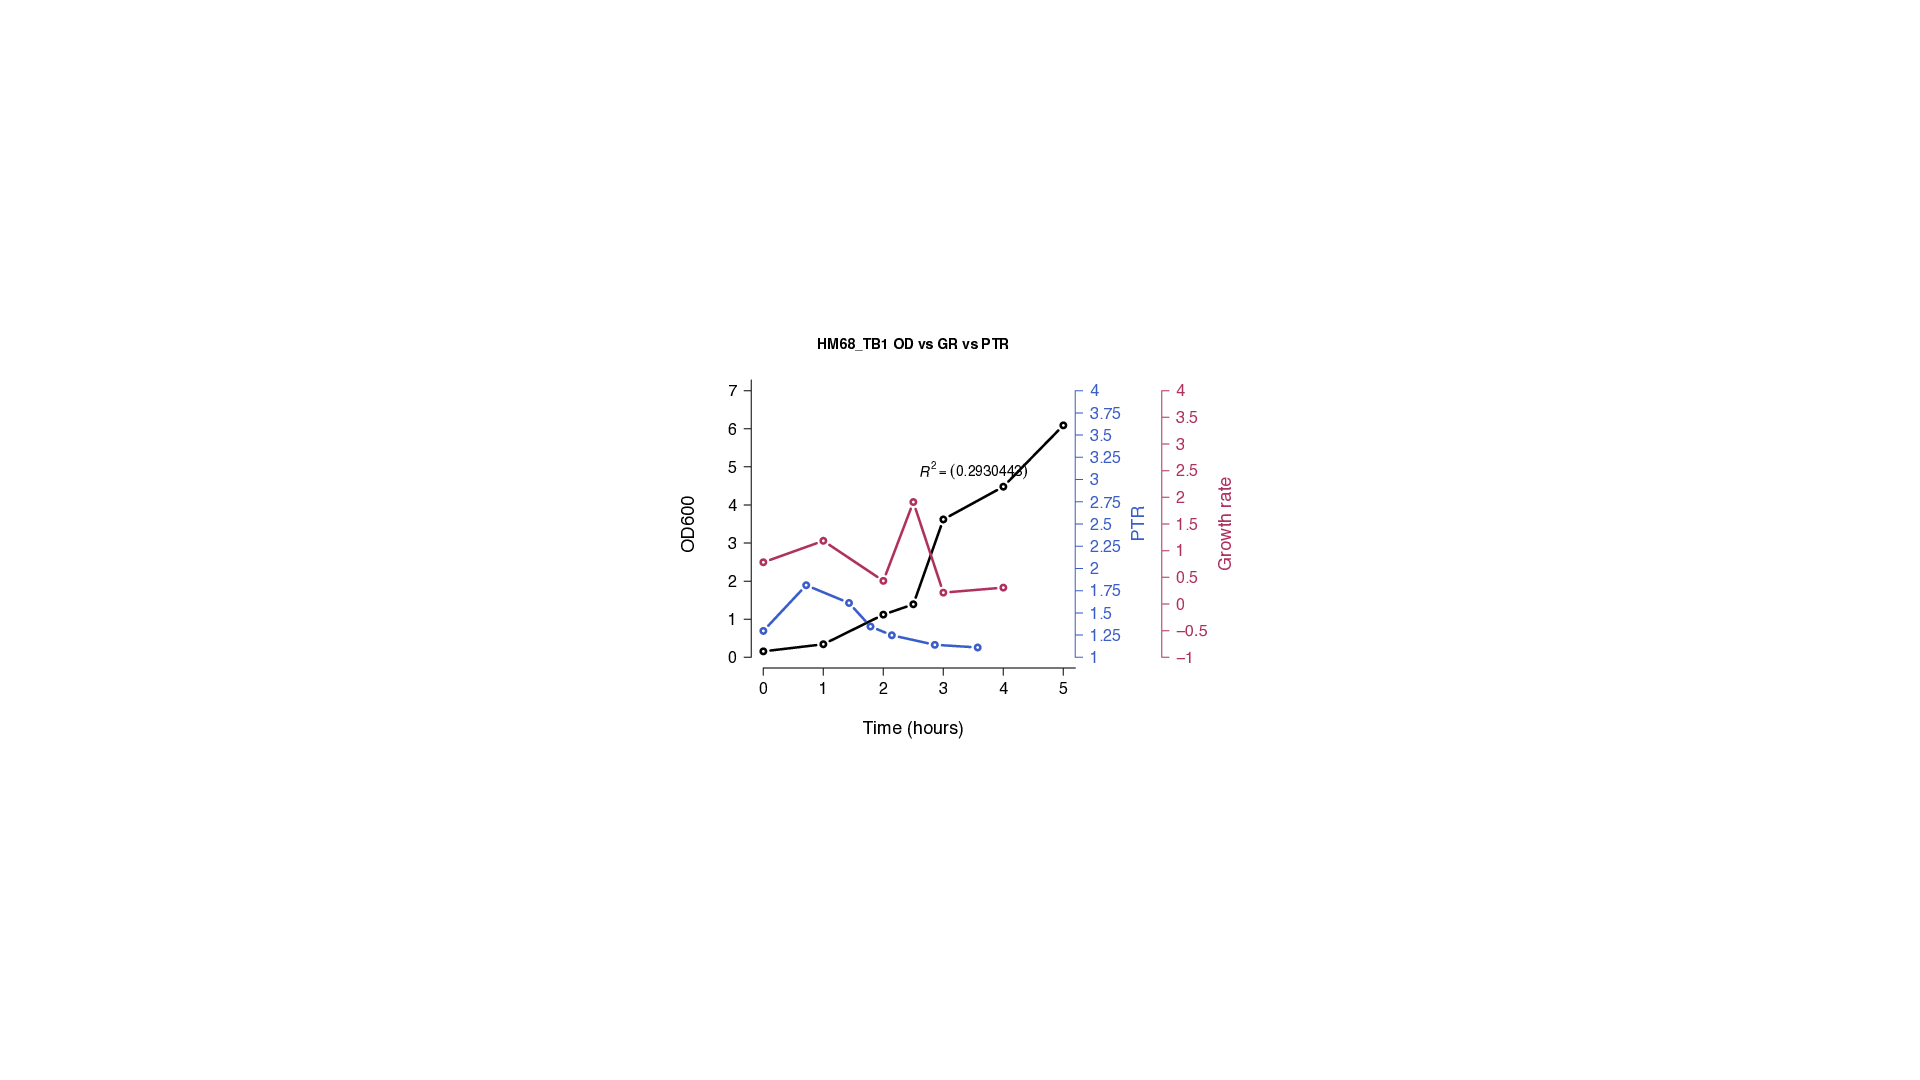

In [11]:
from wand.image import Image as WImage
img = WImage(filename='/nfs/turbo/umms-esnitkin/Project_UTI_PTR/Analysis/2023-06-23_Growth_Rate_Analysis/Growth-rate-estimate_SMAKE/plots//2023-09-22_HM68_TB1_OD.pdf')
img